In [77]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [78]:
# Load the data from a .csv in the same folder
rw = pd.read_csv('A:\Horticulture_Project\horti.csv')

# Let's explore the top 5 rows of the df
rw.head()

Name  Banana  Brinjal  Sweet Potato  Cabbage  Tomoto  Pineapple  \
0  Kancheepuram     241      103             0        0       2          4   
1    Tiruvallur    1077      343            19        5       2          0   
2     Cuddalore    3982      207            33        2       1          0   
3    Villupuram    1144      198            58        0       5          0   
4       Vellore    5782     1004             3        1    1023          0   

   Ladies Finger  Grape  Mango  ...  Lemon  Orange  N/A  Onion  Turmeric  \
0            100      0   3254  ...     16       0  100      0         0   
1            262      0  10648  ...     29       1  565      0        17   
2             64      0    495  ...     55       0   65      6       413   
3            152      0   1558  ...     18       0  330    136      2989   
4            885      9  12630  ...    114       0  850     33      1137   

   Tapioca  Potato  Ginger  Coriander  Cashewnet  
0       95       0       0          0        237  
1       76       0       0          1        145  
2     2654       0       0         28      30404  
3    11517       0       0          0       5187  
4      374       0       0        108          9  

[5 rows x 22 columns]

### Check any missing values

In [79]:
#preprocessing 
raw_data.describe(include='all')

Name        Banana      Brinjal  Sweet Potato     Cabbage  \
count         31     31.000000    31.000000     31.000000   31.000000   
unique        31           NaN          NaN           NaN         NaN   
top     Dindigul           NaN          NaN           NaN         NaN   
freq           1           NaN          NaN           NaN         NaN   
mean         NaN   3419.870968   295.935484      9.806452   49.903226   
std          NaN   3309.939151   300.978951     14.882695  158.333268   
min          NaN    124.000000     2.000000      0.000000    0.000000   
25%          NaN    863.500000   131.000000      0.000000    0.000000   
50%          NaN   2464.000000   198.000000      2.000000    0.000000   
75%          NaN   5610.500000   327.000000     18.500000   10.000000   
max          NaN  12098.000000  1318.000000     58.000000  827.000000   

             Tomoto   Pineapple  Ladies Finger       Grape         Mango  ...  \
count     31.000000   31.000000      31.000000    31.00000     31.000000  ...   
unique          NaN         NaN            NaN         NaN           NaN  ...   
top             NaN         NaN            NaN         NaN           NaN  ...   
freq            NaN         NaN            NaN         NaN           NaN  ...   
mean     680.322581   24.451613     239.806452    76.00000   4661.580645  ...   
std     1241.177731  119.083119     337.247132   320.89209   7306.191104  ...   
min        0.000000    0.000000       0.000000     0.00000     24.000000  ...   
25%        3.500000    0.000000      65.000000     0.00000    798.500000  ...   
50%      127.000000    0.000000     152.000000     0.00000   1987.000000  ...   
75%      735.500000    1.000000     284.000000     3.00000   5800.000000  ...   
max     5707.000000  662.000000    1767.000000  1779.00000  37029.000000  ...   

              Lemon       Orange           N/A        Onion      Turmeric  \
count     31.000000    31.000000     31.000000    31.000000     31.000000   
unique          NaN          NaN           NaN          NaN           NaN   
top             NaN          NaN           NaN          NaN           NaN   
freq            NaN          NaN           NaN          NaN           NaN   
mean     284.967742    63.387097   1519.677419   775.193548   1488.741935   
std      683.510277   314.872215   3899.576869  1349.076485   2989.304244   
min        4.000000     0.000000      0.000000     0.000000      0.000000   
25%       23.000000     0.000000    141.500000     8.500000      7.000000   
50%       54.000000     0.000000    365.000000   161.000000     49.000000   
75%      115.000000     4.500000    743.000000   930.000000   1401.500000   
max     3082.000000  1758.000000  18995.000000  6513.000000  10929.000000   

             Tapioca       Potato      Ginger    Coriander     Cashewnet  
count      31.000000    31.000000   31.000000    31.000000     31.000000  
unique           NaN          NaN         NaN          NaN           NaN  
top              NaN          NaN         NaN          NaN           NaN  
freq             NaN          NaN         NaN          NaN           NaN  
mean     2613.774194   137.677419   10.387097   263.580645   3009.741935  
std      4973.172895   451.603763   53.431999   681.180239   7450.400674  
min         0.000000     0.000000    0.000000     0.000000      0.000000  
25%        79.500000     0.000000    0.000000     0.500000     16.500000  
50%       273.000000     0.000000    0.000000    13.000000    177.000000  
75%      1976.000000     0.000000    0.000000   115.000000   1696.500000  
max     18430.000000  2217.000000  298.000000  3329.000000  30404.000000  

[11 rows x 22 columns]

In [80]:
#deleting the Name folder for better understanding
data = raw_data.drop(['Name'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

Banana      Brinjal  Sweet Potato     Cabbage       Tomoto  \
count     31.000000    31.000000     31.000000   31.000000    31.000000   
mean    3419.870968   295.935484      9.806452   49.903226   680.322581   
std     3309.939151   300.978951     14.882695  158.333268  1241.177731   
min      124.000000     2.000000      0.000000    0.000000     0.000000   
25%      863.500000   131.000000      0.000000    0.000000     3.500000   
50%     2464.000000   198.000000      2.000000    0.000000   127.000000   
75%     5610.500000   327.000000     18.500000   10.000000   735.500000   
max    12098.000000  1318.000000     58.000000  827.000000  5707.000000   

        Pineapple  Ladies Finger       Grape         Mango        Jack  ...  \
count   31.000000      31.000000    31.00000     31.000000   31.000000  ...   
mean    24.451613     239.806452    76.00000   4661.580645   94.709677  ...   
std    119.083119     337.247132   320.89209   7306.191104  174.944600  ...   
min      0.000000       0.000000     0.00000     24.000000    2.000000  ...   
25%      0.000000      65.000000     0.00000    798.500000   11.000000  ...   
50%      0.000000     152.000000     0.00000   1987.000000   28.000000  ...   
75%      1.000000     284.000000     3.00000   5800.000000   61.000000  ...   
max    662.000000    1767.000000  1779.00000  37029.000000  682.000000  ...   

             Lemon       Orange           N/A        Onion      Turmeric  \
count    31.000000    31.000000     31.000000    31.000000     31.000000   
mean    284.967742    63.387097   1519.677419   775.193548   1488.741935   
std     683.510277   314.872215   3899.576869  1349.076485   2989.304244   
min       4.000000     0.000000      0.000000     0.000000      0.000000   
25%      23.000000     0.000000    141.500000     8.500000      7.000000   
50%      54.000000     0.000000    365.000000   161.000000     49.000000   
75%     115.000000     4.500000    743.000000   930.000000   1401.500000   
max    3082.000000  1758.000000  18995.000000  6513.000000  10929.000000   

            Tapioca       Potato      Ginger    Coriander     Cashewnet  
count     31.000000    31.000000   31.000000    31.000000     31.000000  
mean    2613.774194   137.677419   10.387097   263.580645   3009.741935  
std     4973.172895   451.603763   53.431999   681.180239   7450.400674  
min        0.000000     0.000000    0.000000     0.000000      0.000000  
25%       79.500000     0.000000    0.000000     0.500000     16.500000  
50%      273.000000     0.000000    0.000000    13.000000    177.000000  
75%     1976.000000     0.000000    0.000000   115.000000   1696.500000  
max    18430.000000  2217.000000  298.000000  3329.000000  30404.000000  

[8 rows x 21 columns]

# Following is the total number of vegetations cultivated 

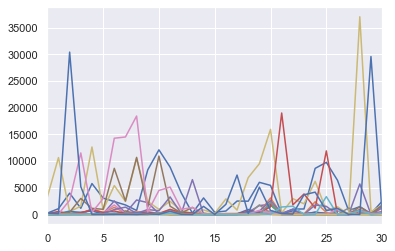

In [81]:
df = pd.read_csv("A:\Horticulture_Project\horti.csv")
df["Banana"].plot()
df["Brinjal"].plot()
df["Sweet Potato"].plot()
df["Cabbage"].plot()
df["Tomoto"].plot()
df["Pineapple"].plot()
df["Ladies Finger"].plot()
df["Grape"].plot()
df["Mango"].plot()
df["Jack"].plot()
df["Guava"].plot()
df["Lemon"].plot()
df["Orange"].plot()
df["N/A"].plot()
df["Onion"].plot()
df["Turmeric"].plot()
df["Tapioca"].plot()
df["Potato"].plot()
df["Ginger"].plot()
df["Coriander"].plot()
df["Cashewnet"].plot()

### For Iterating the Names accordingly, we need a list of Names, so

In [82]:
df1 = list(df["Name"])
print(df1)

['Kancheepuram', 'Tiruvallur', 'Cuddalore', 'Villupuram', 'Vellore', 'Tiruvannamalai', 'Salem', 'Namakkal', 'Dharmapuri', 'Coimbatore', 'Erode', 'Tiruchirapalli', 'Karur', 'Perambalur', 'Thanjavur', 'Thiruvarur', 'Nagapattinam', 'Pudukkottai', 'Madurai', 'Theni', 'Dindigul', 'Ramanathapuram', 'Virudhunagar', 'Sivagangai', 'Tirunelveli', 'Thoothukudi', 'Kanniyakumari', 'The Nilgiris', 'Krishnagiri', 'Ariyalur', 'Tiruppur']


### Getting the values for colomn (0 to 21):

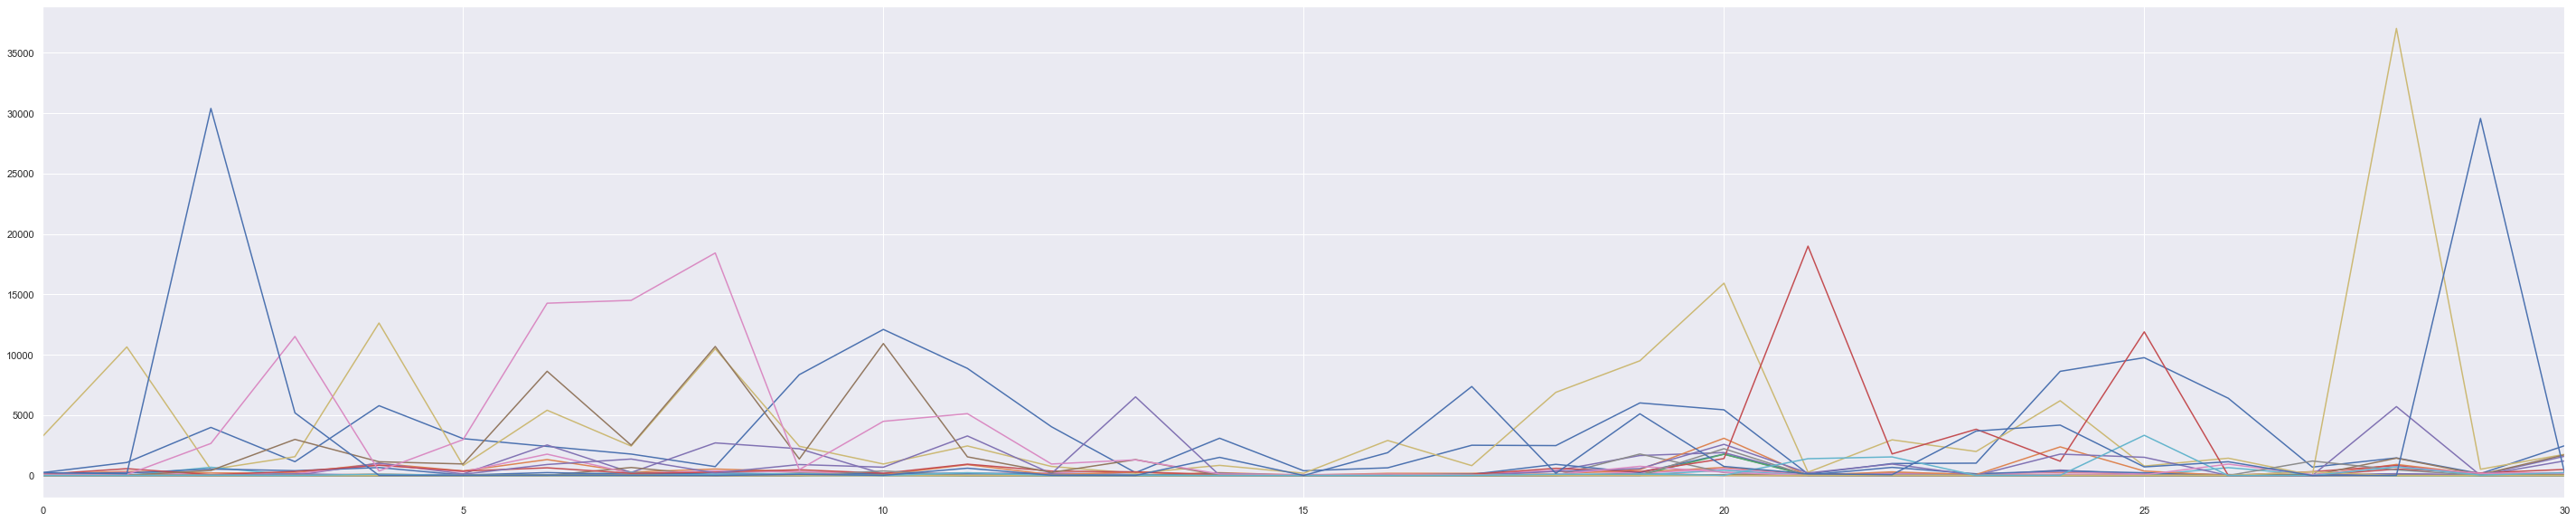

In [83]:
for j in data:
    df[j].plot(figsize = (50,10))
    

### Comparing the Vegetations with hectors 

C:\Users\91824\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


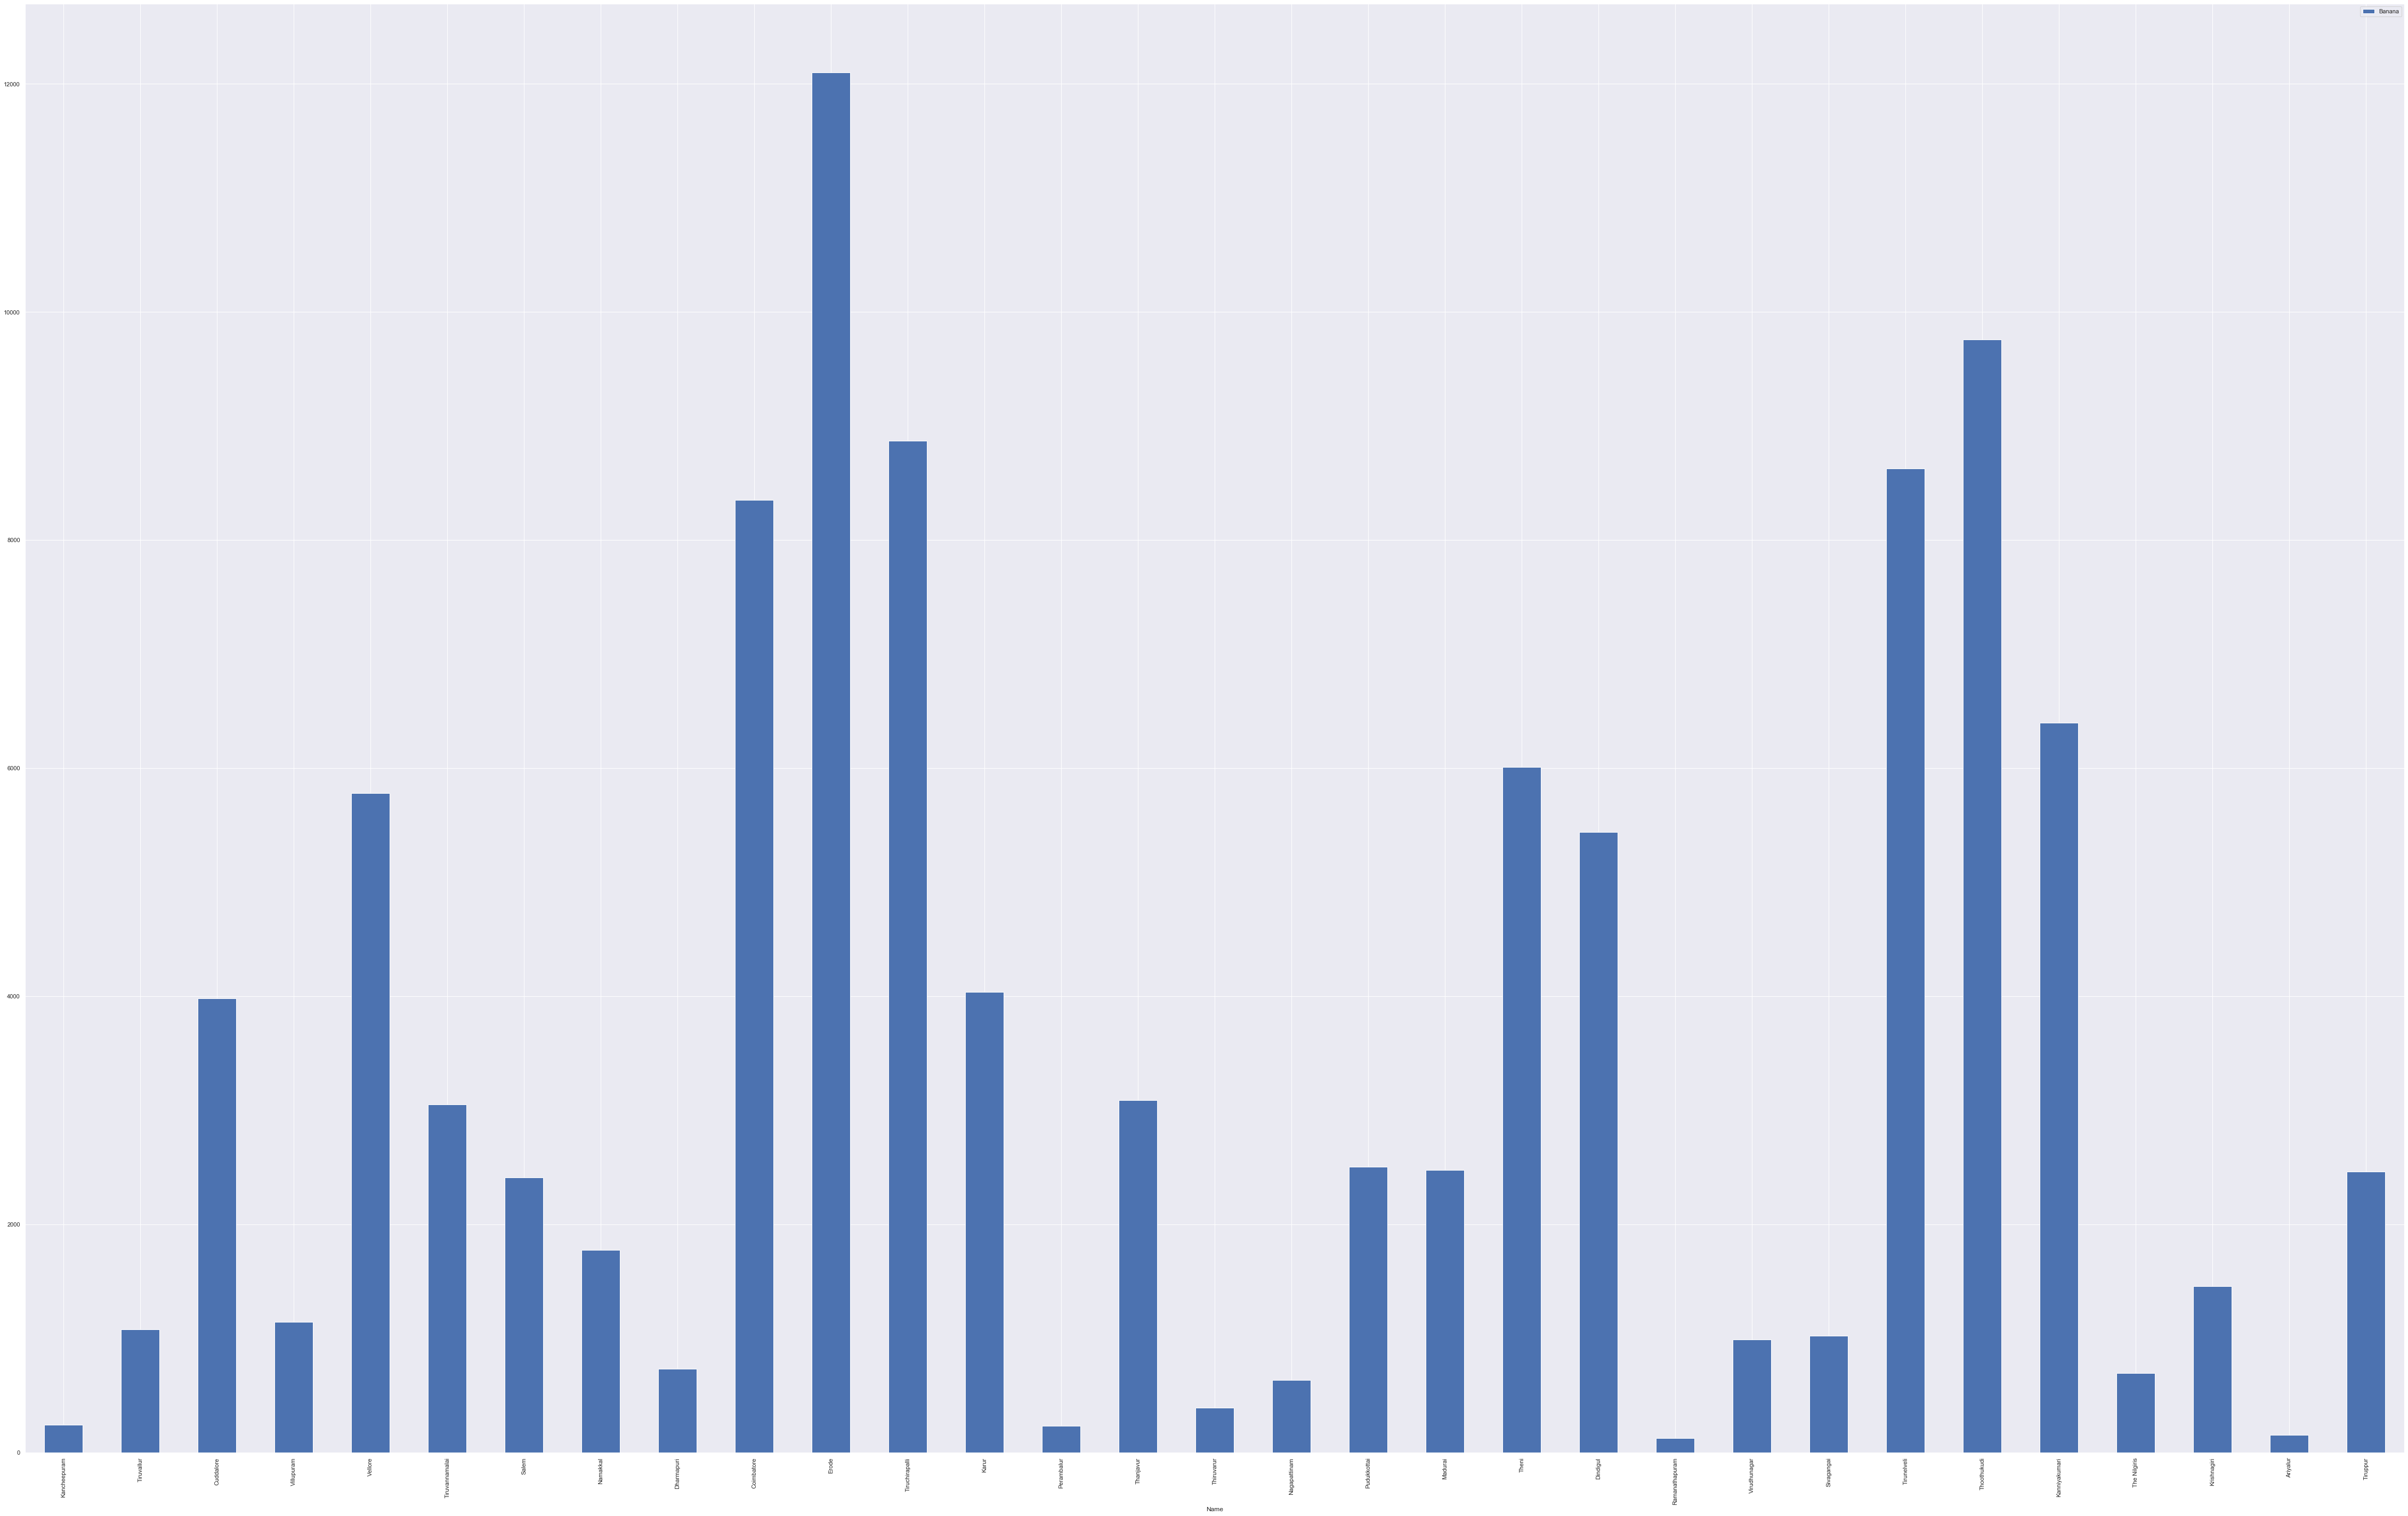

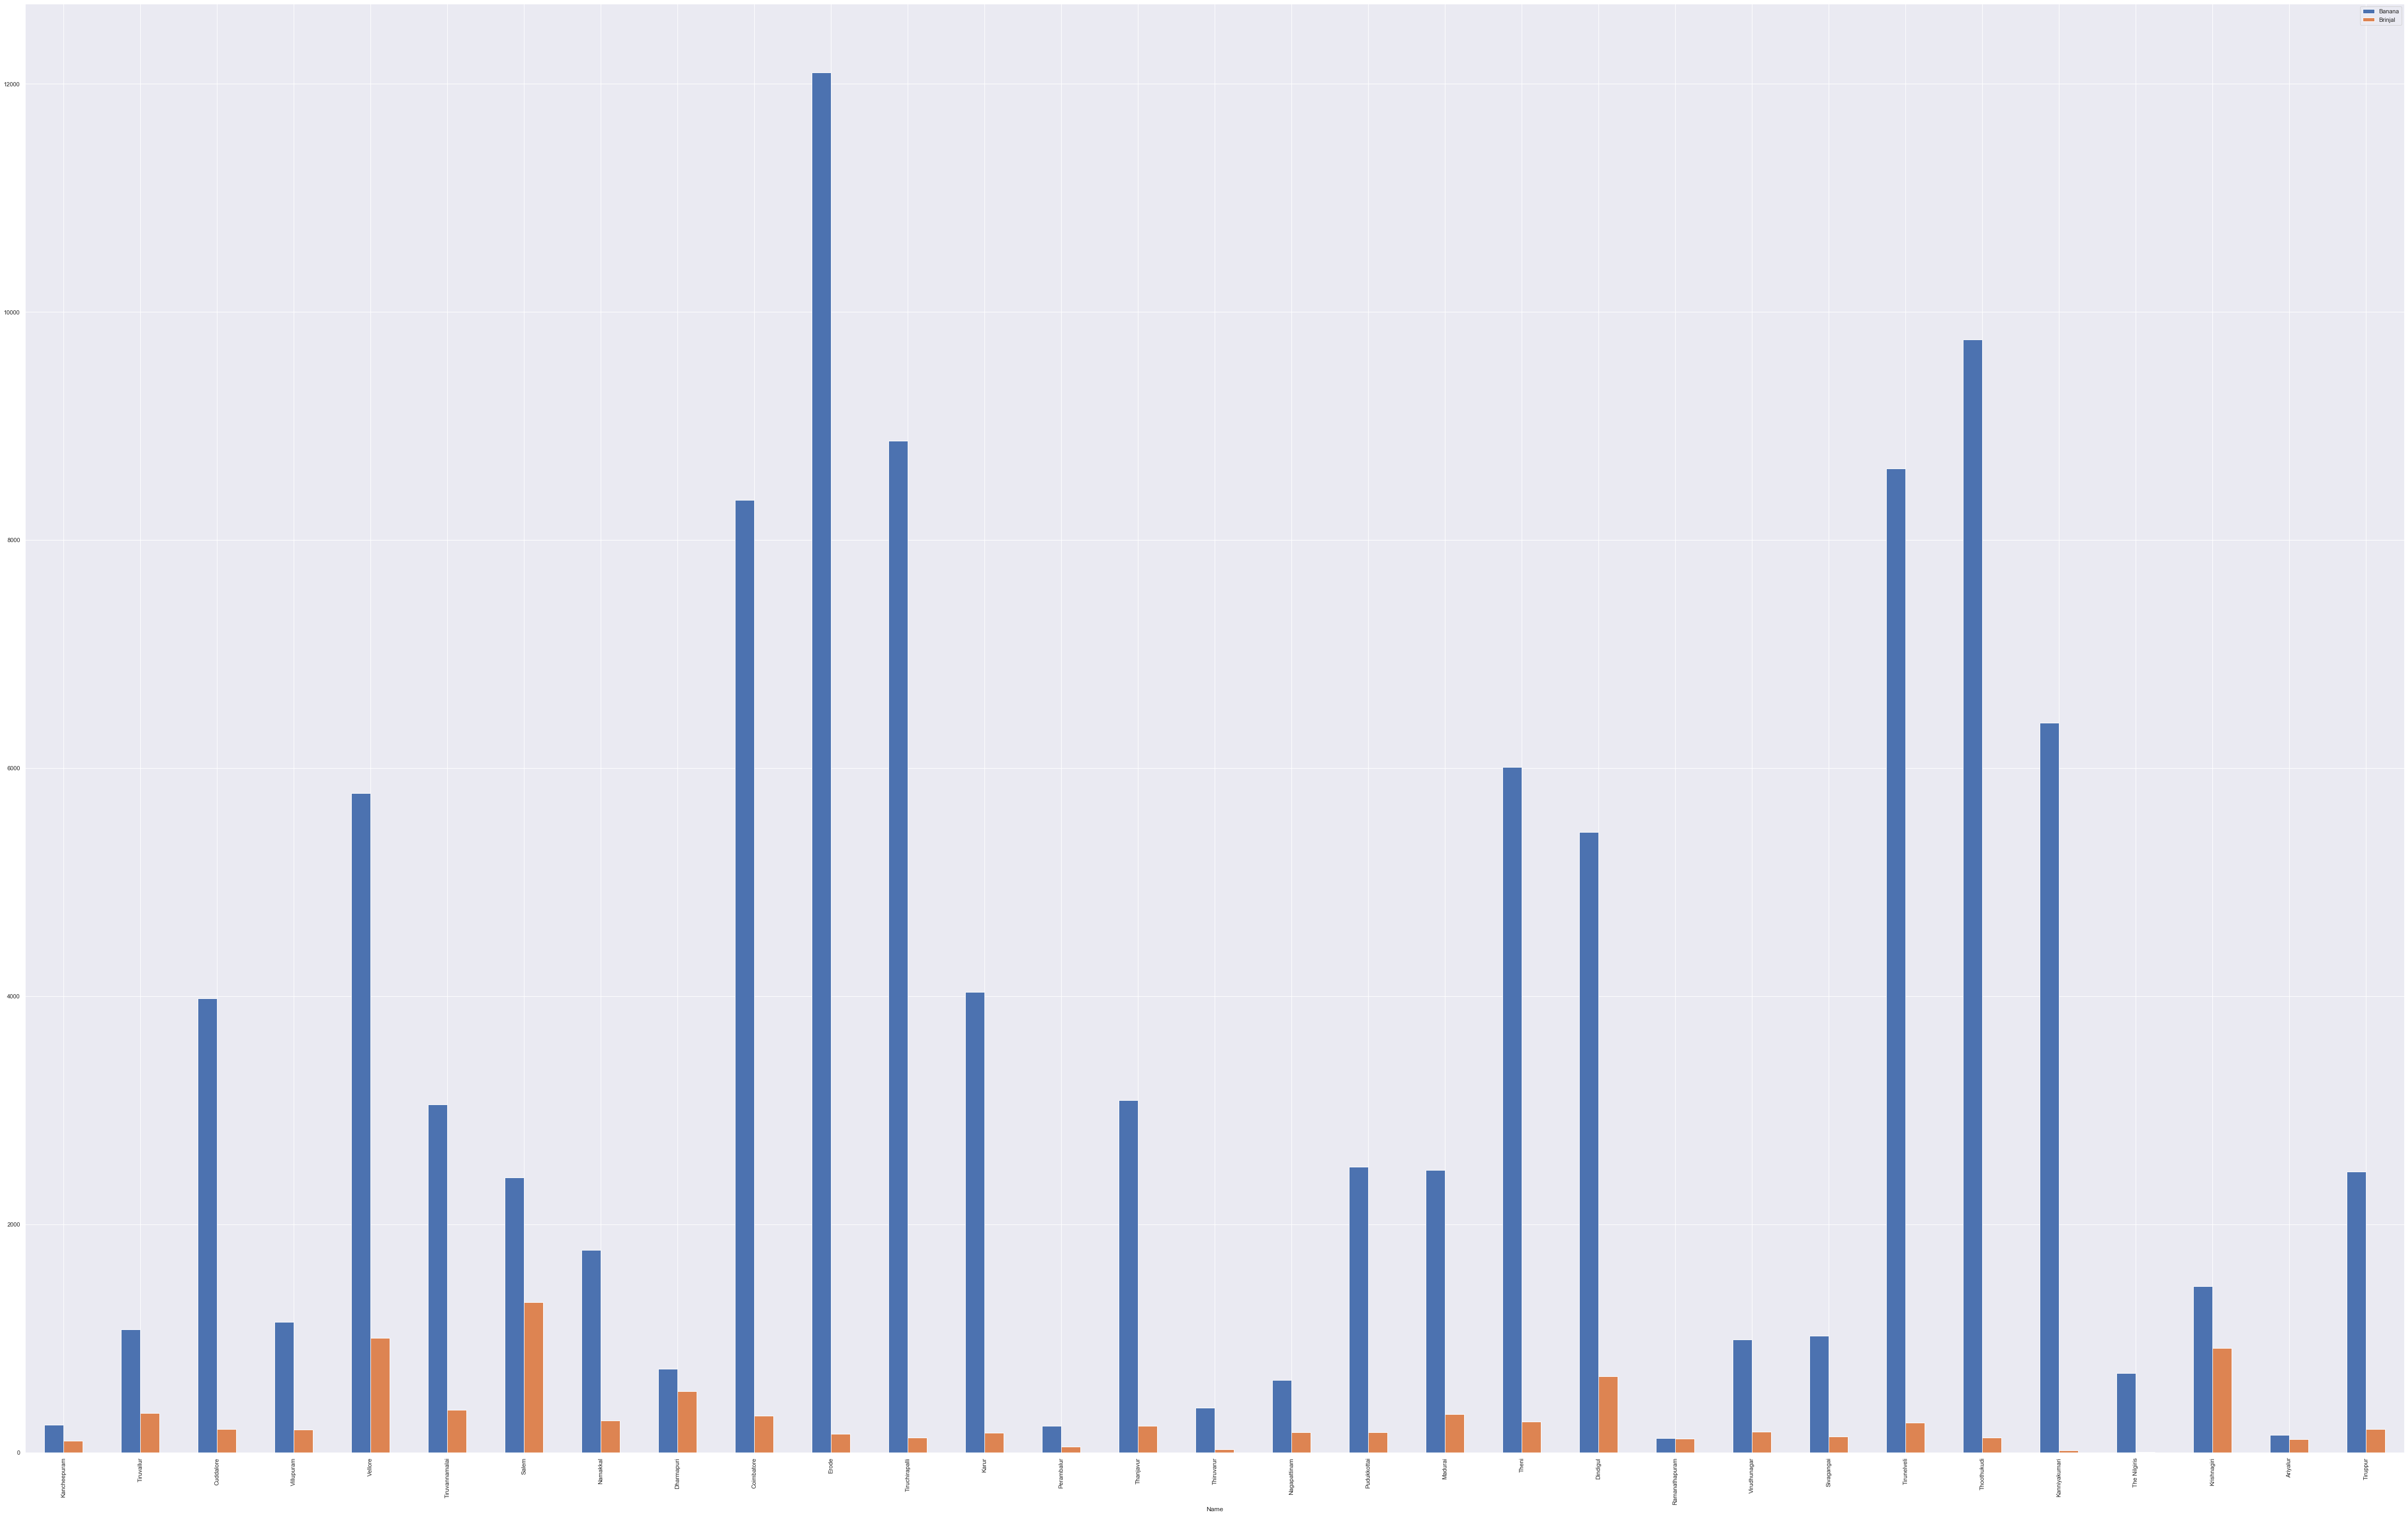

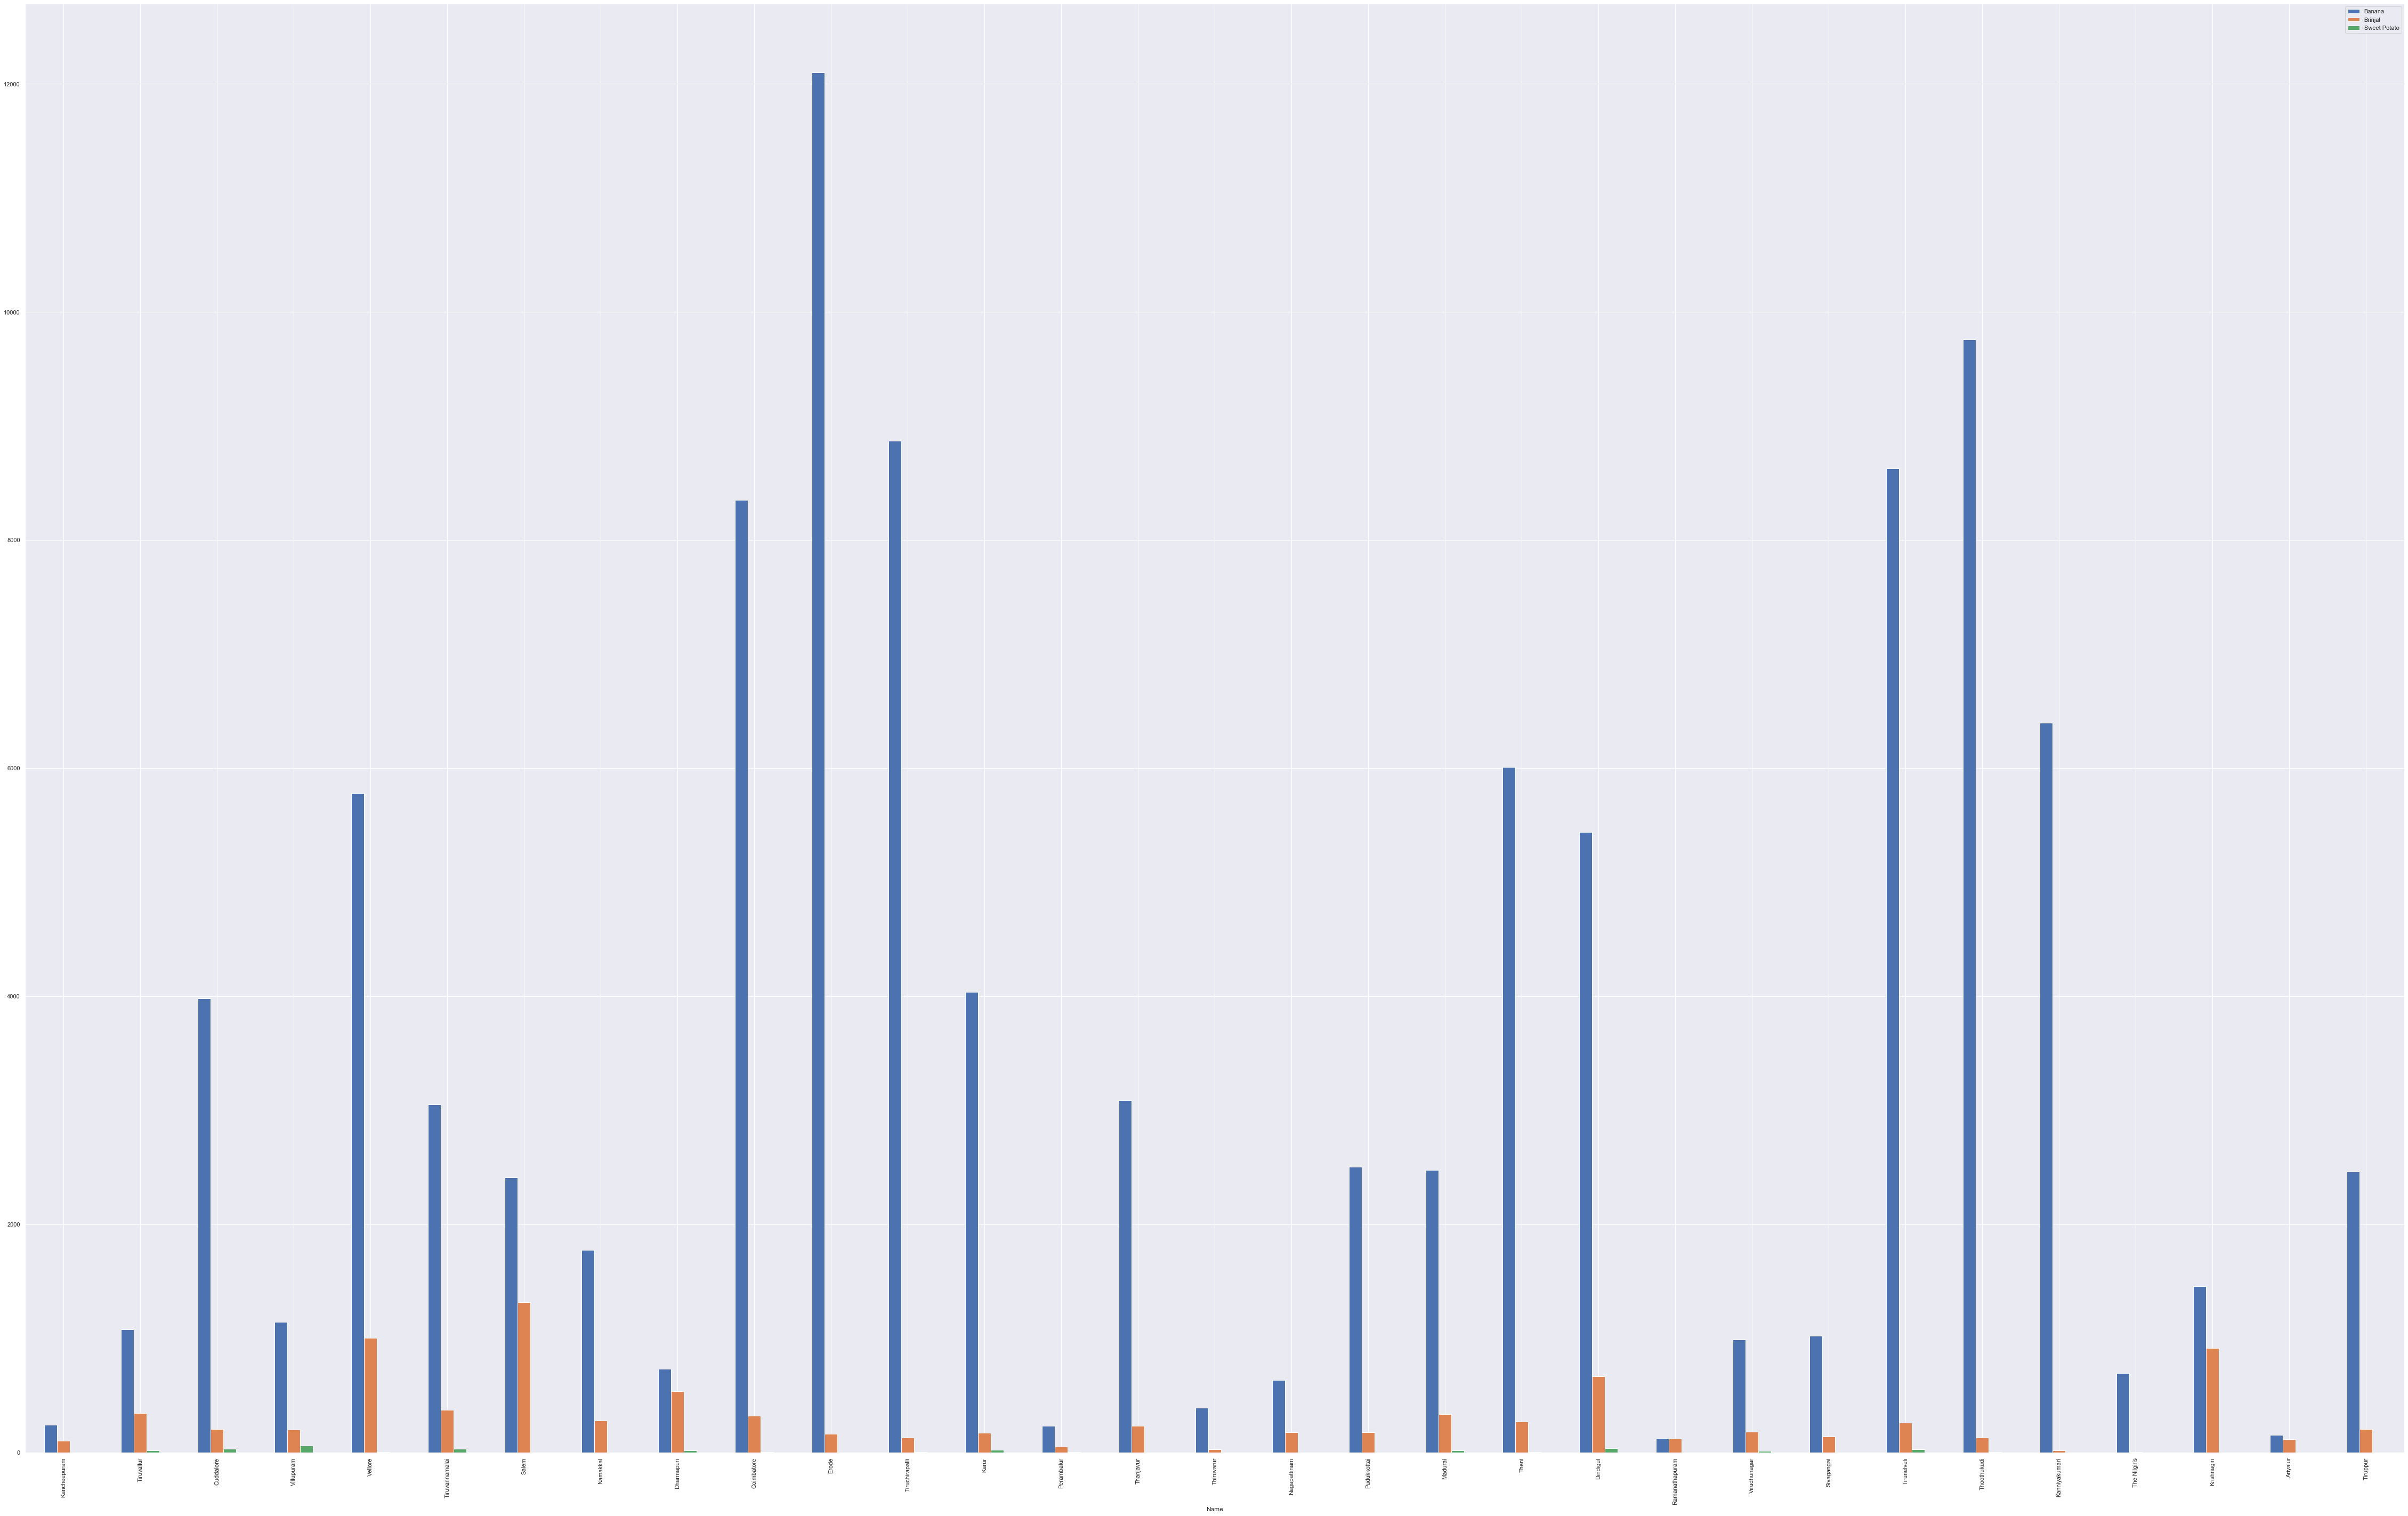

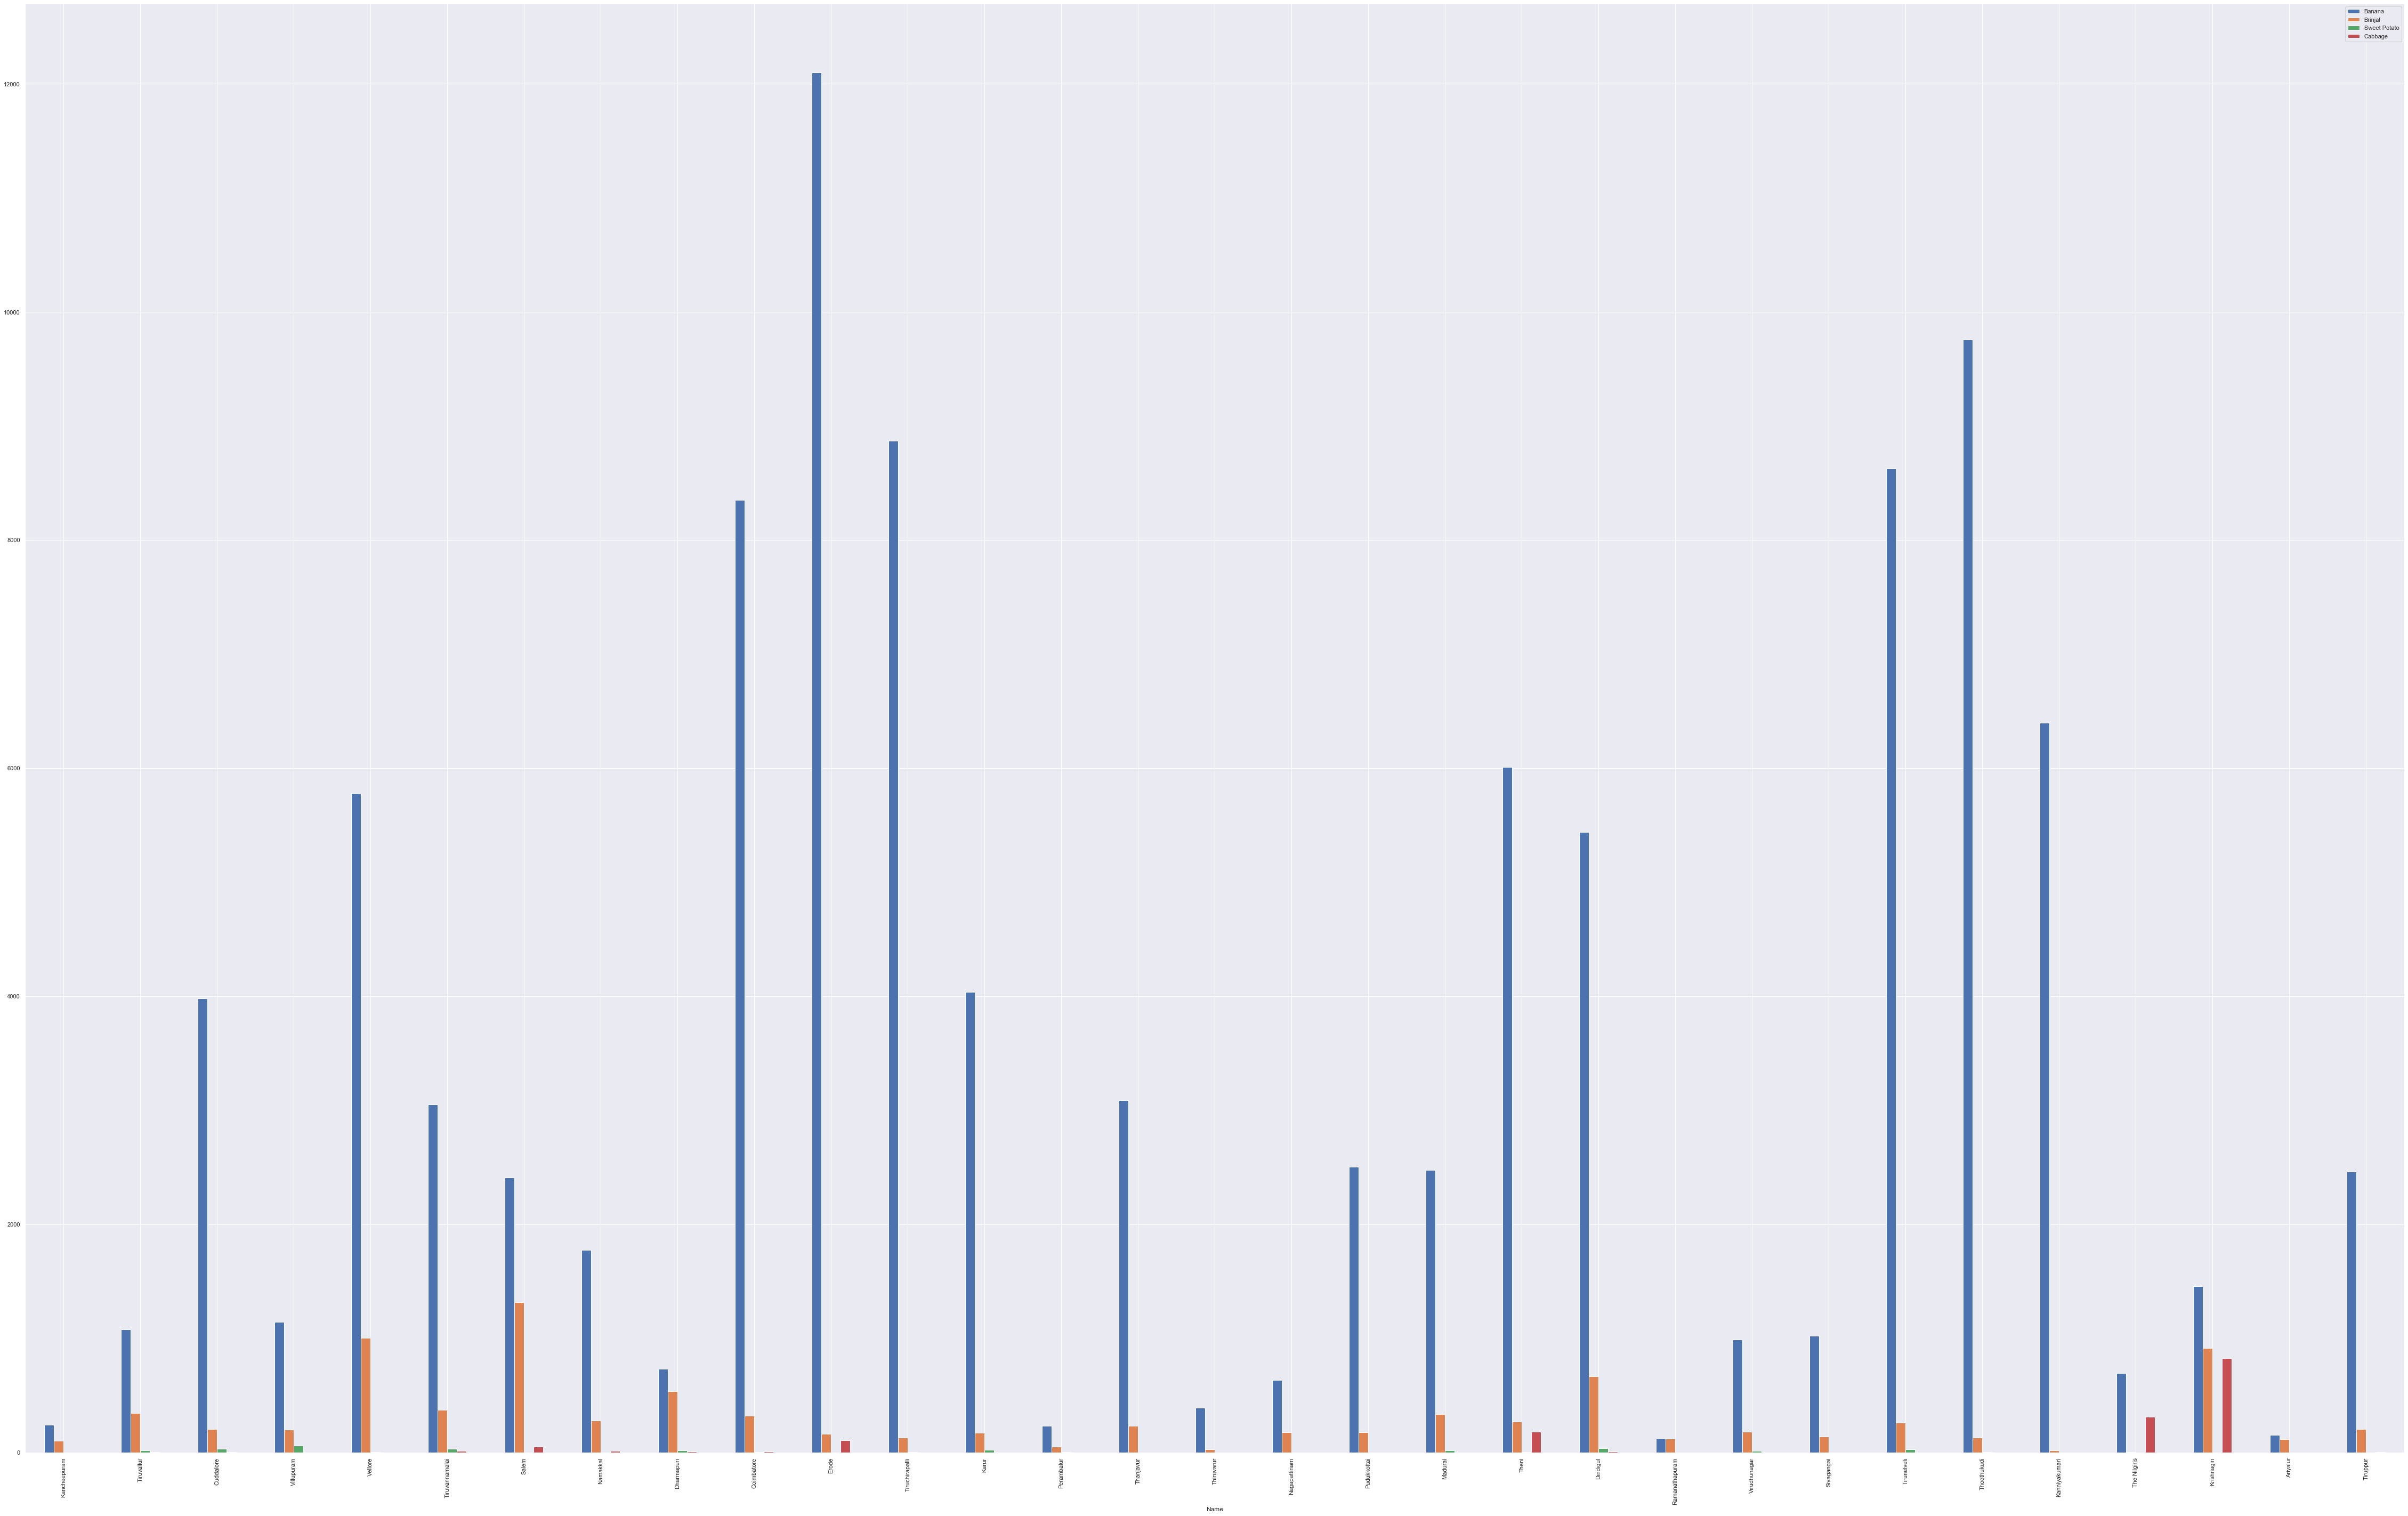

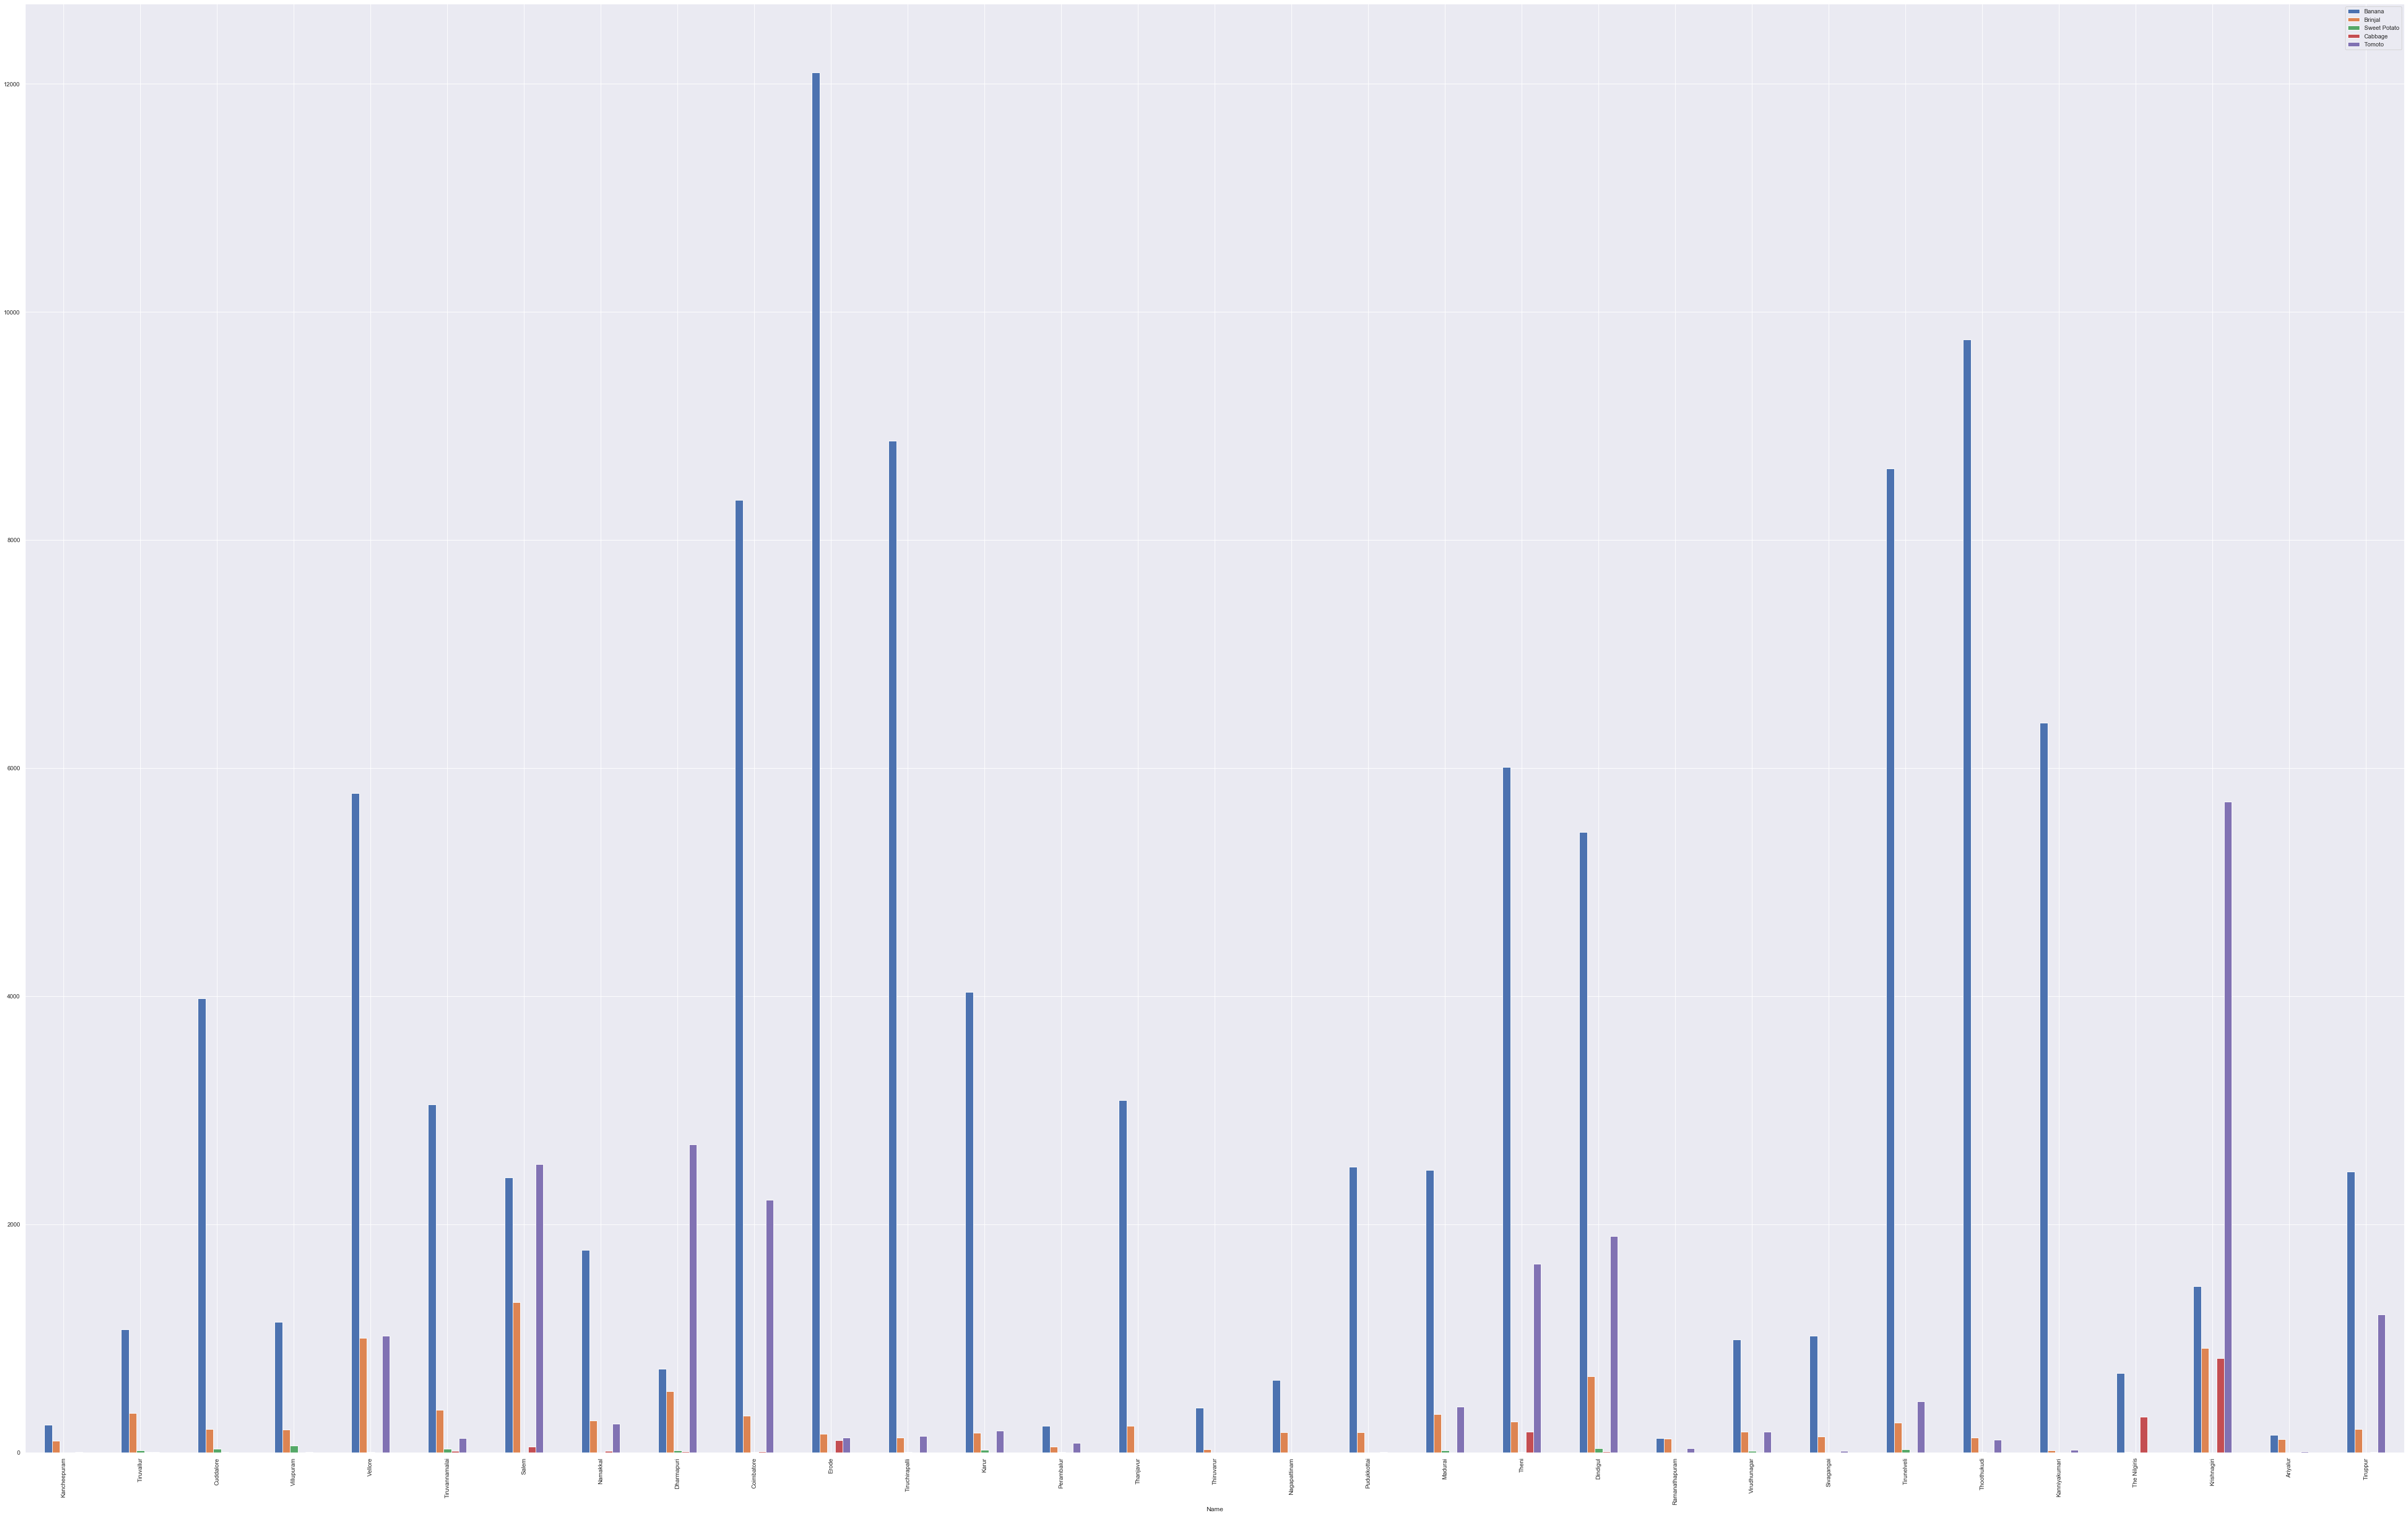

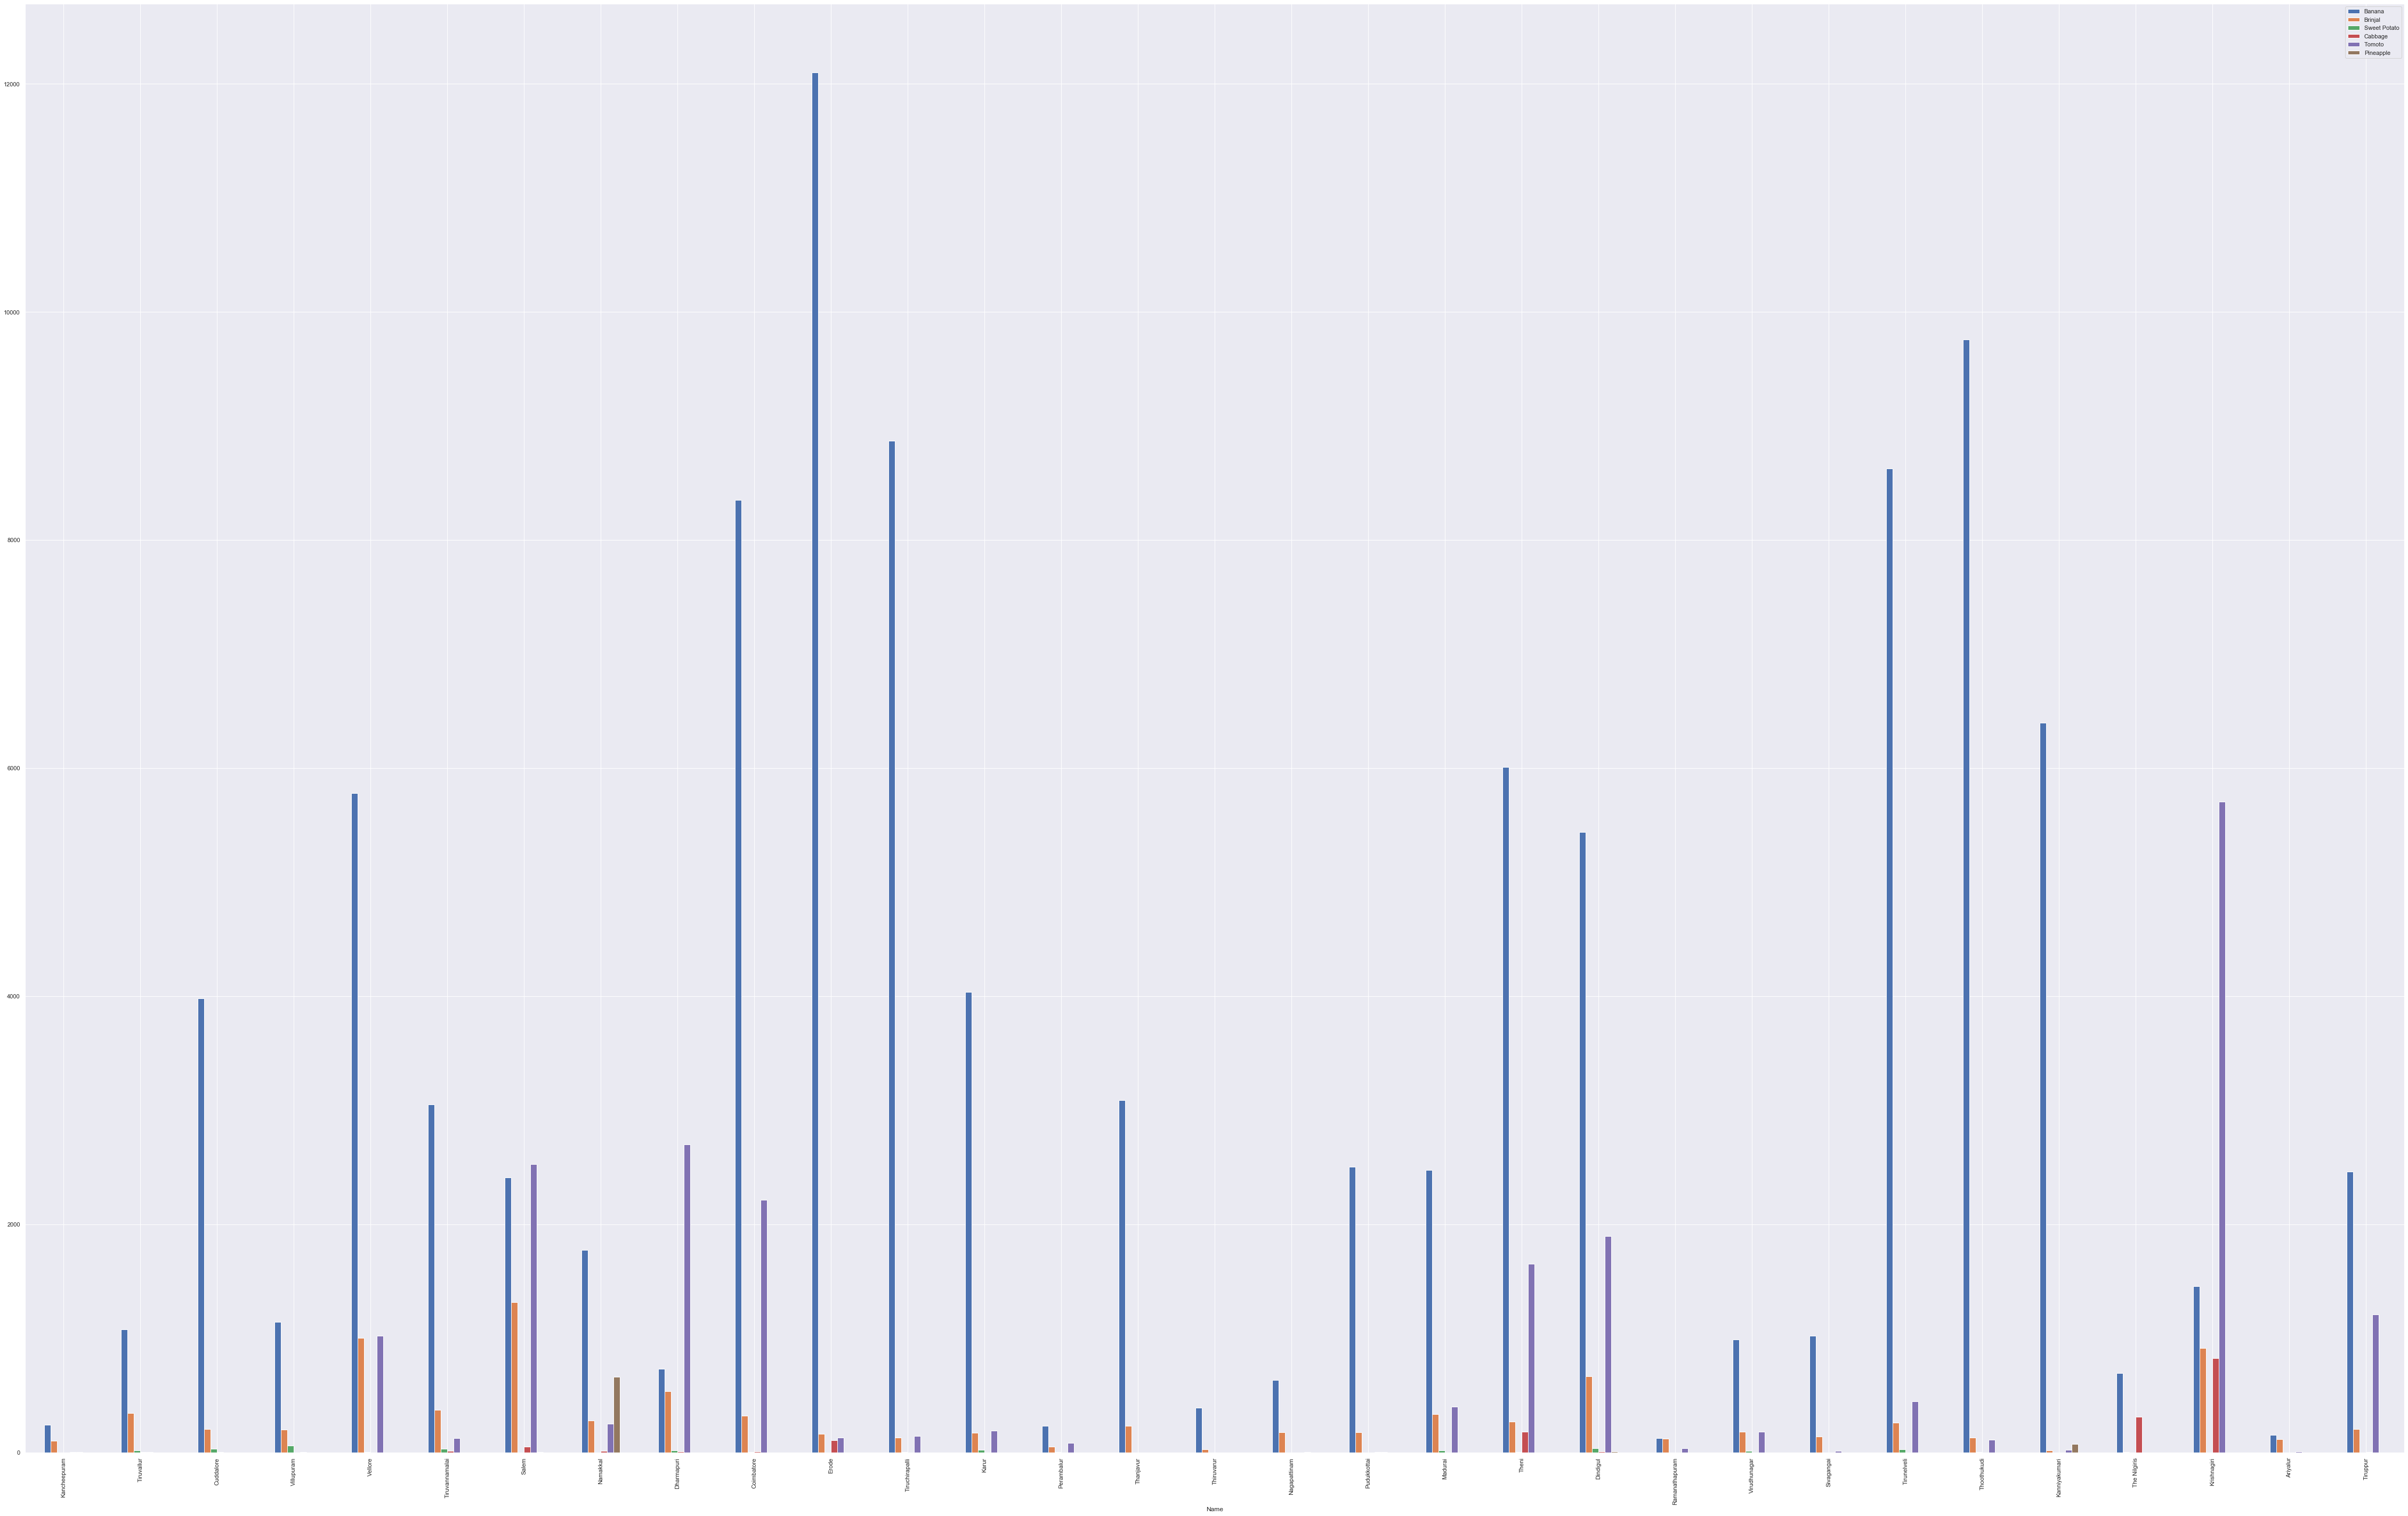

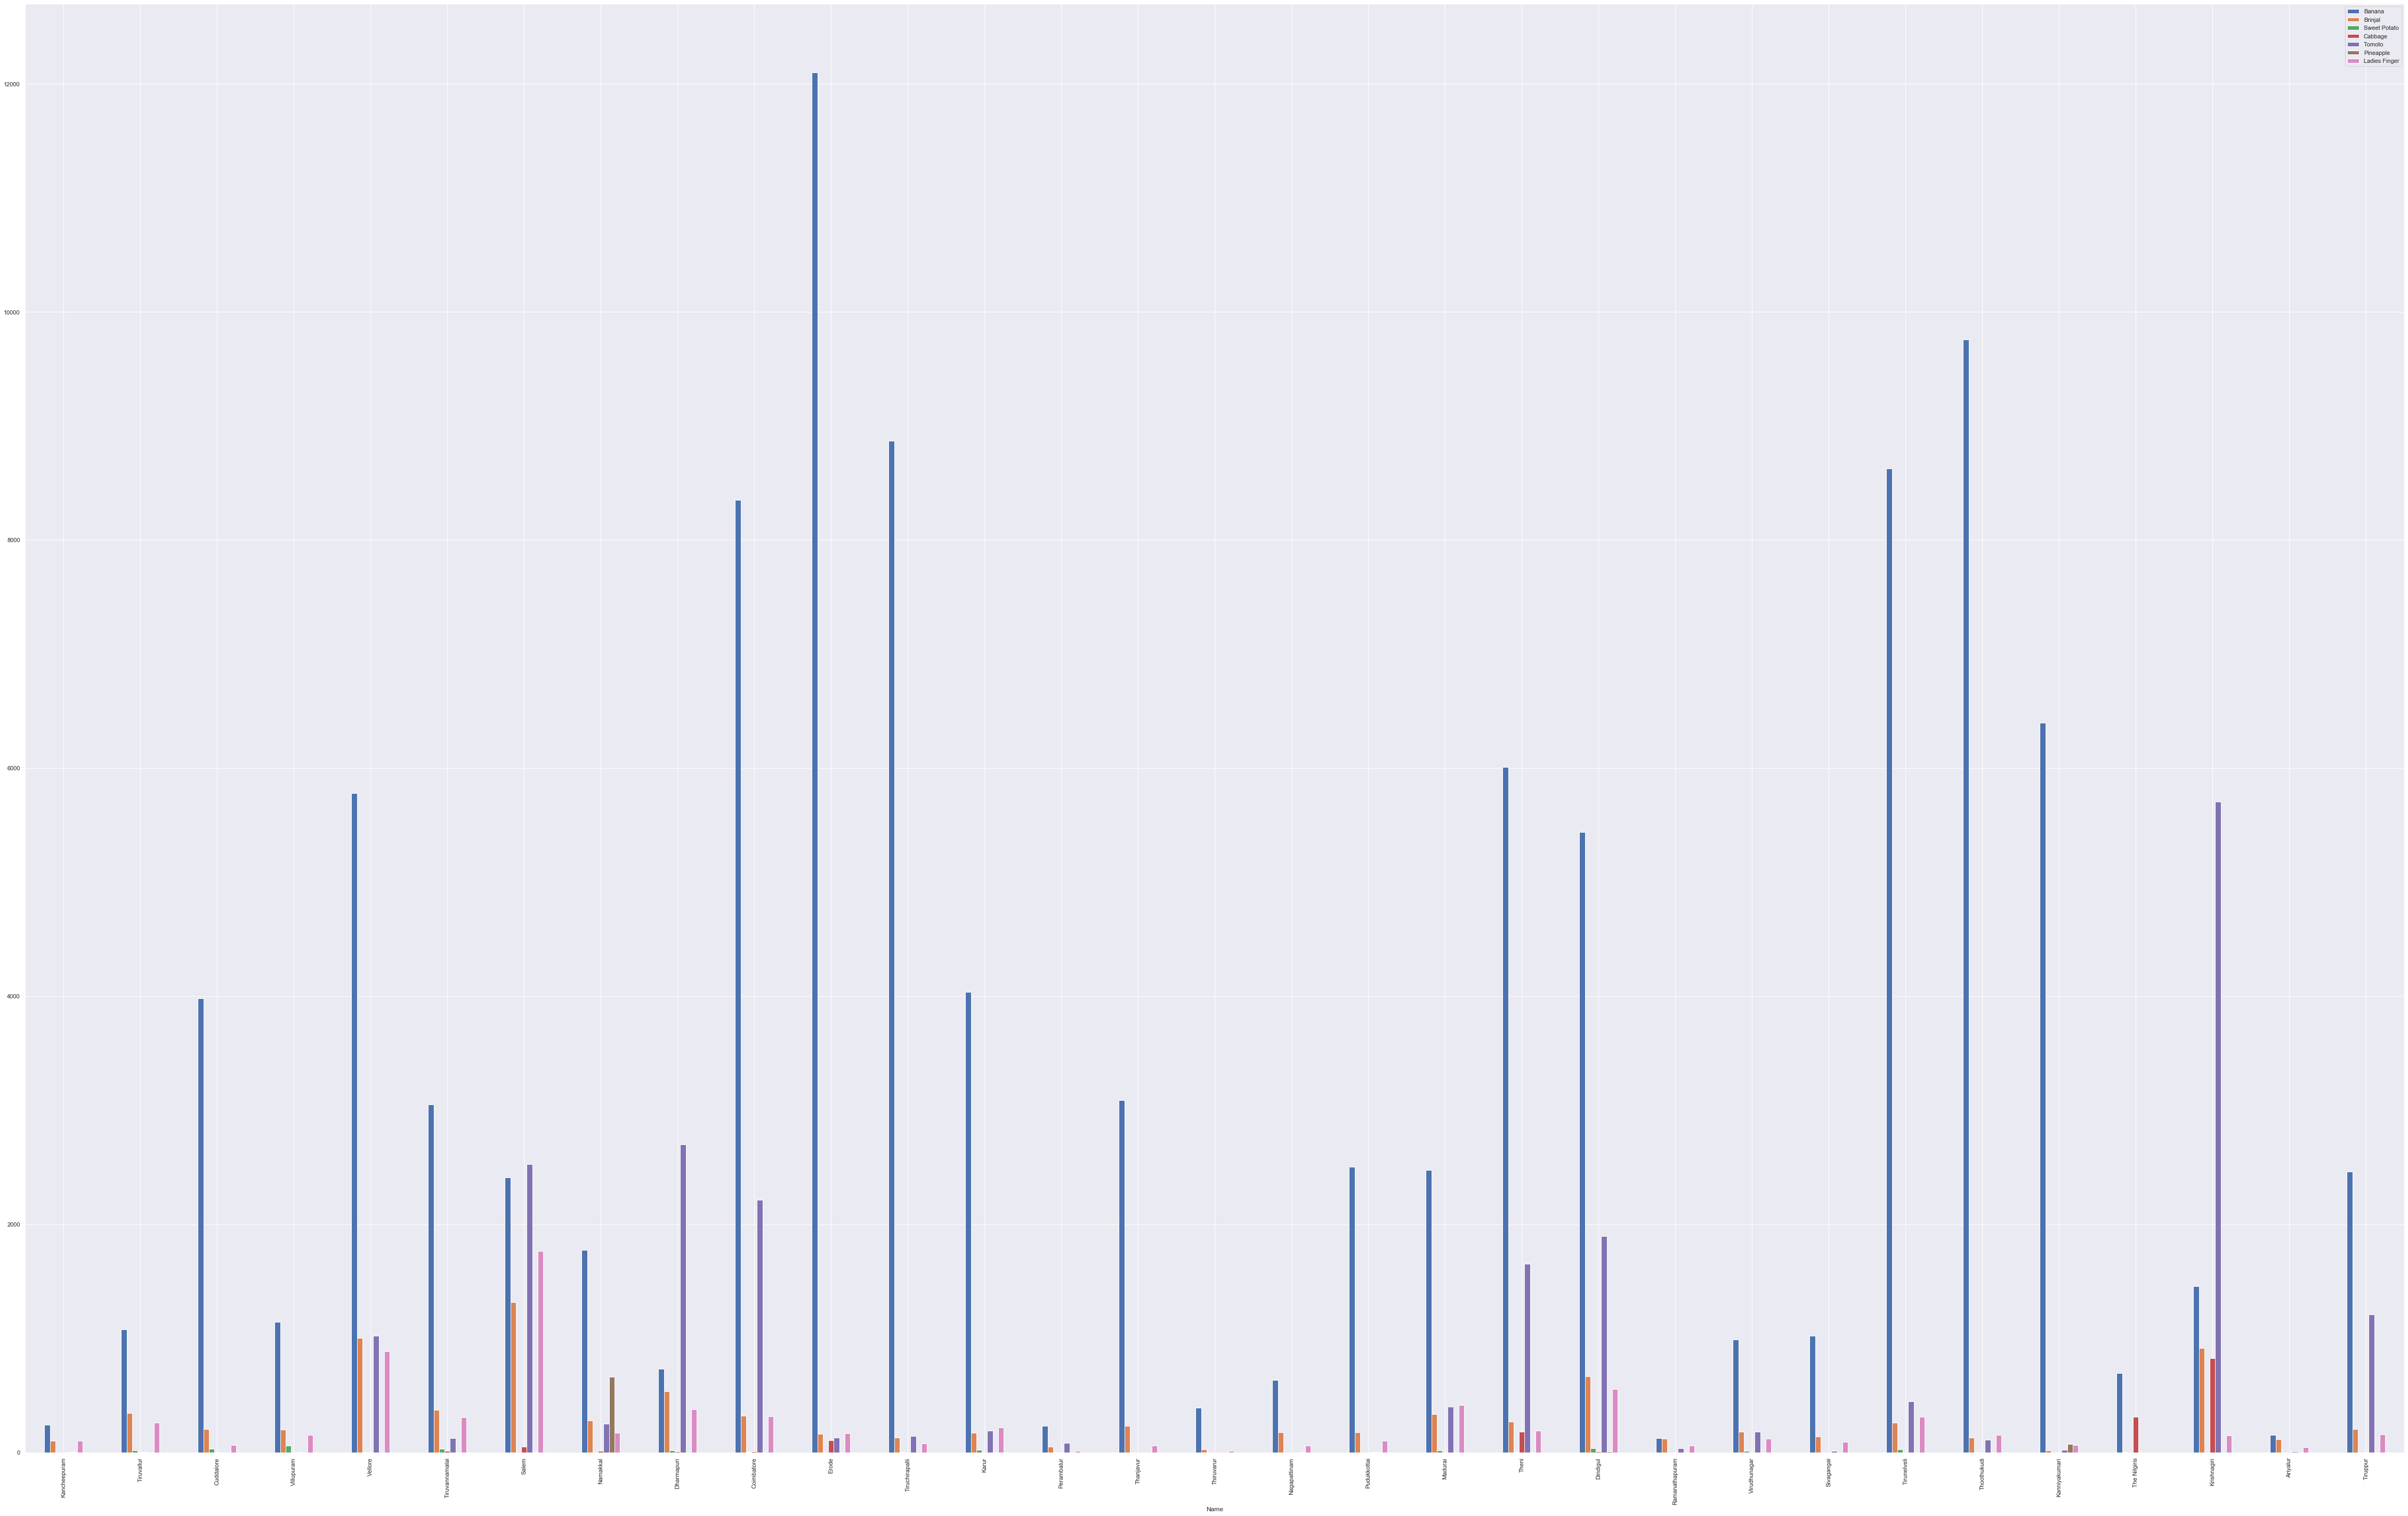

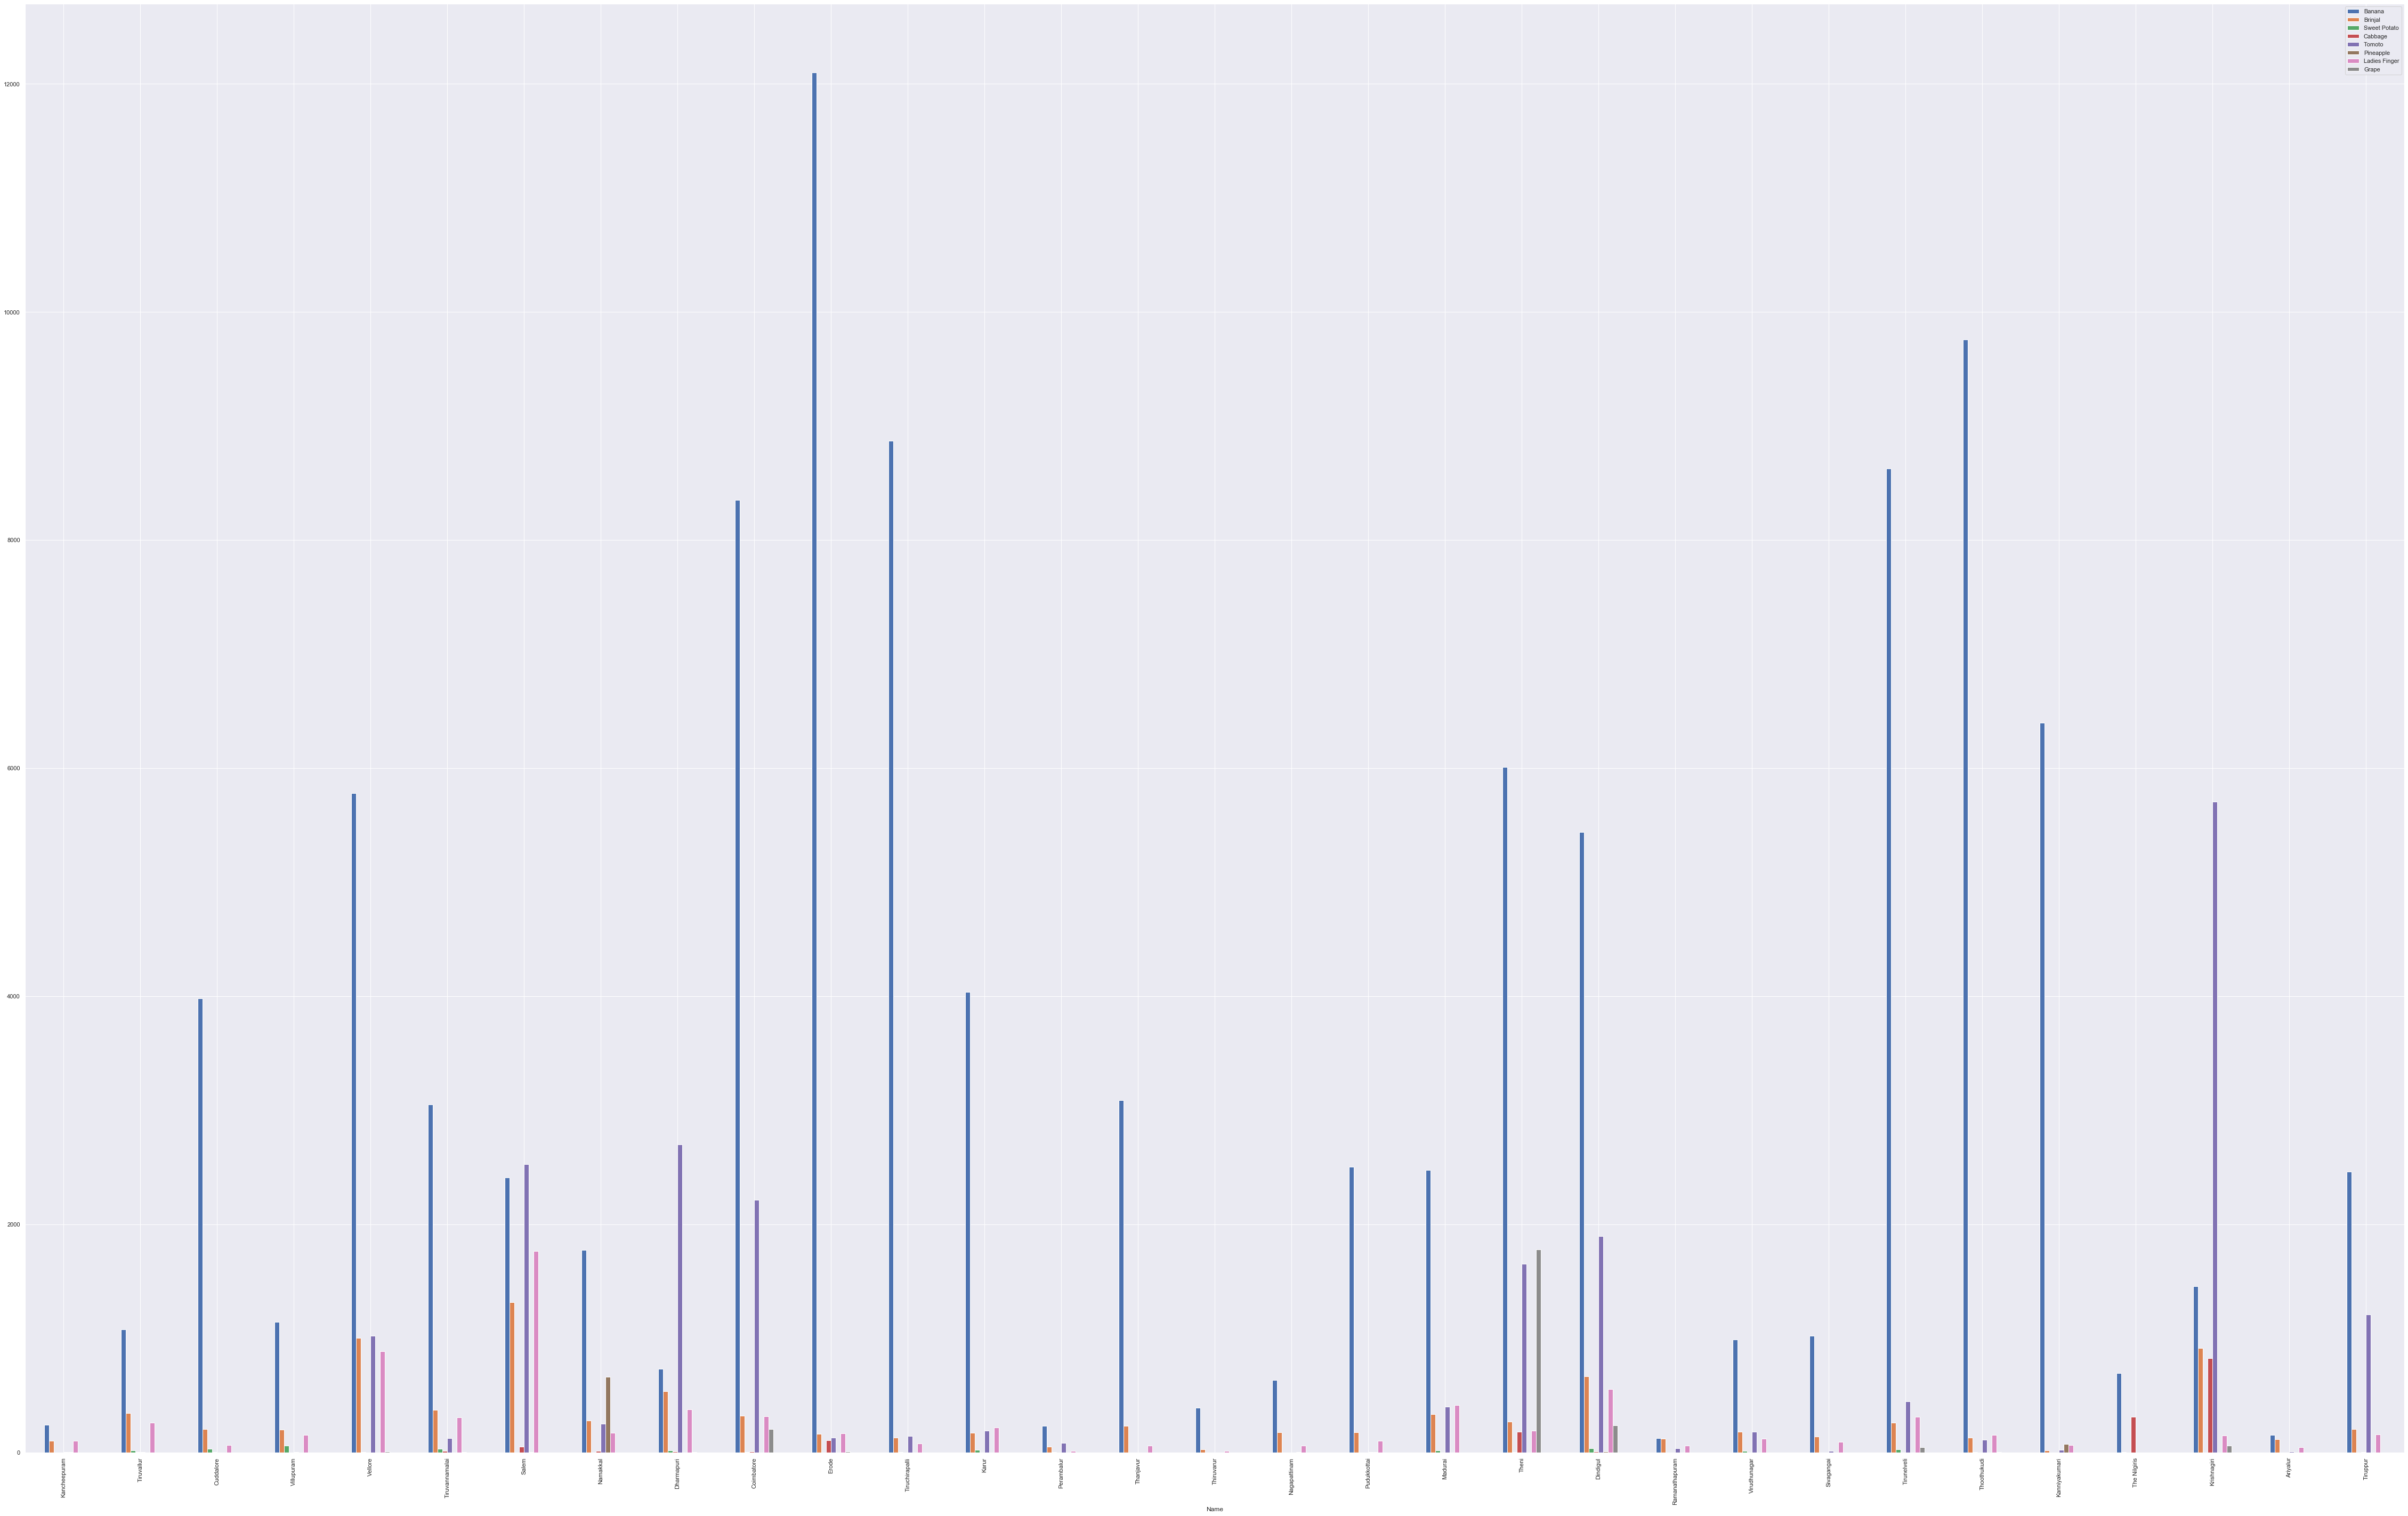

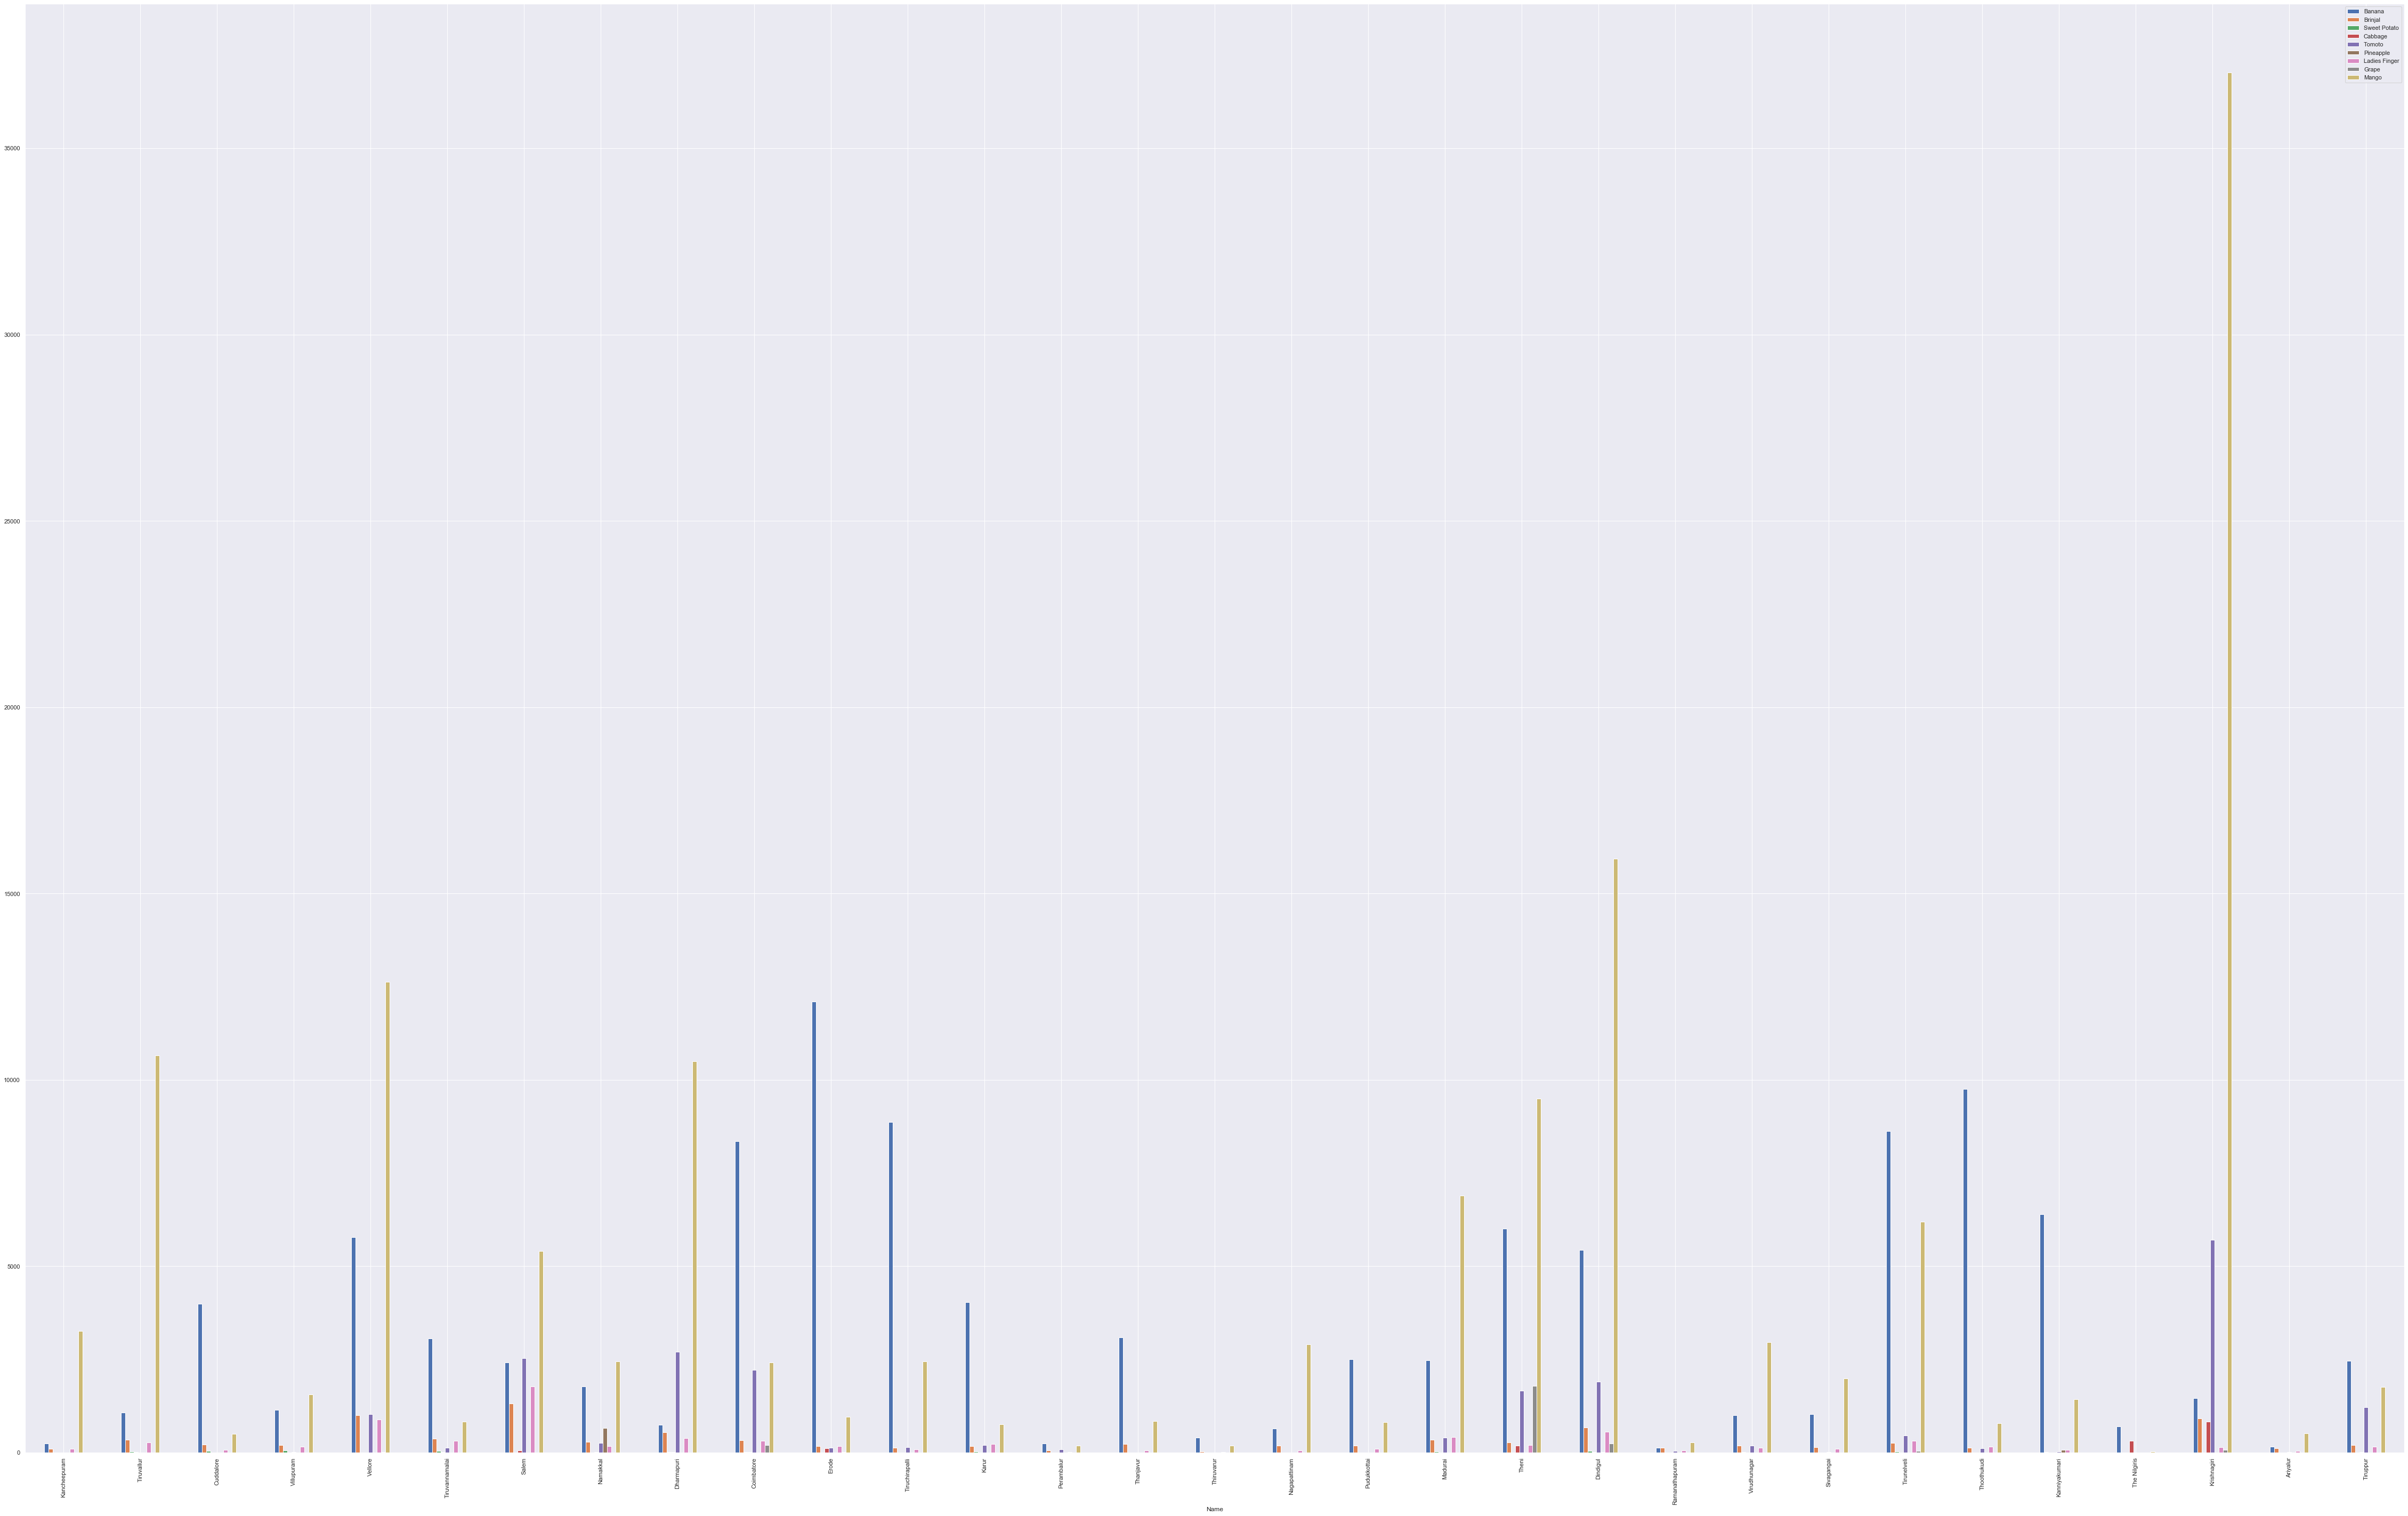

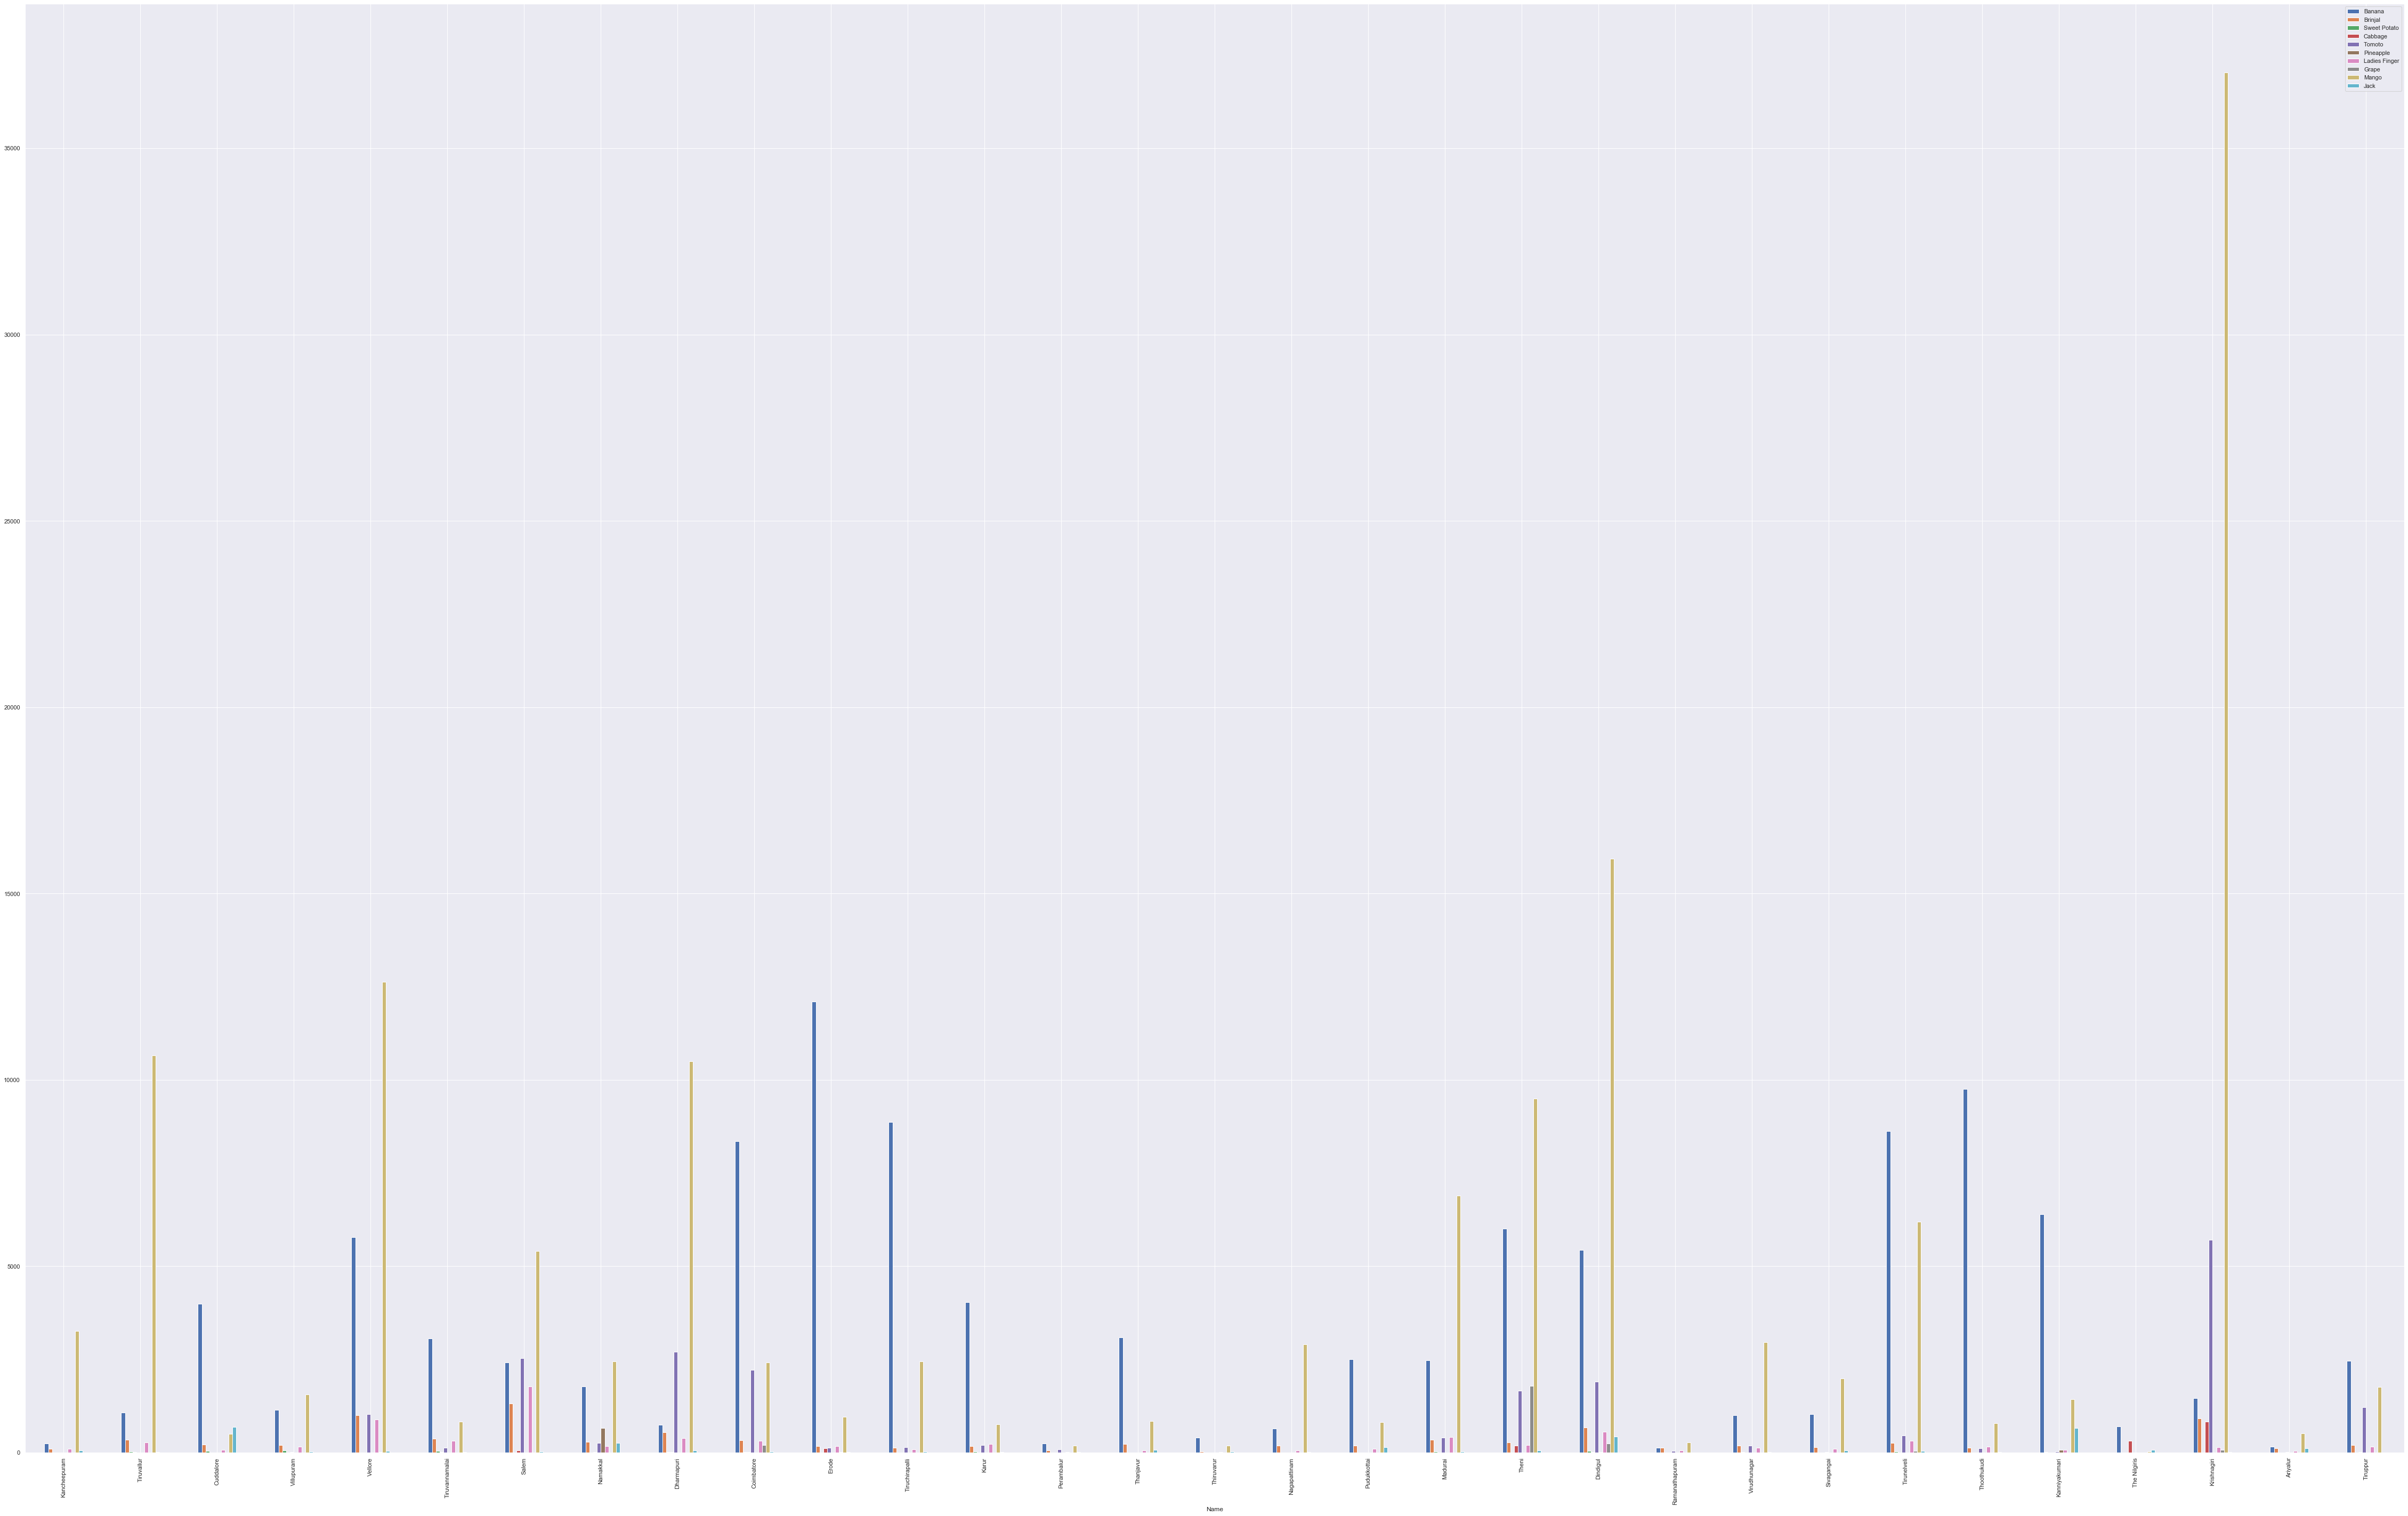

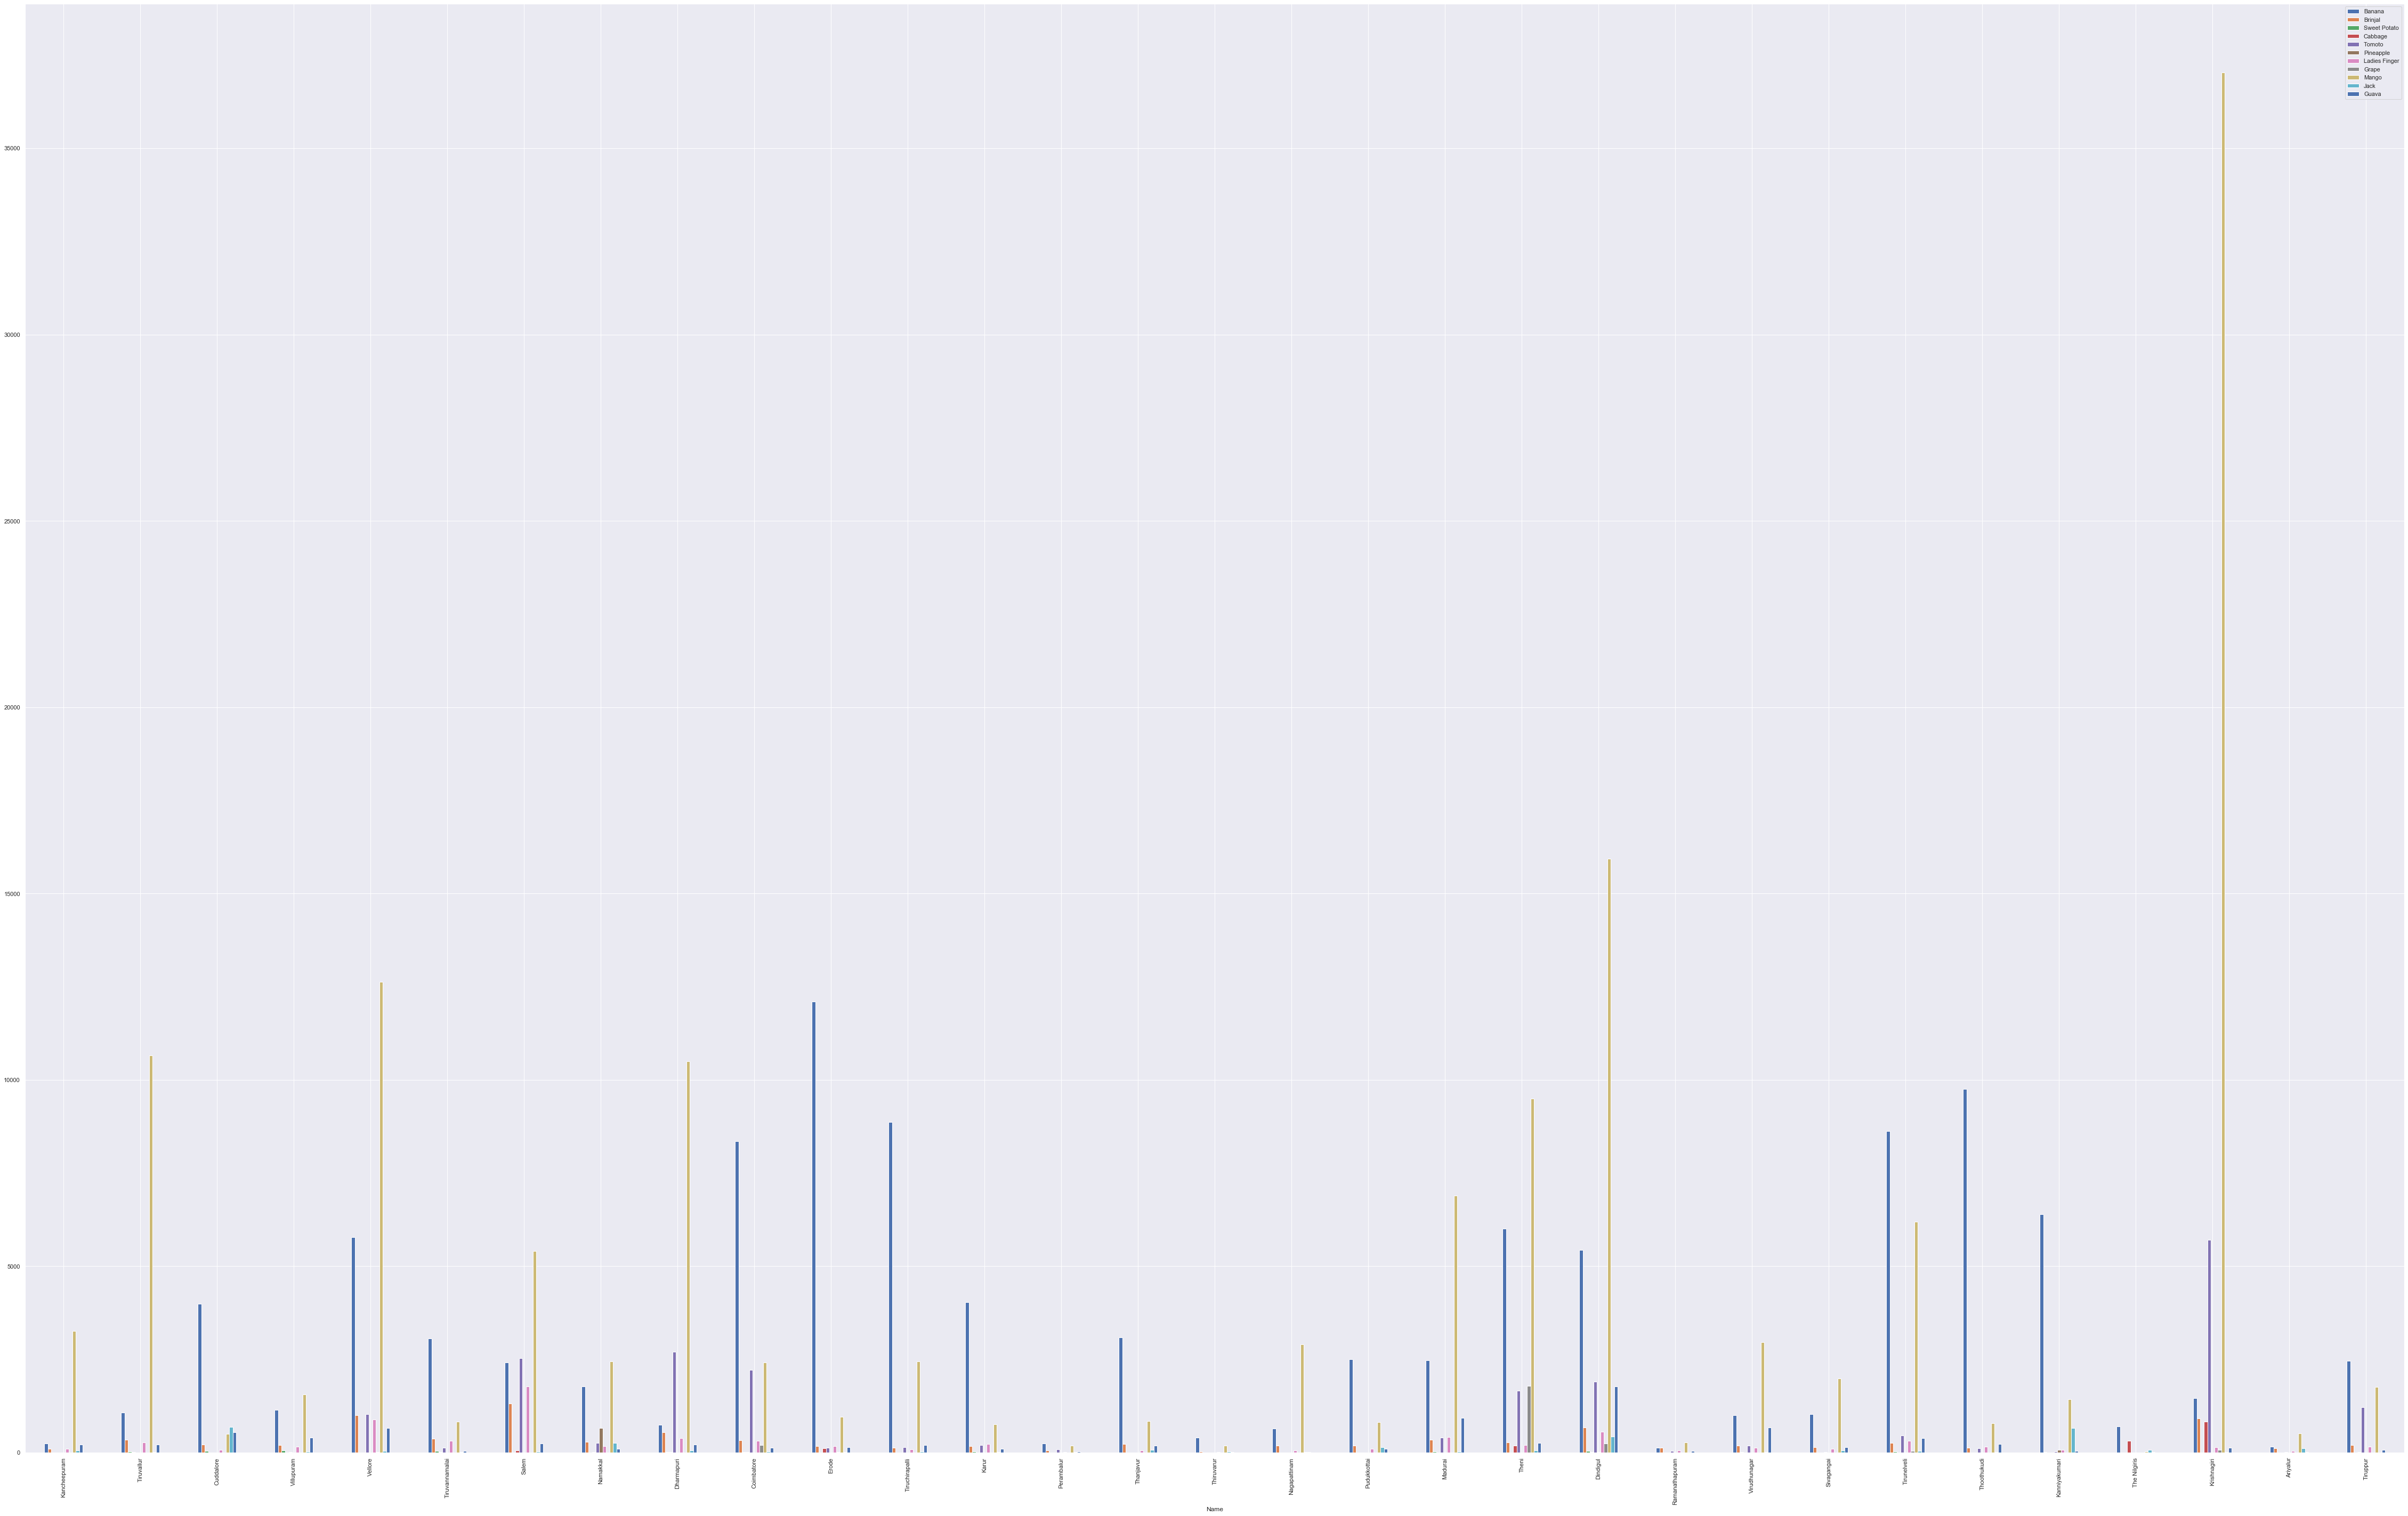

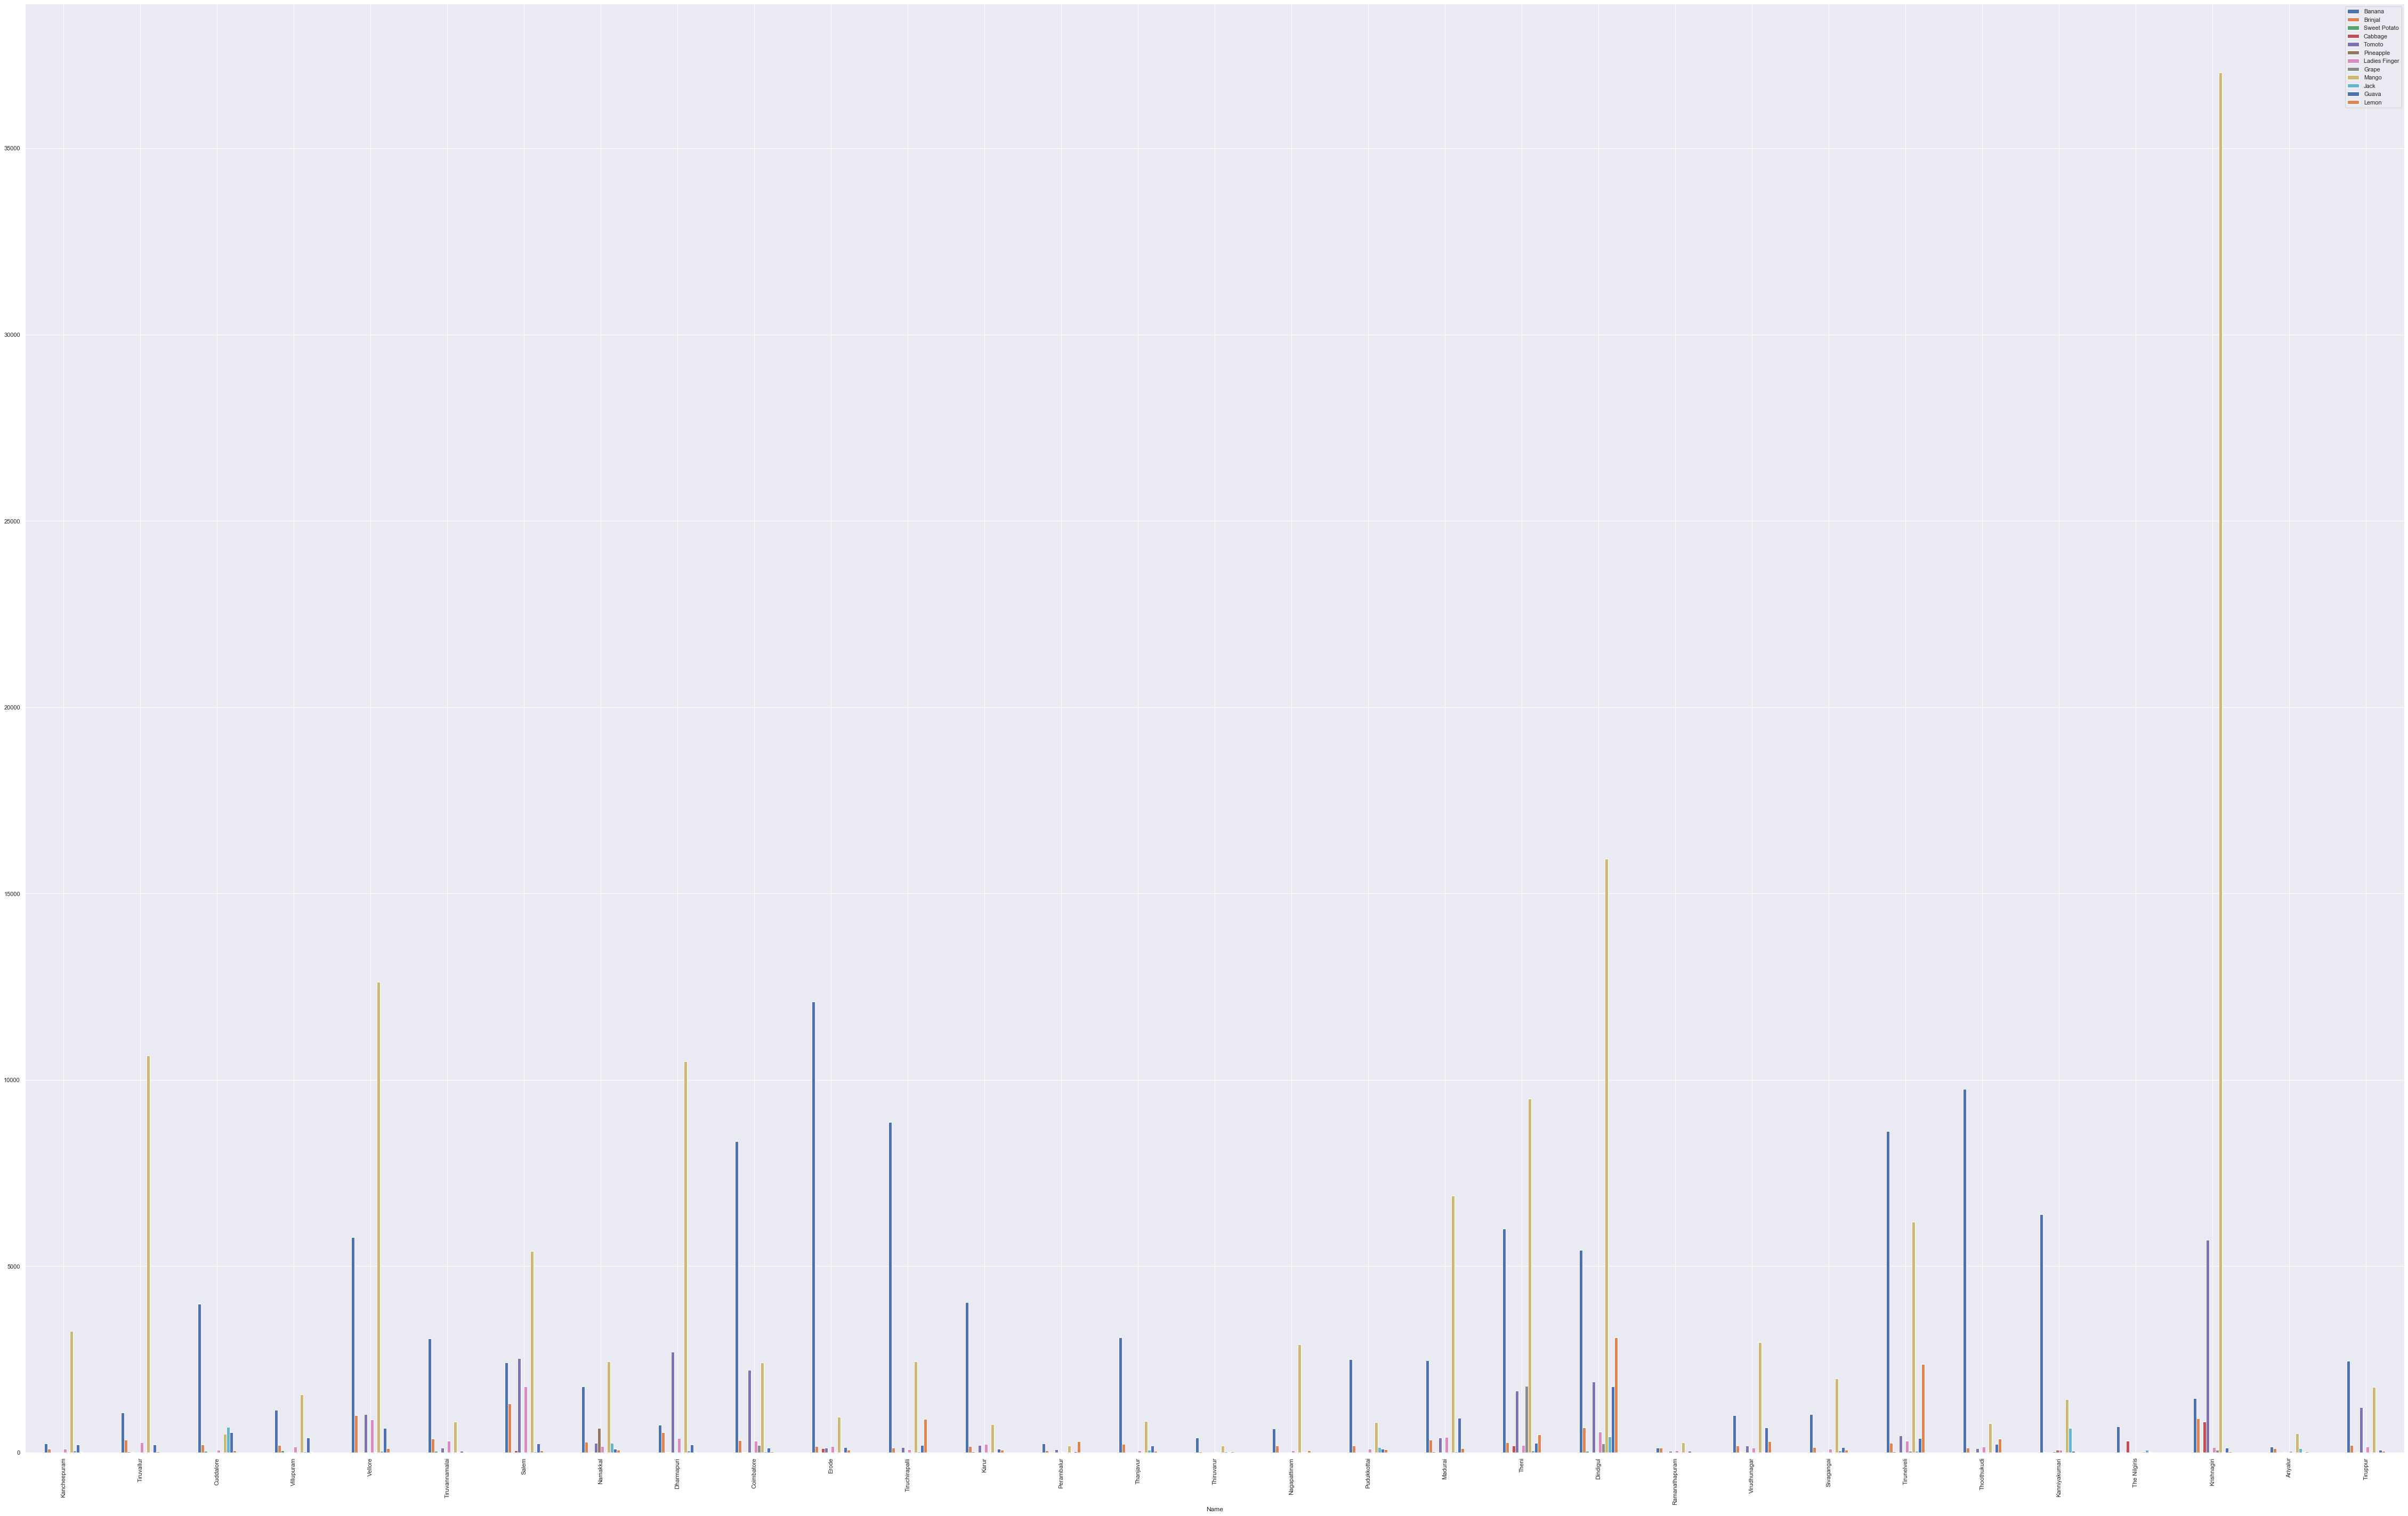

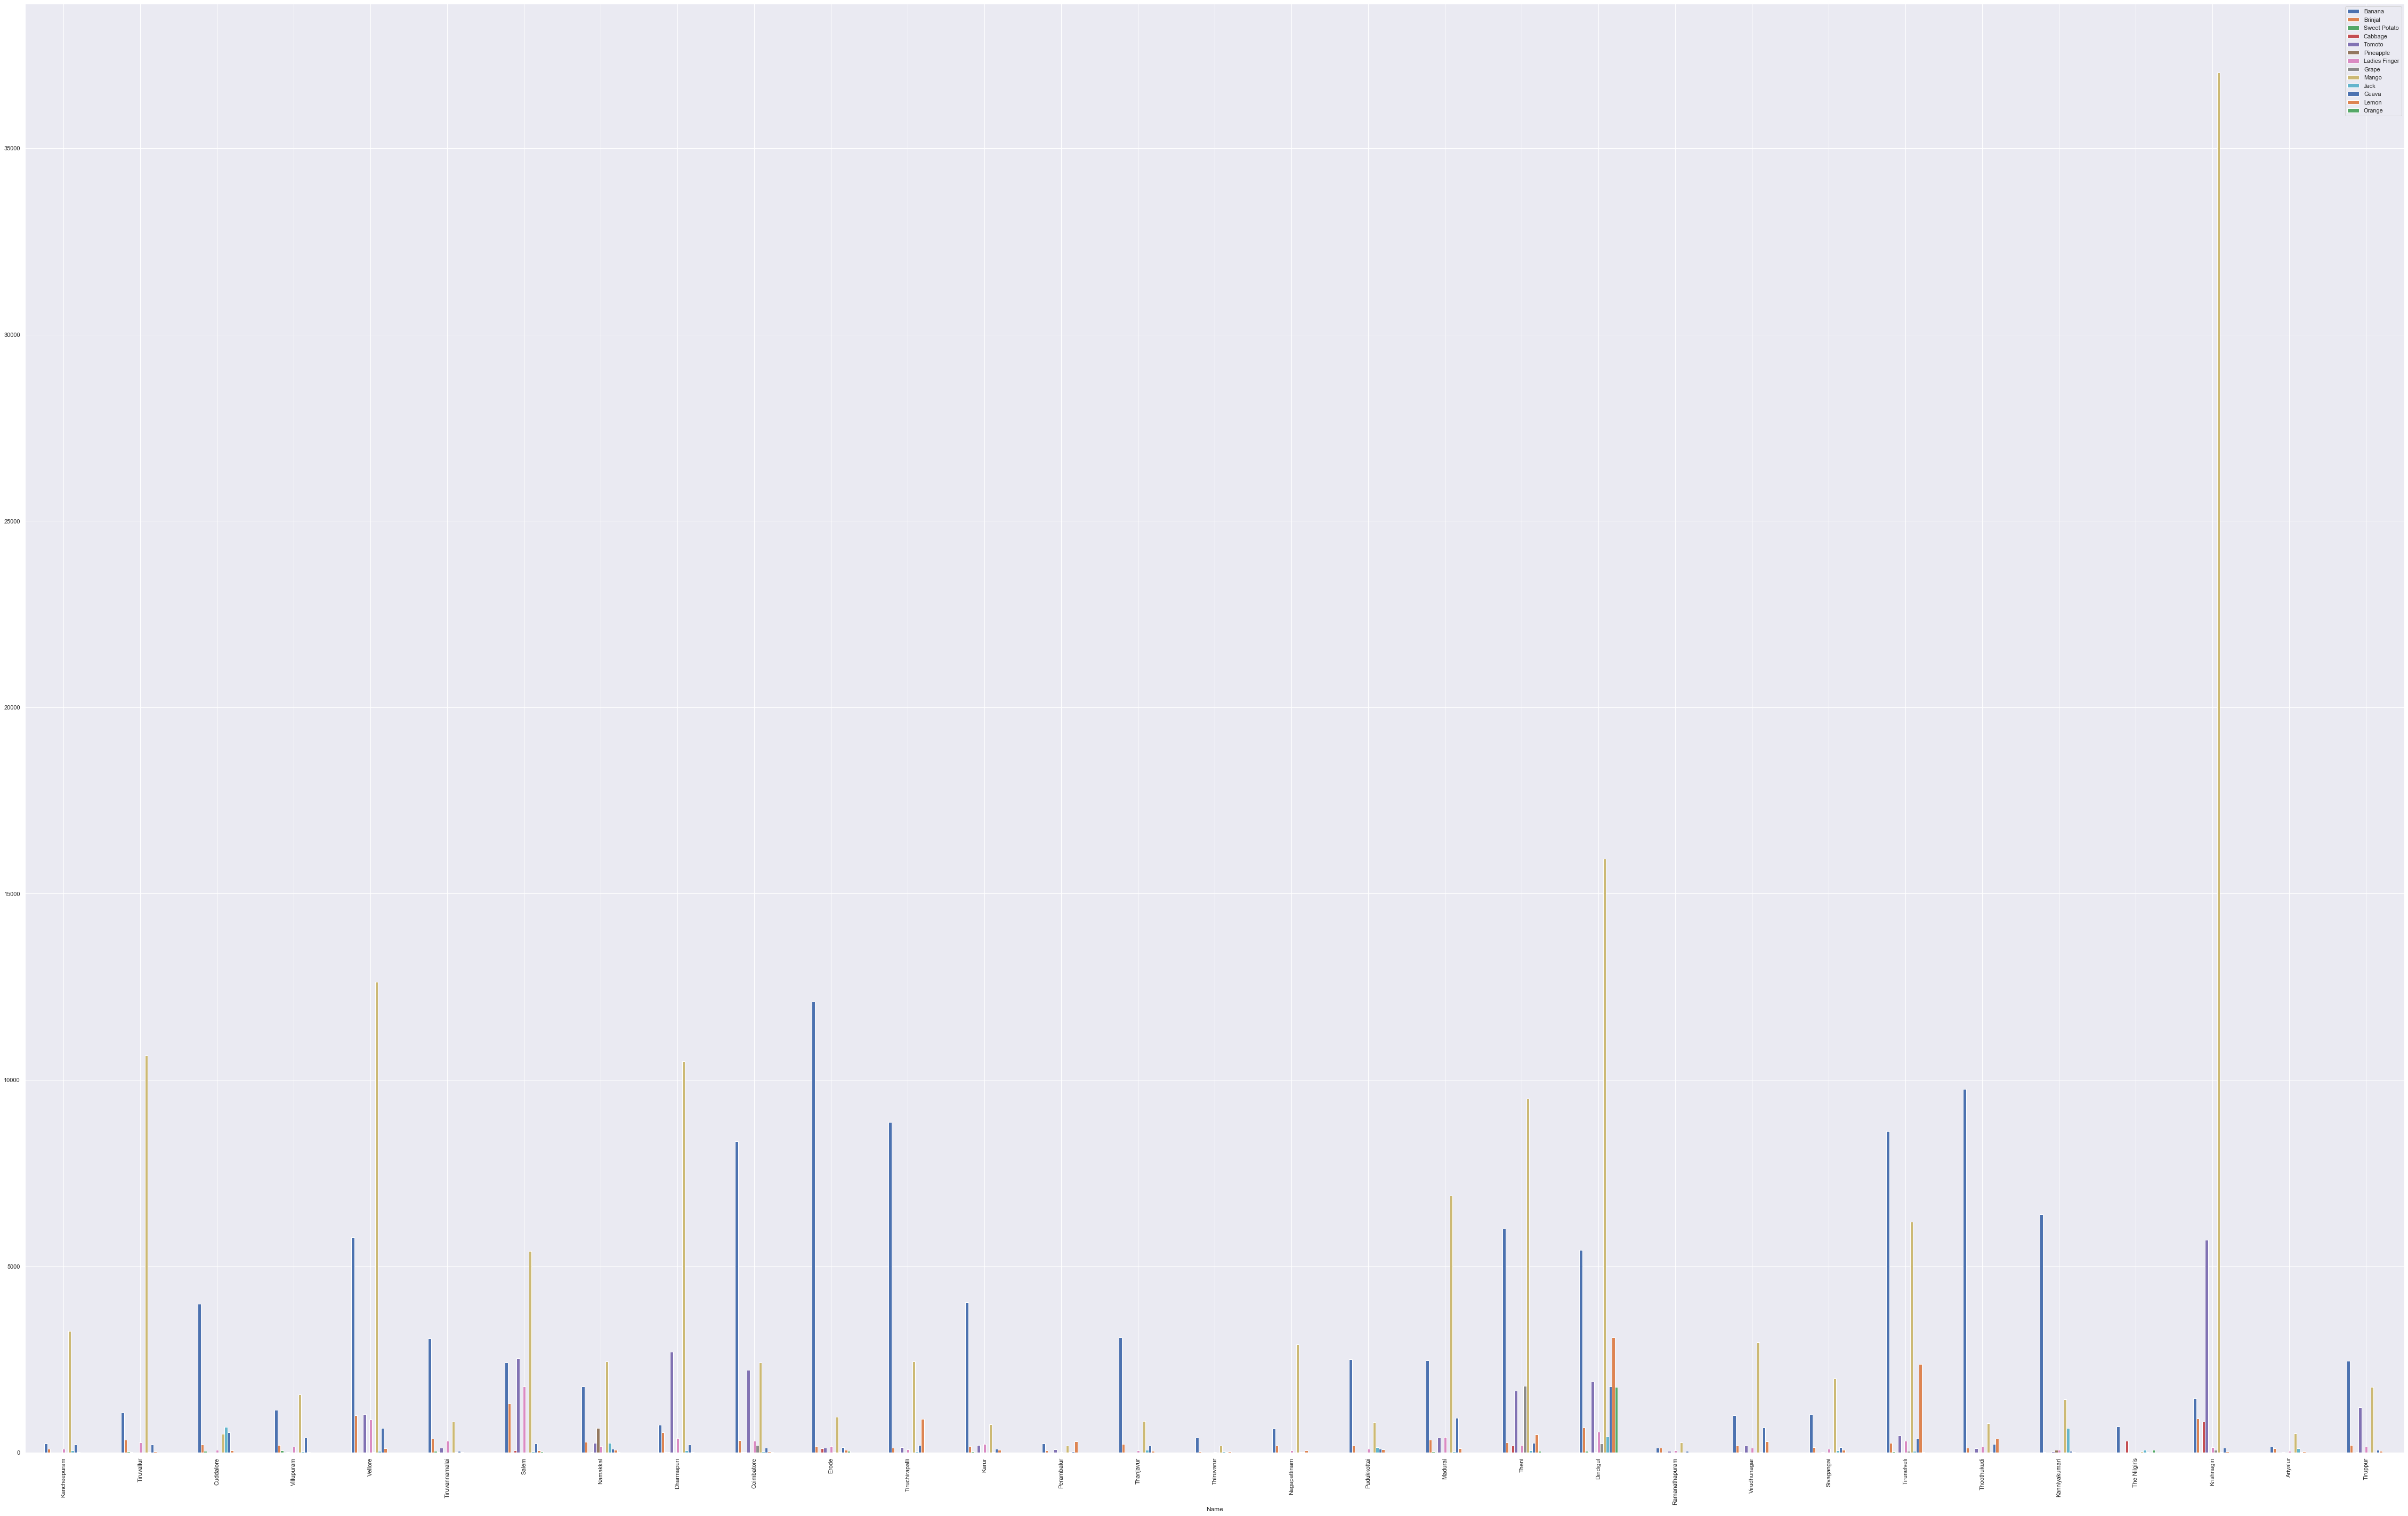

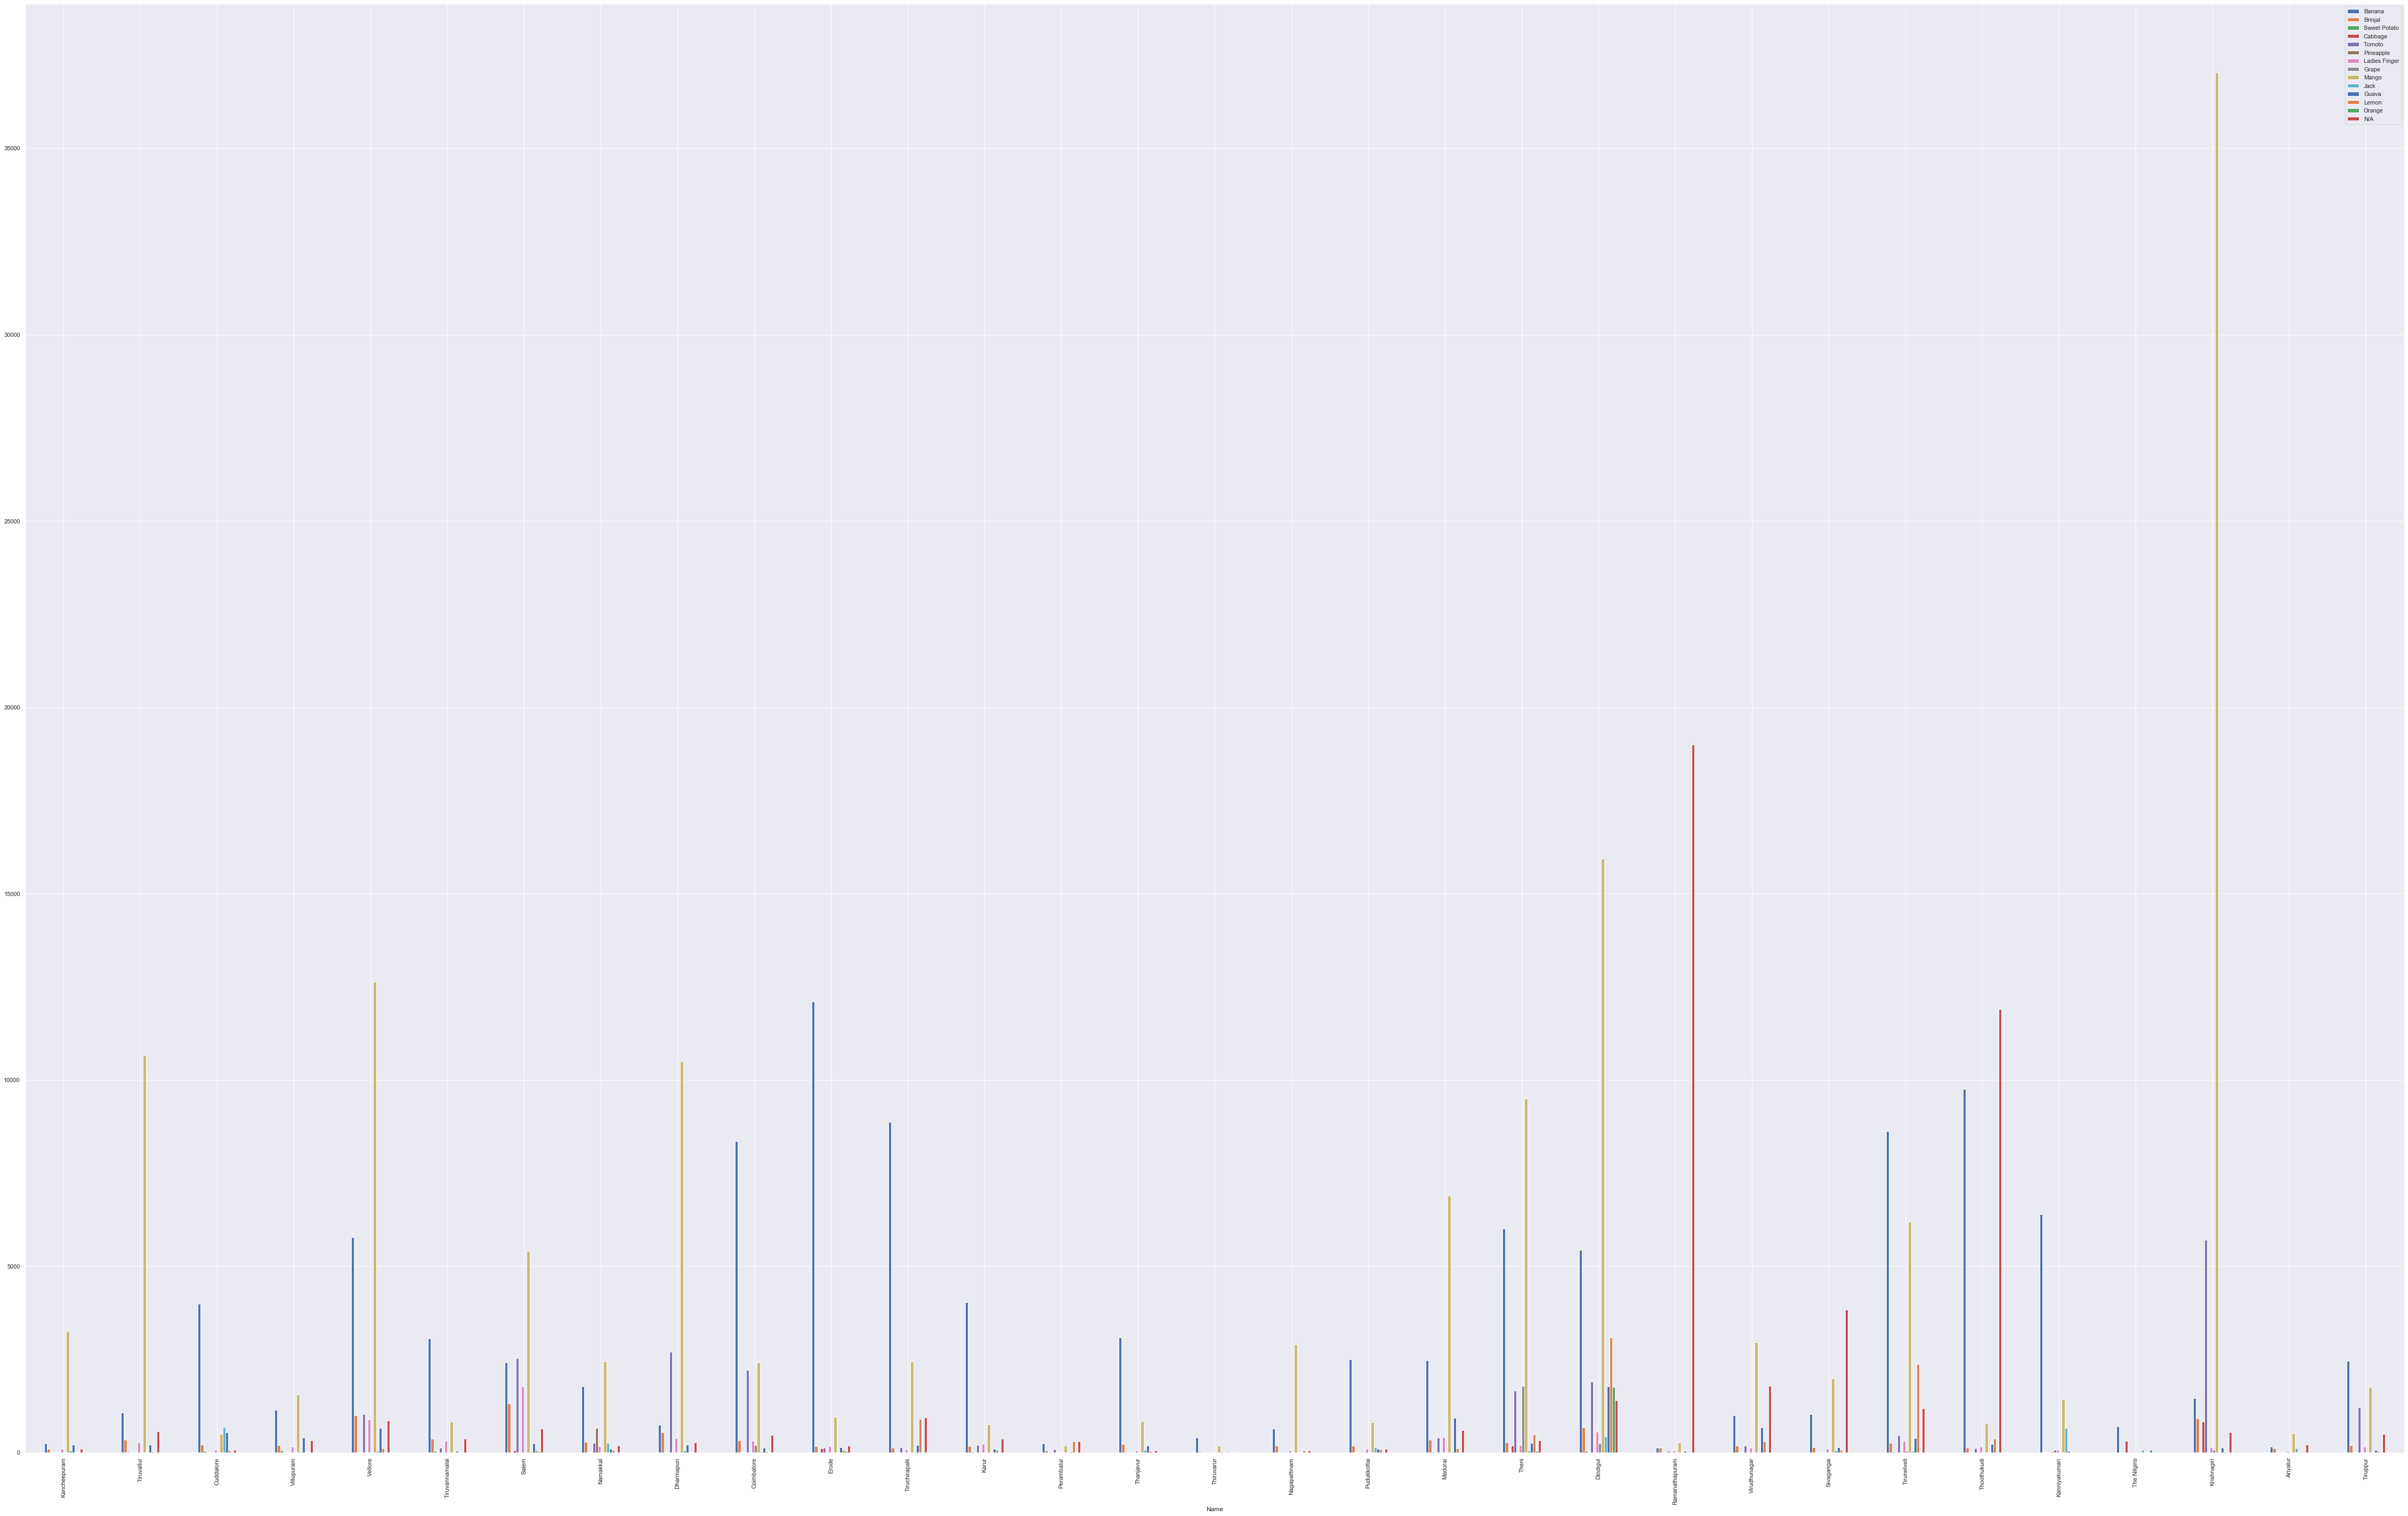

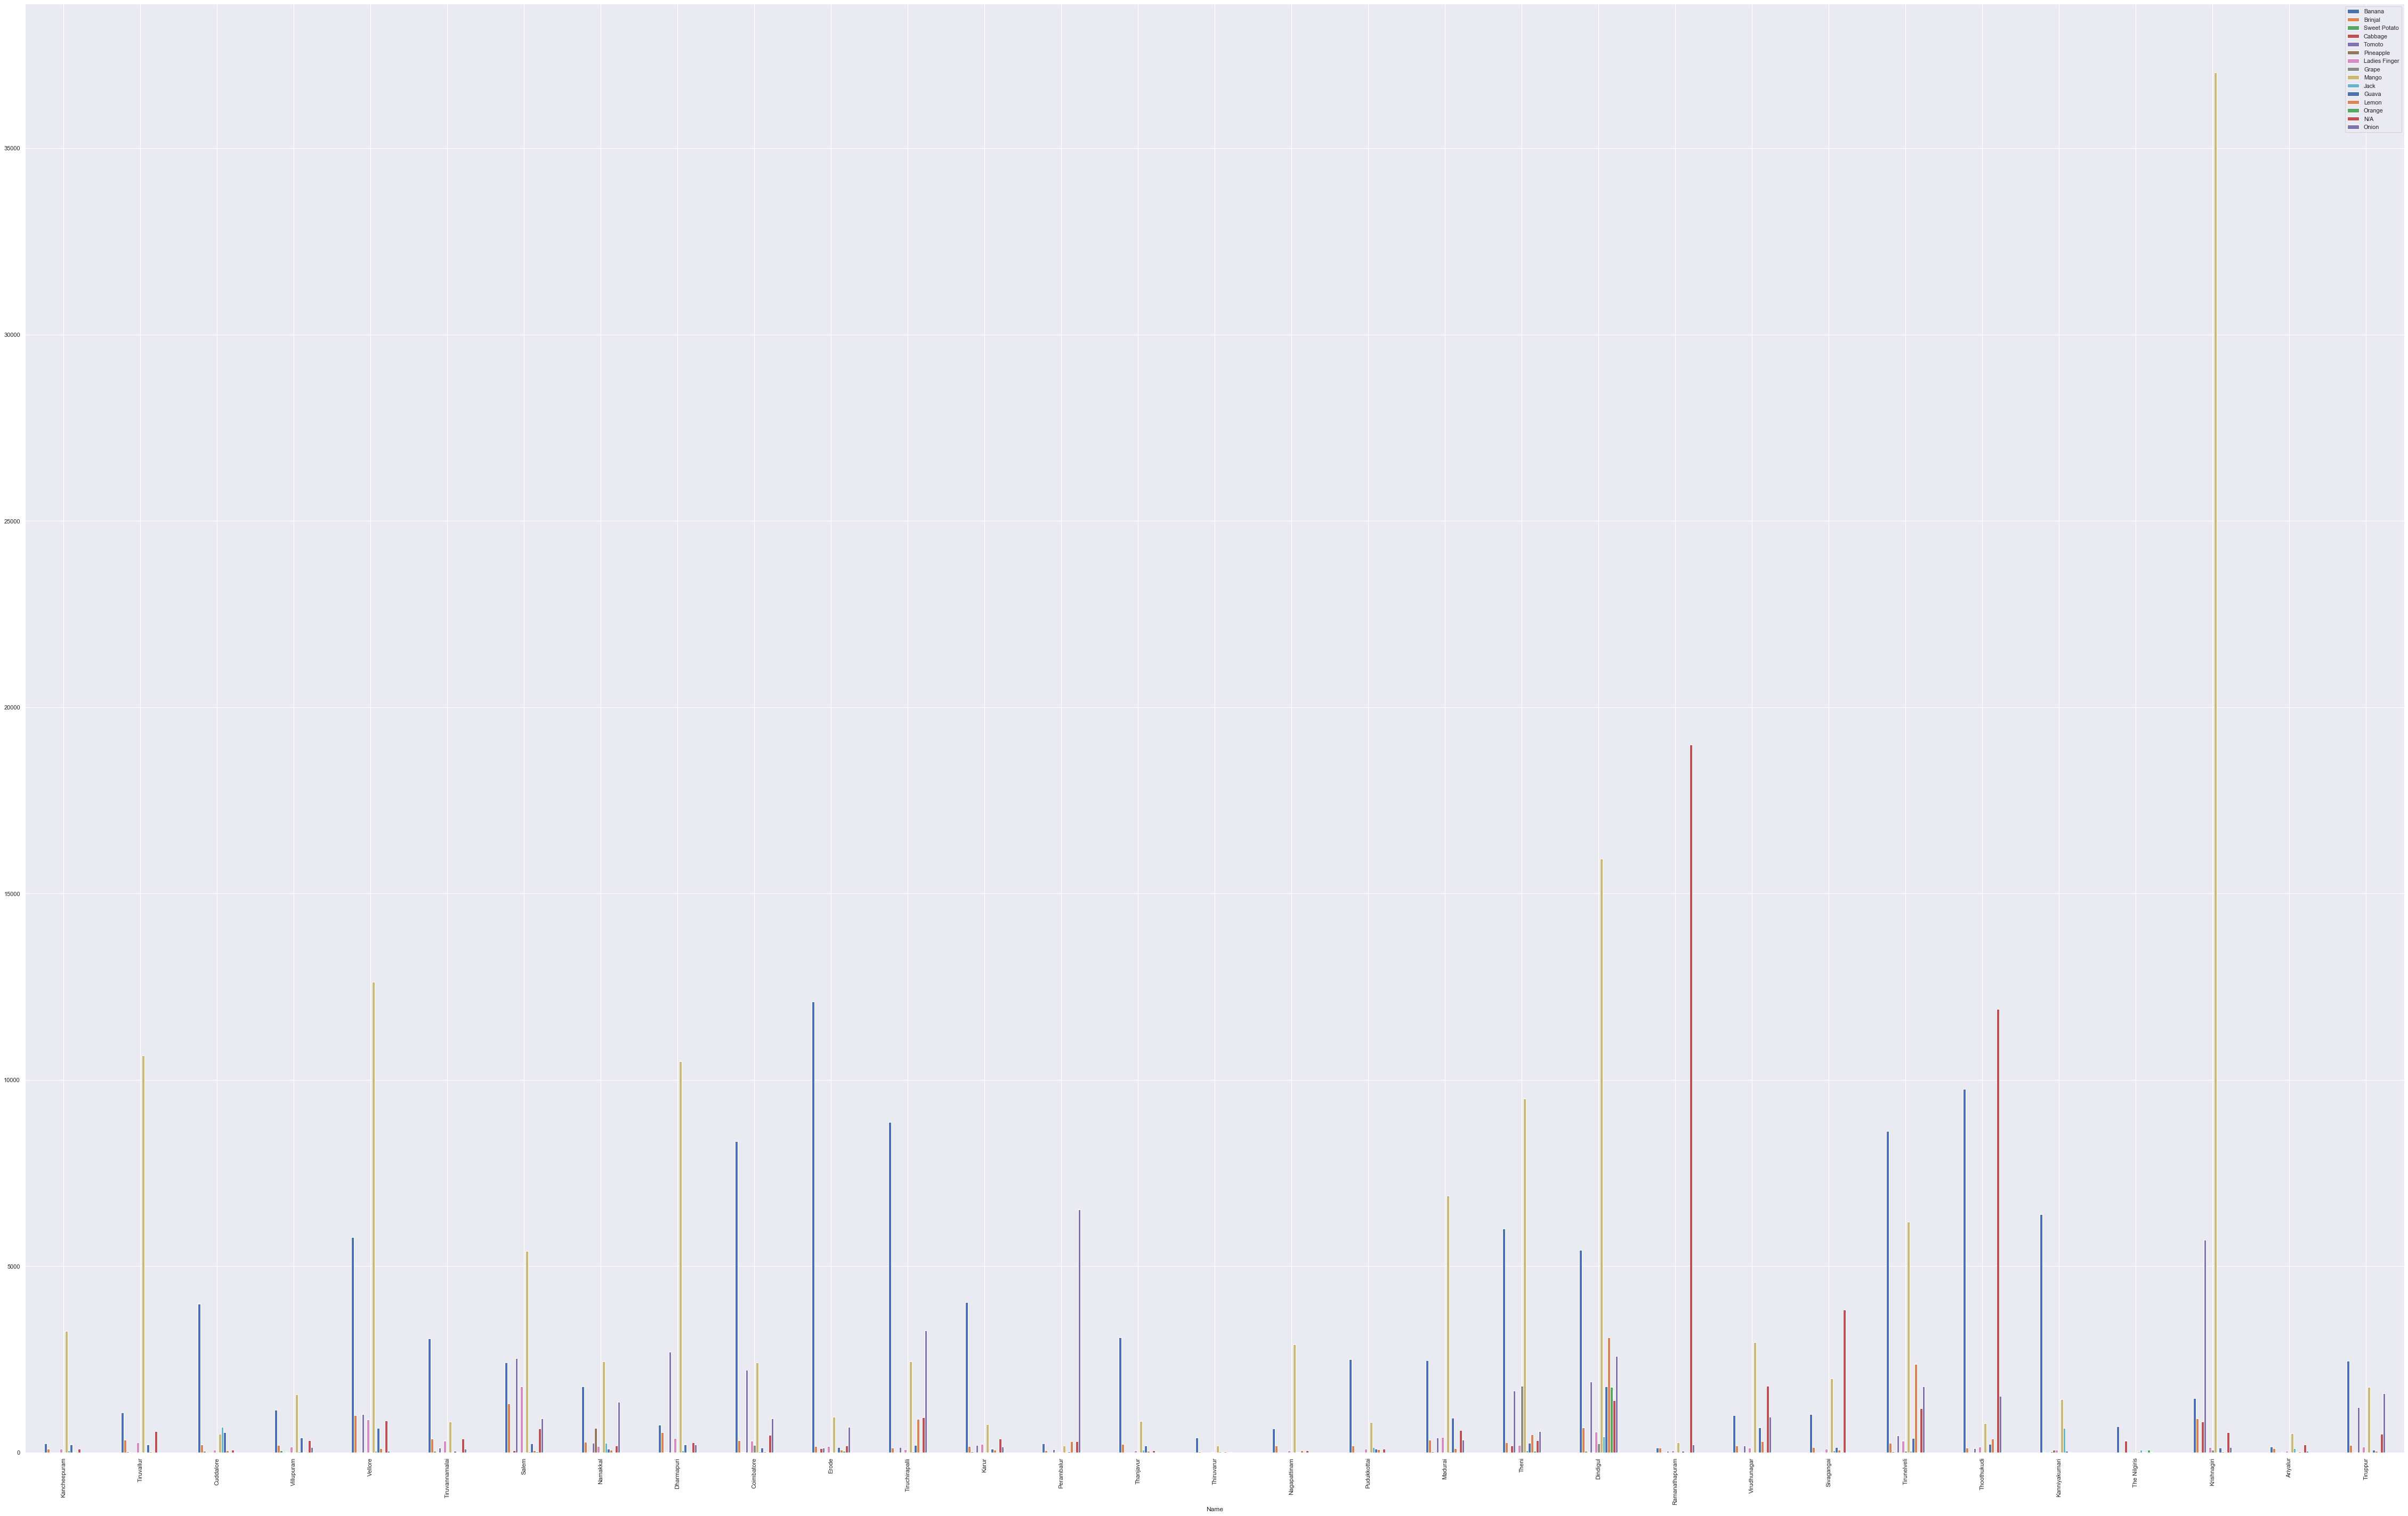

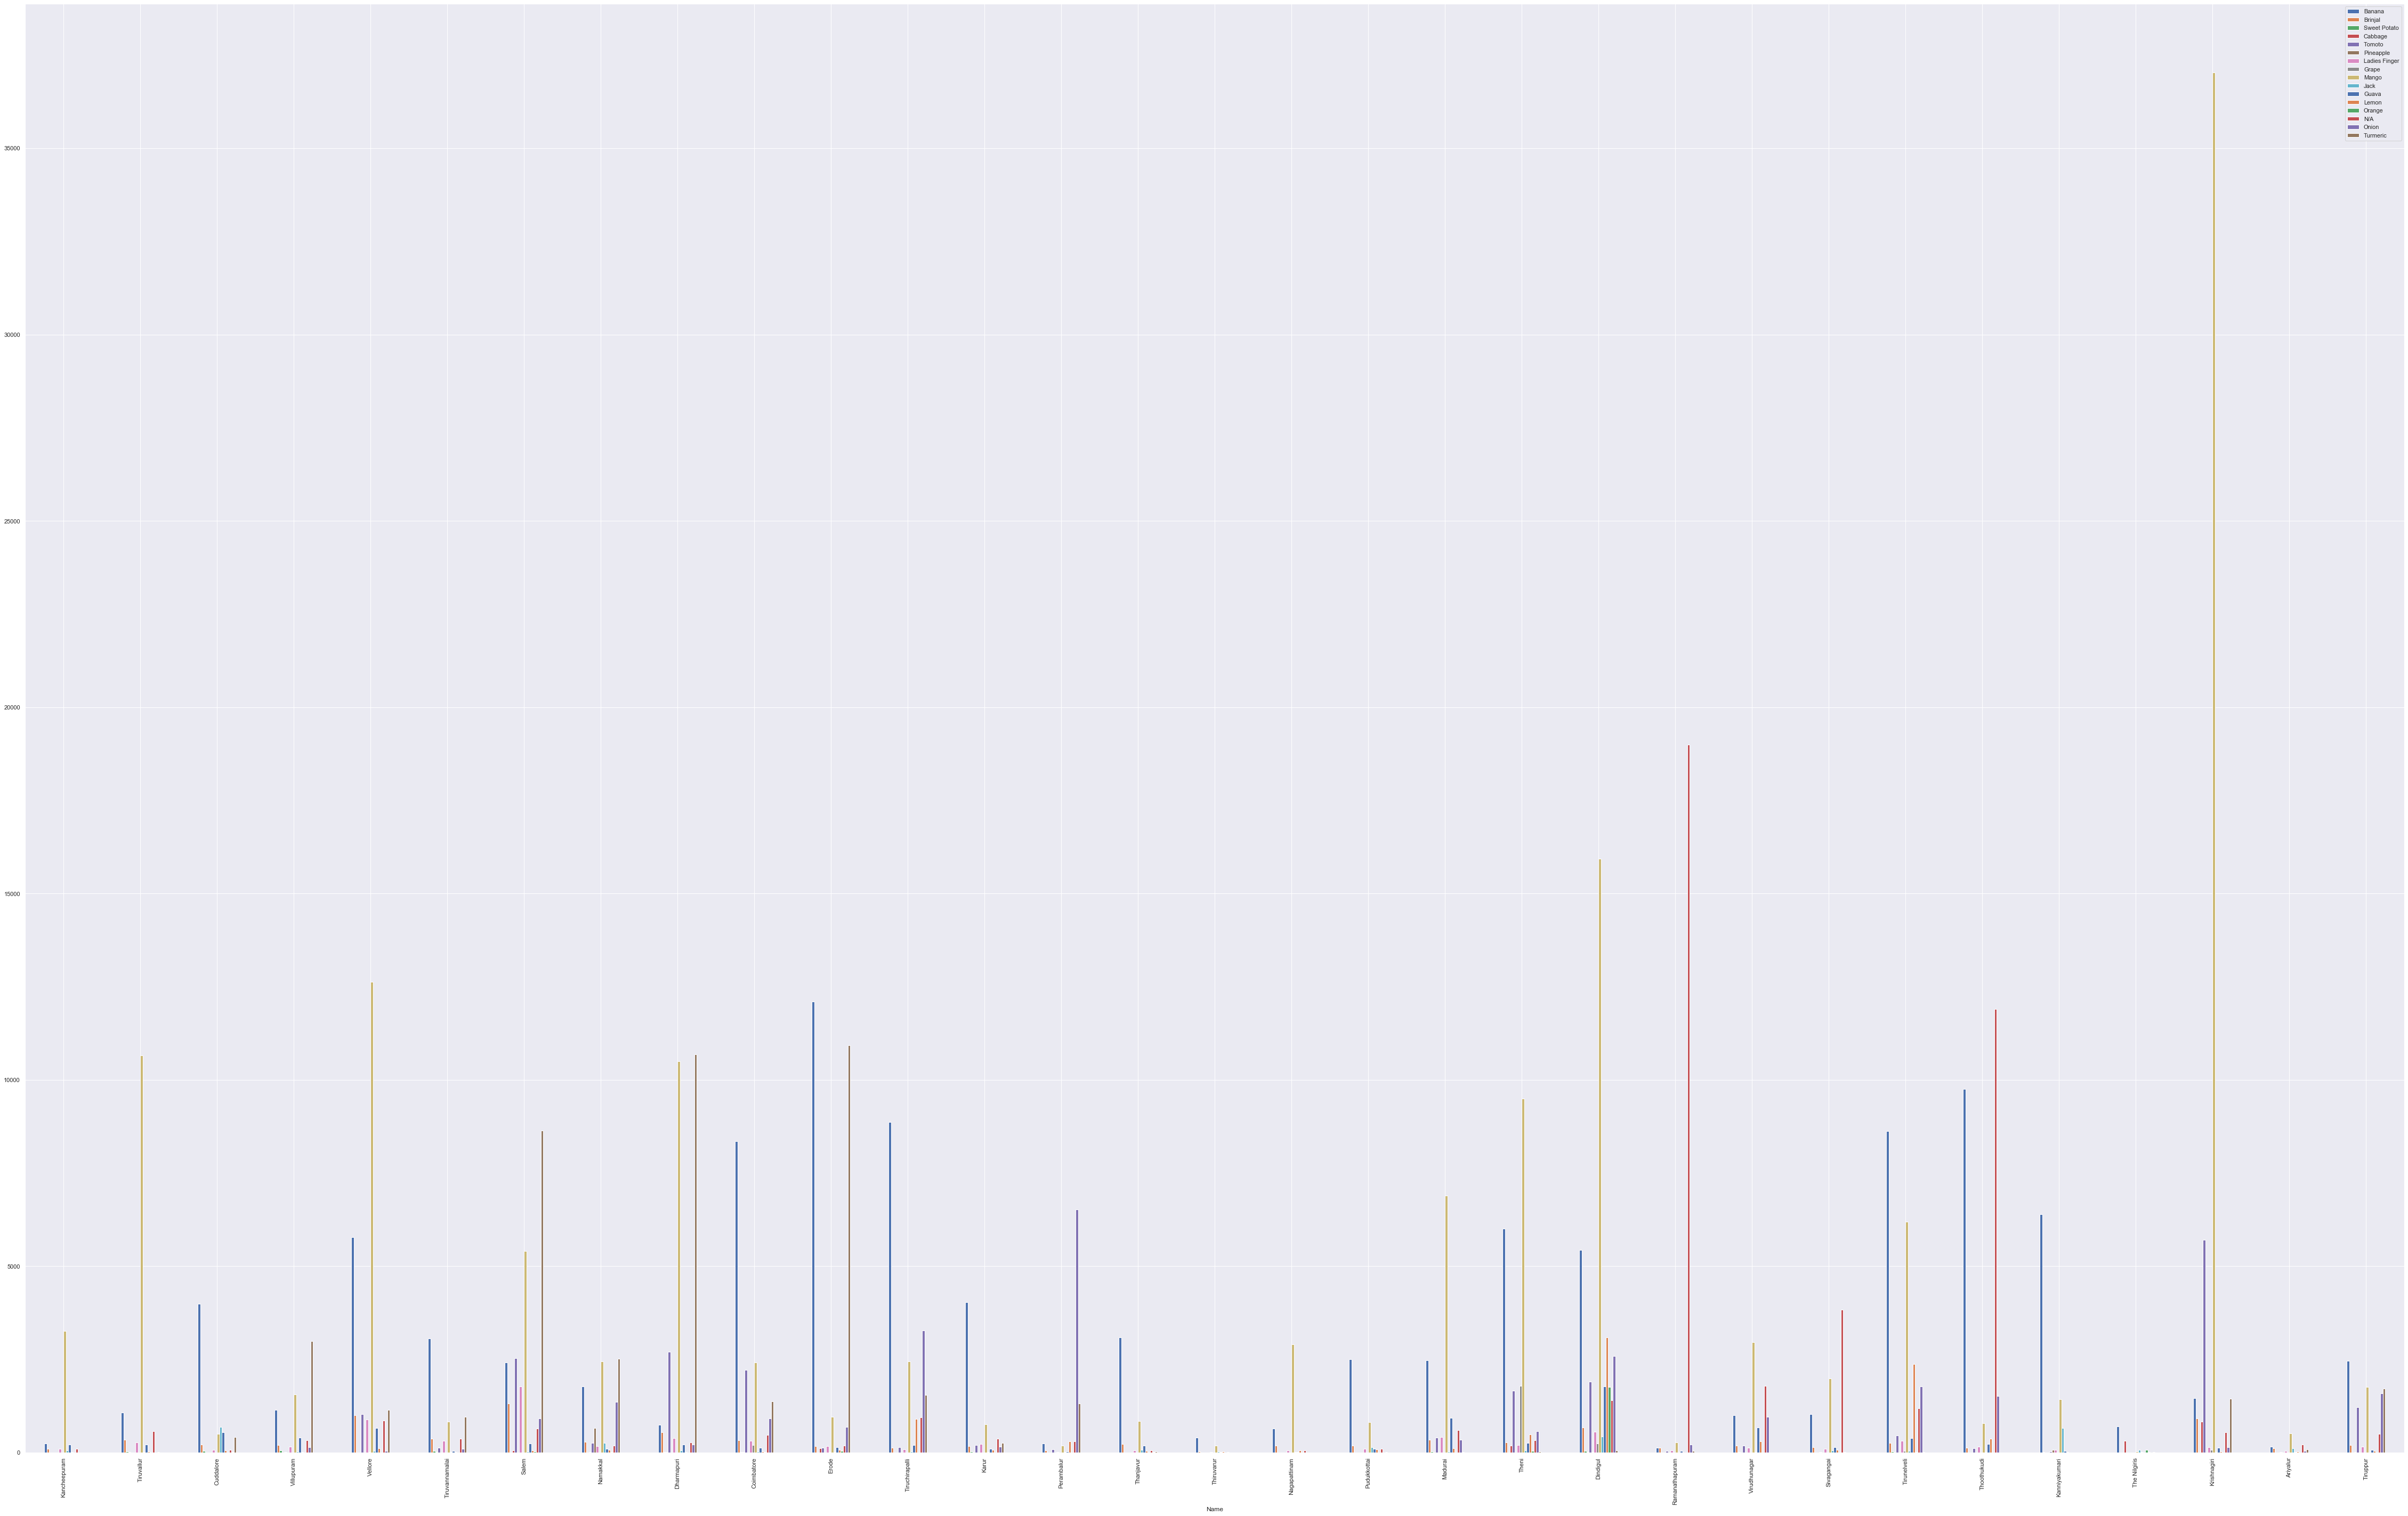

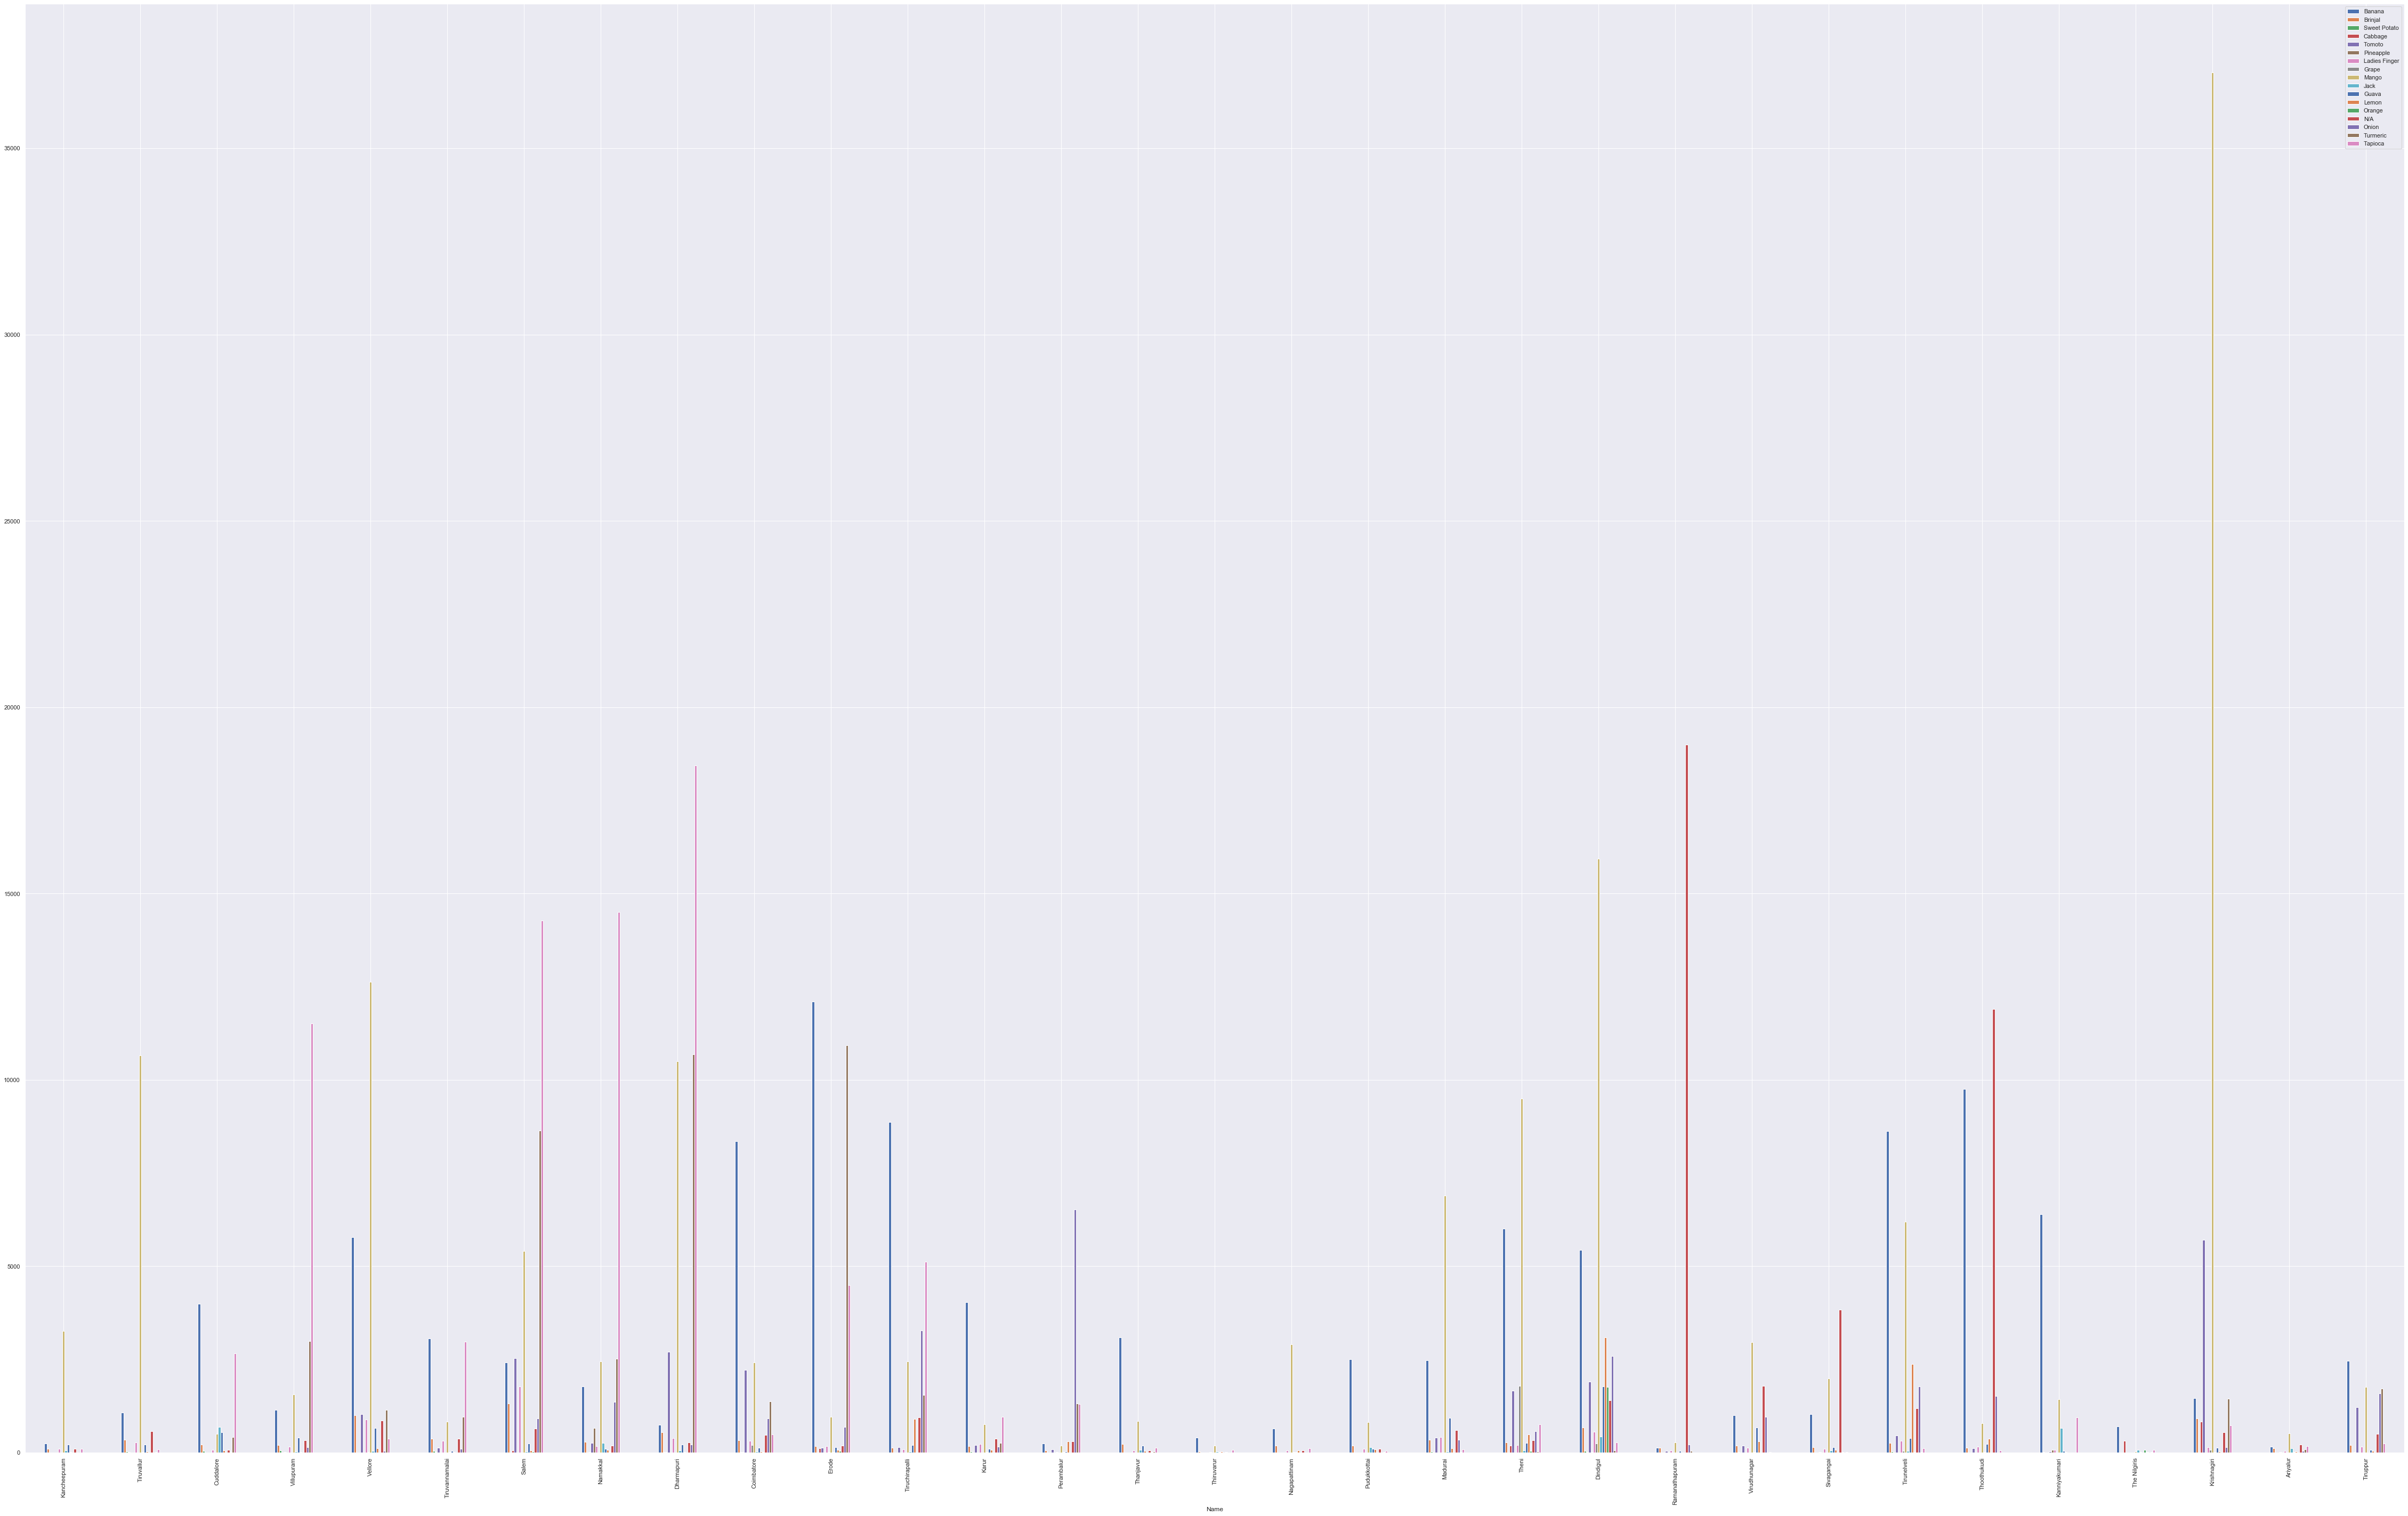

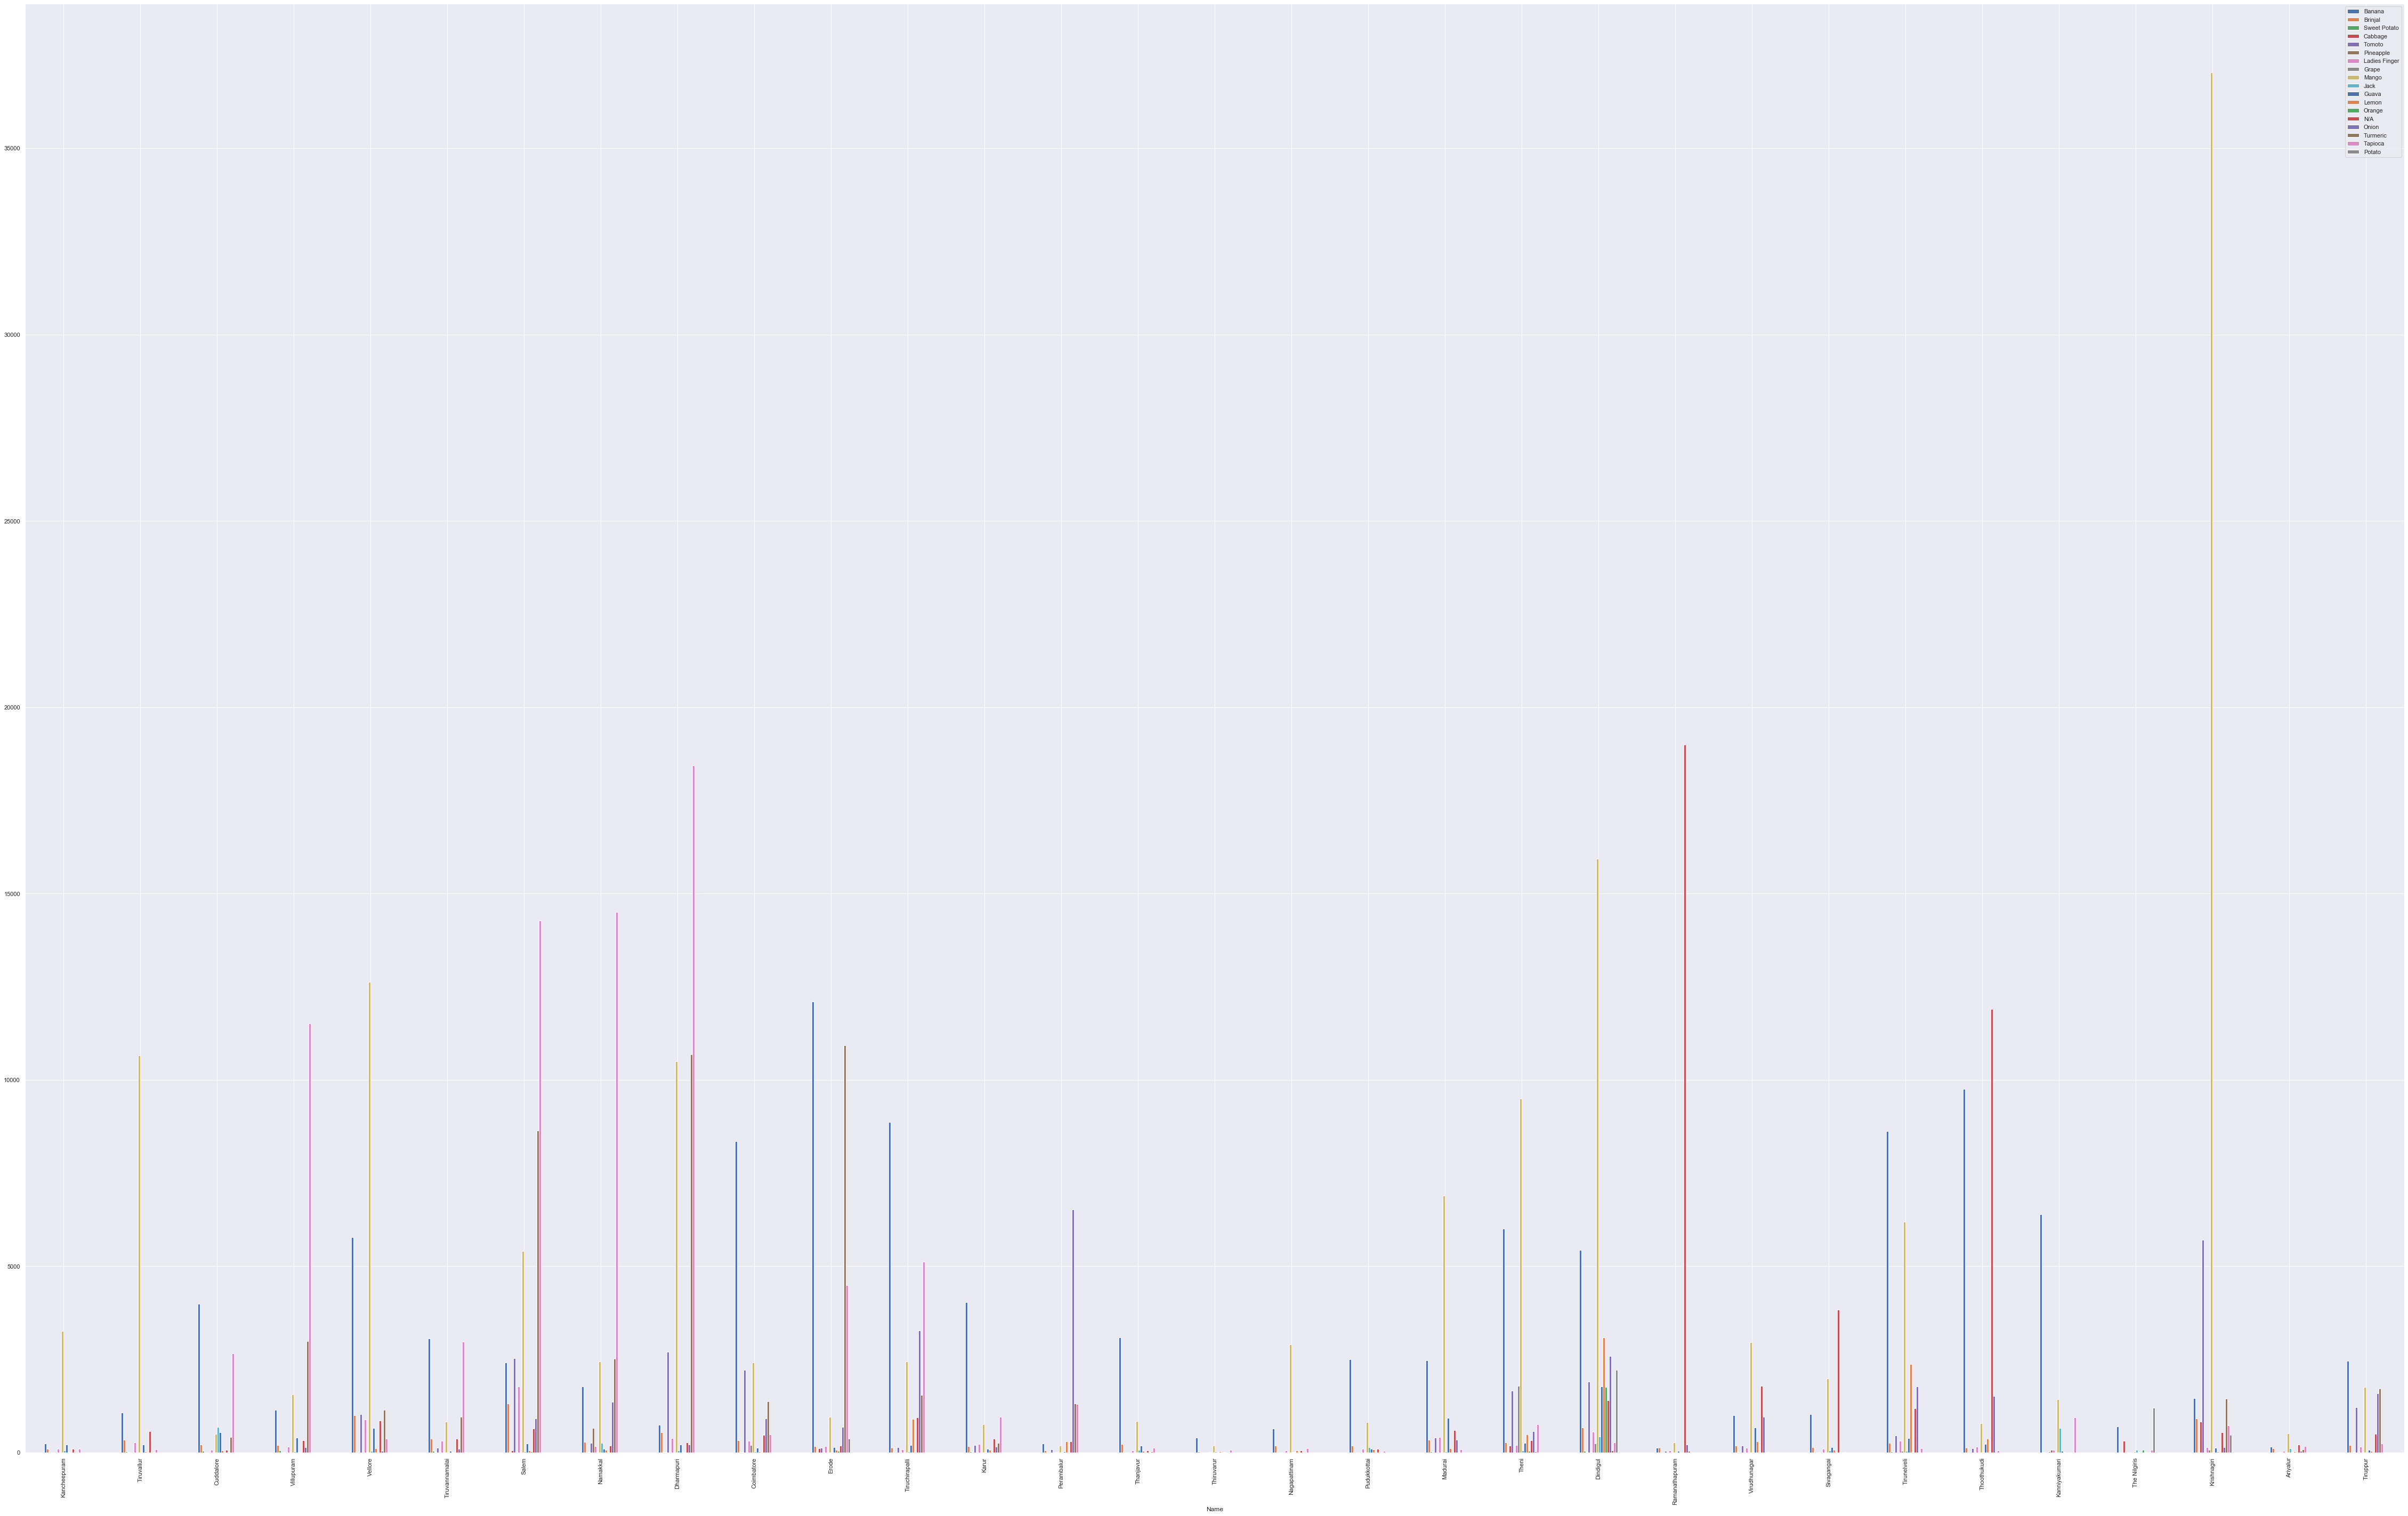

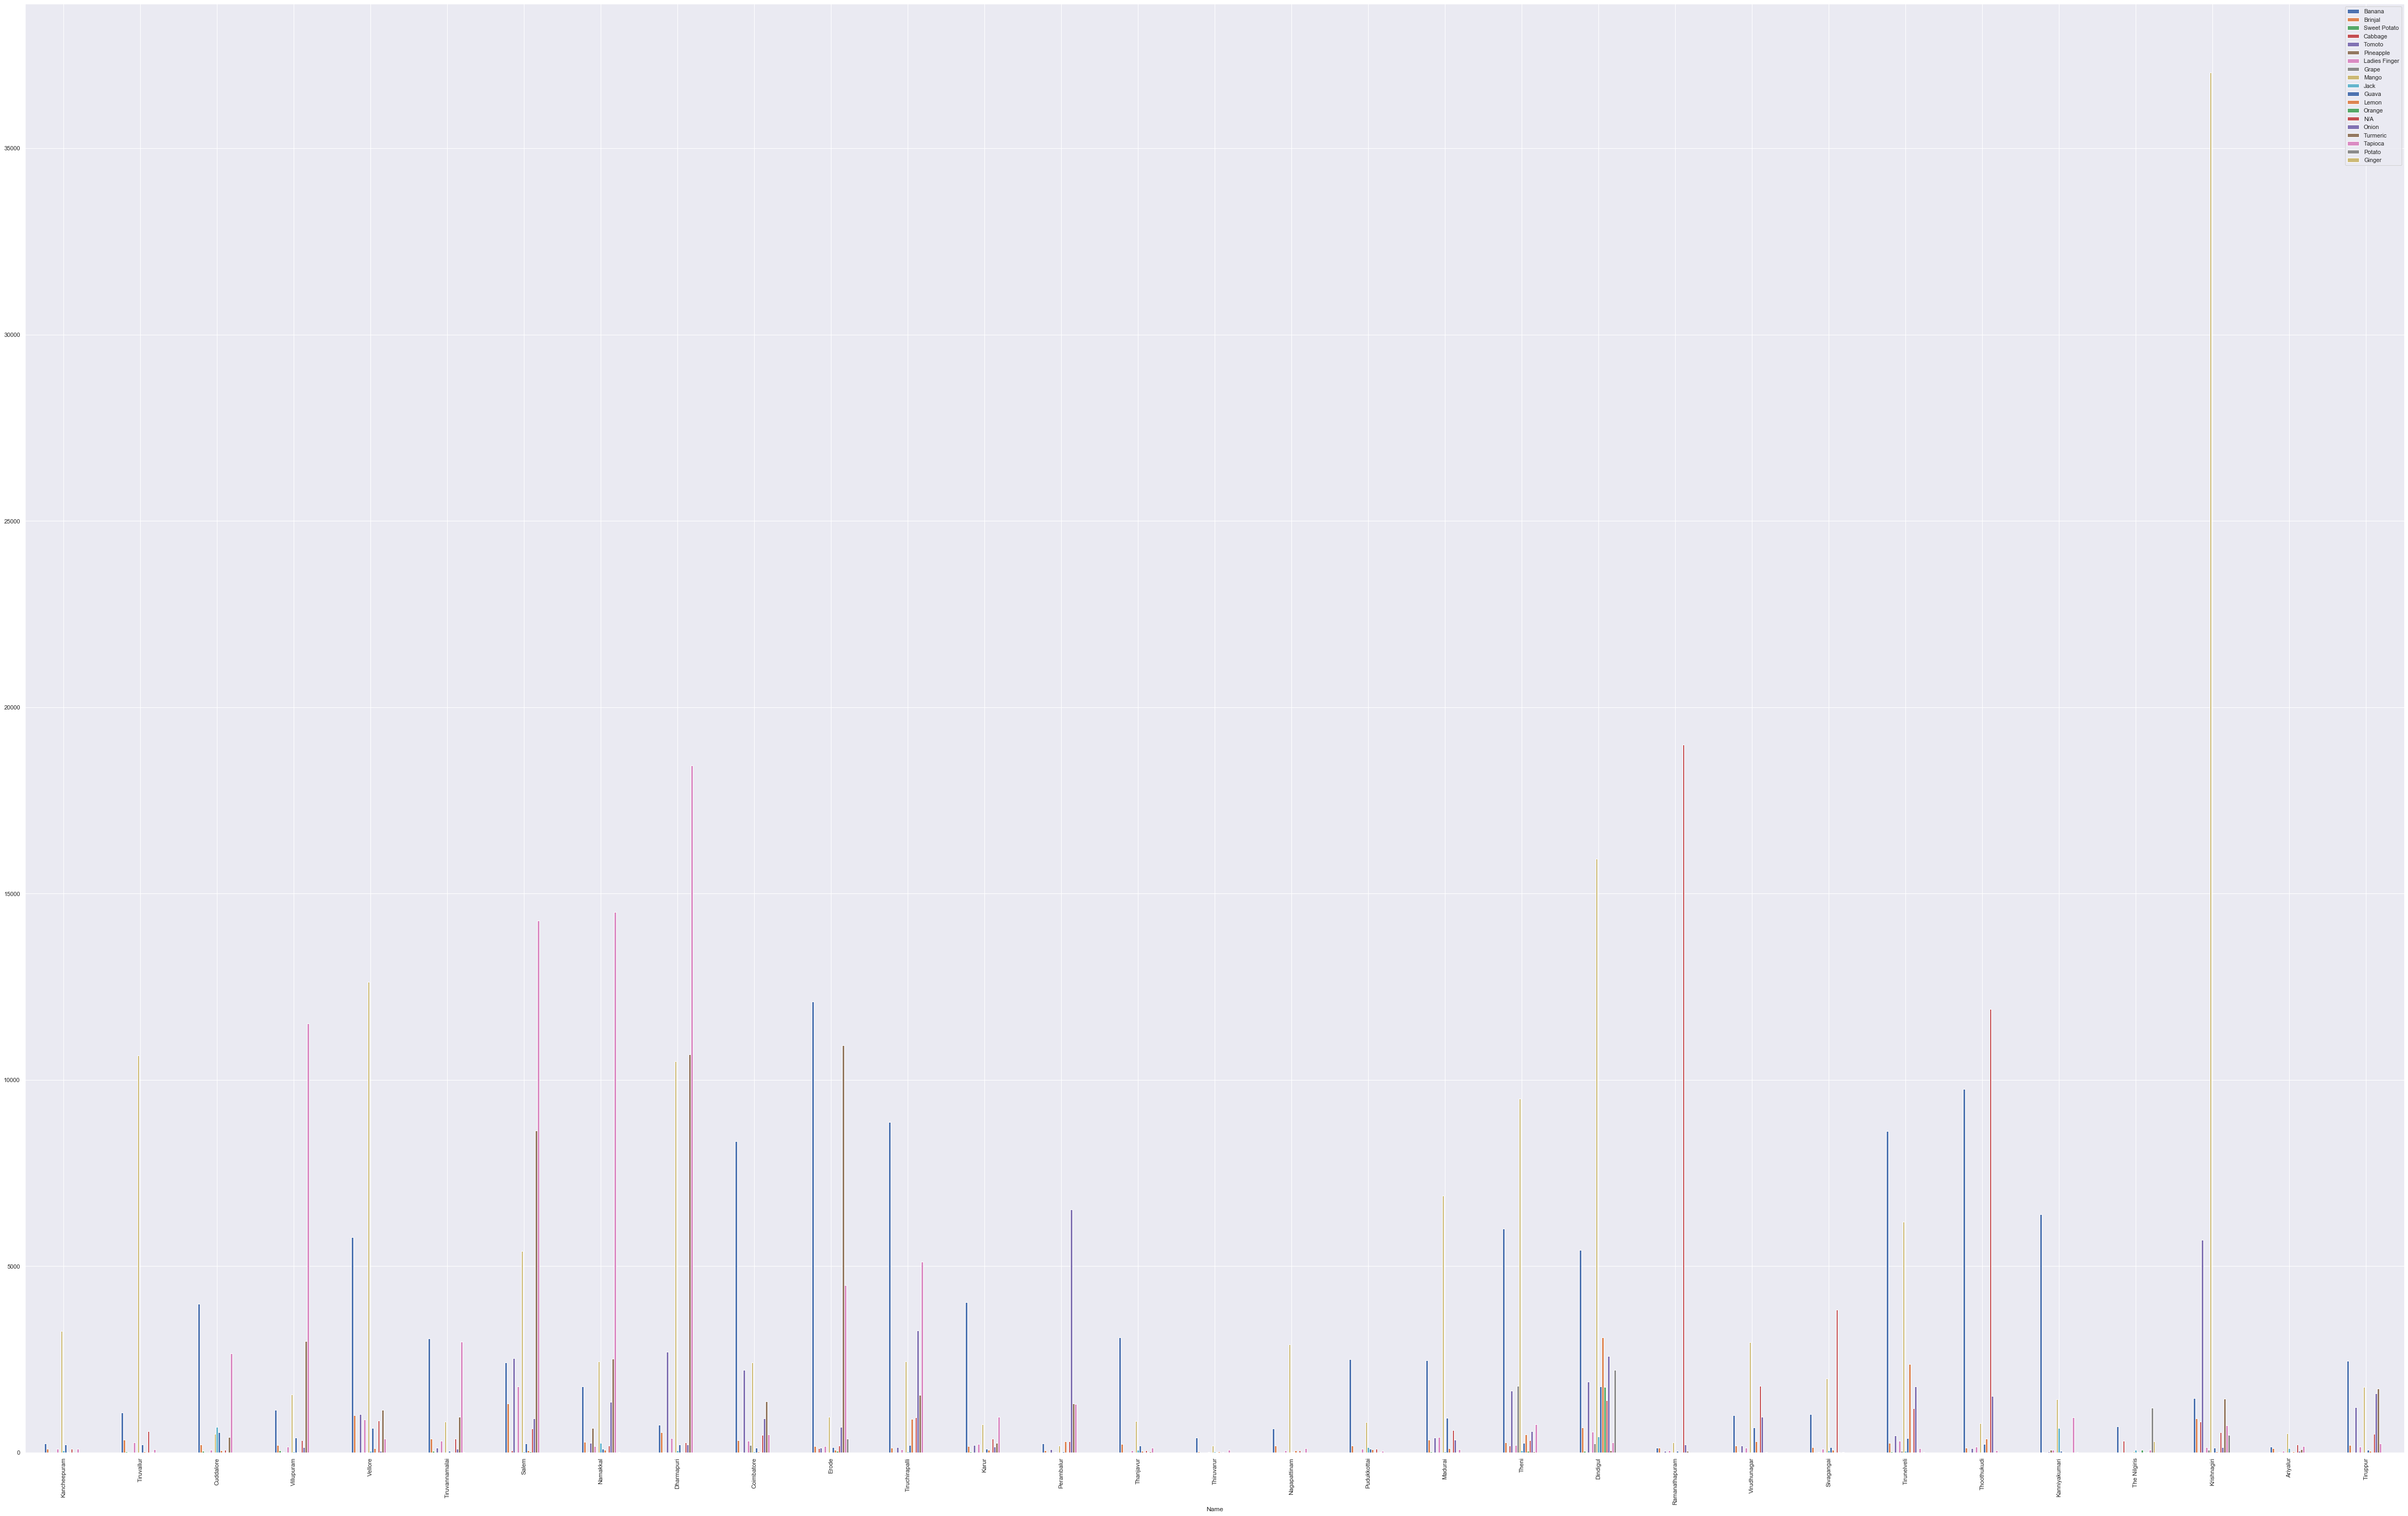

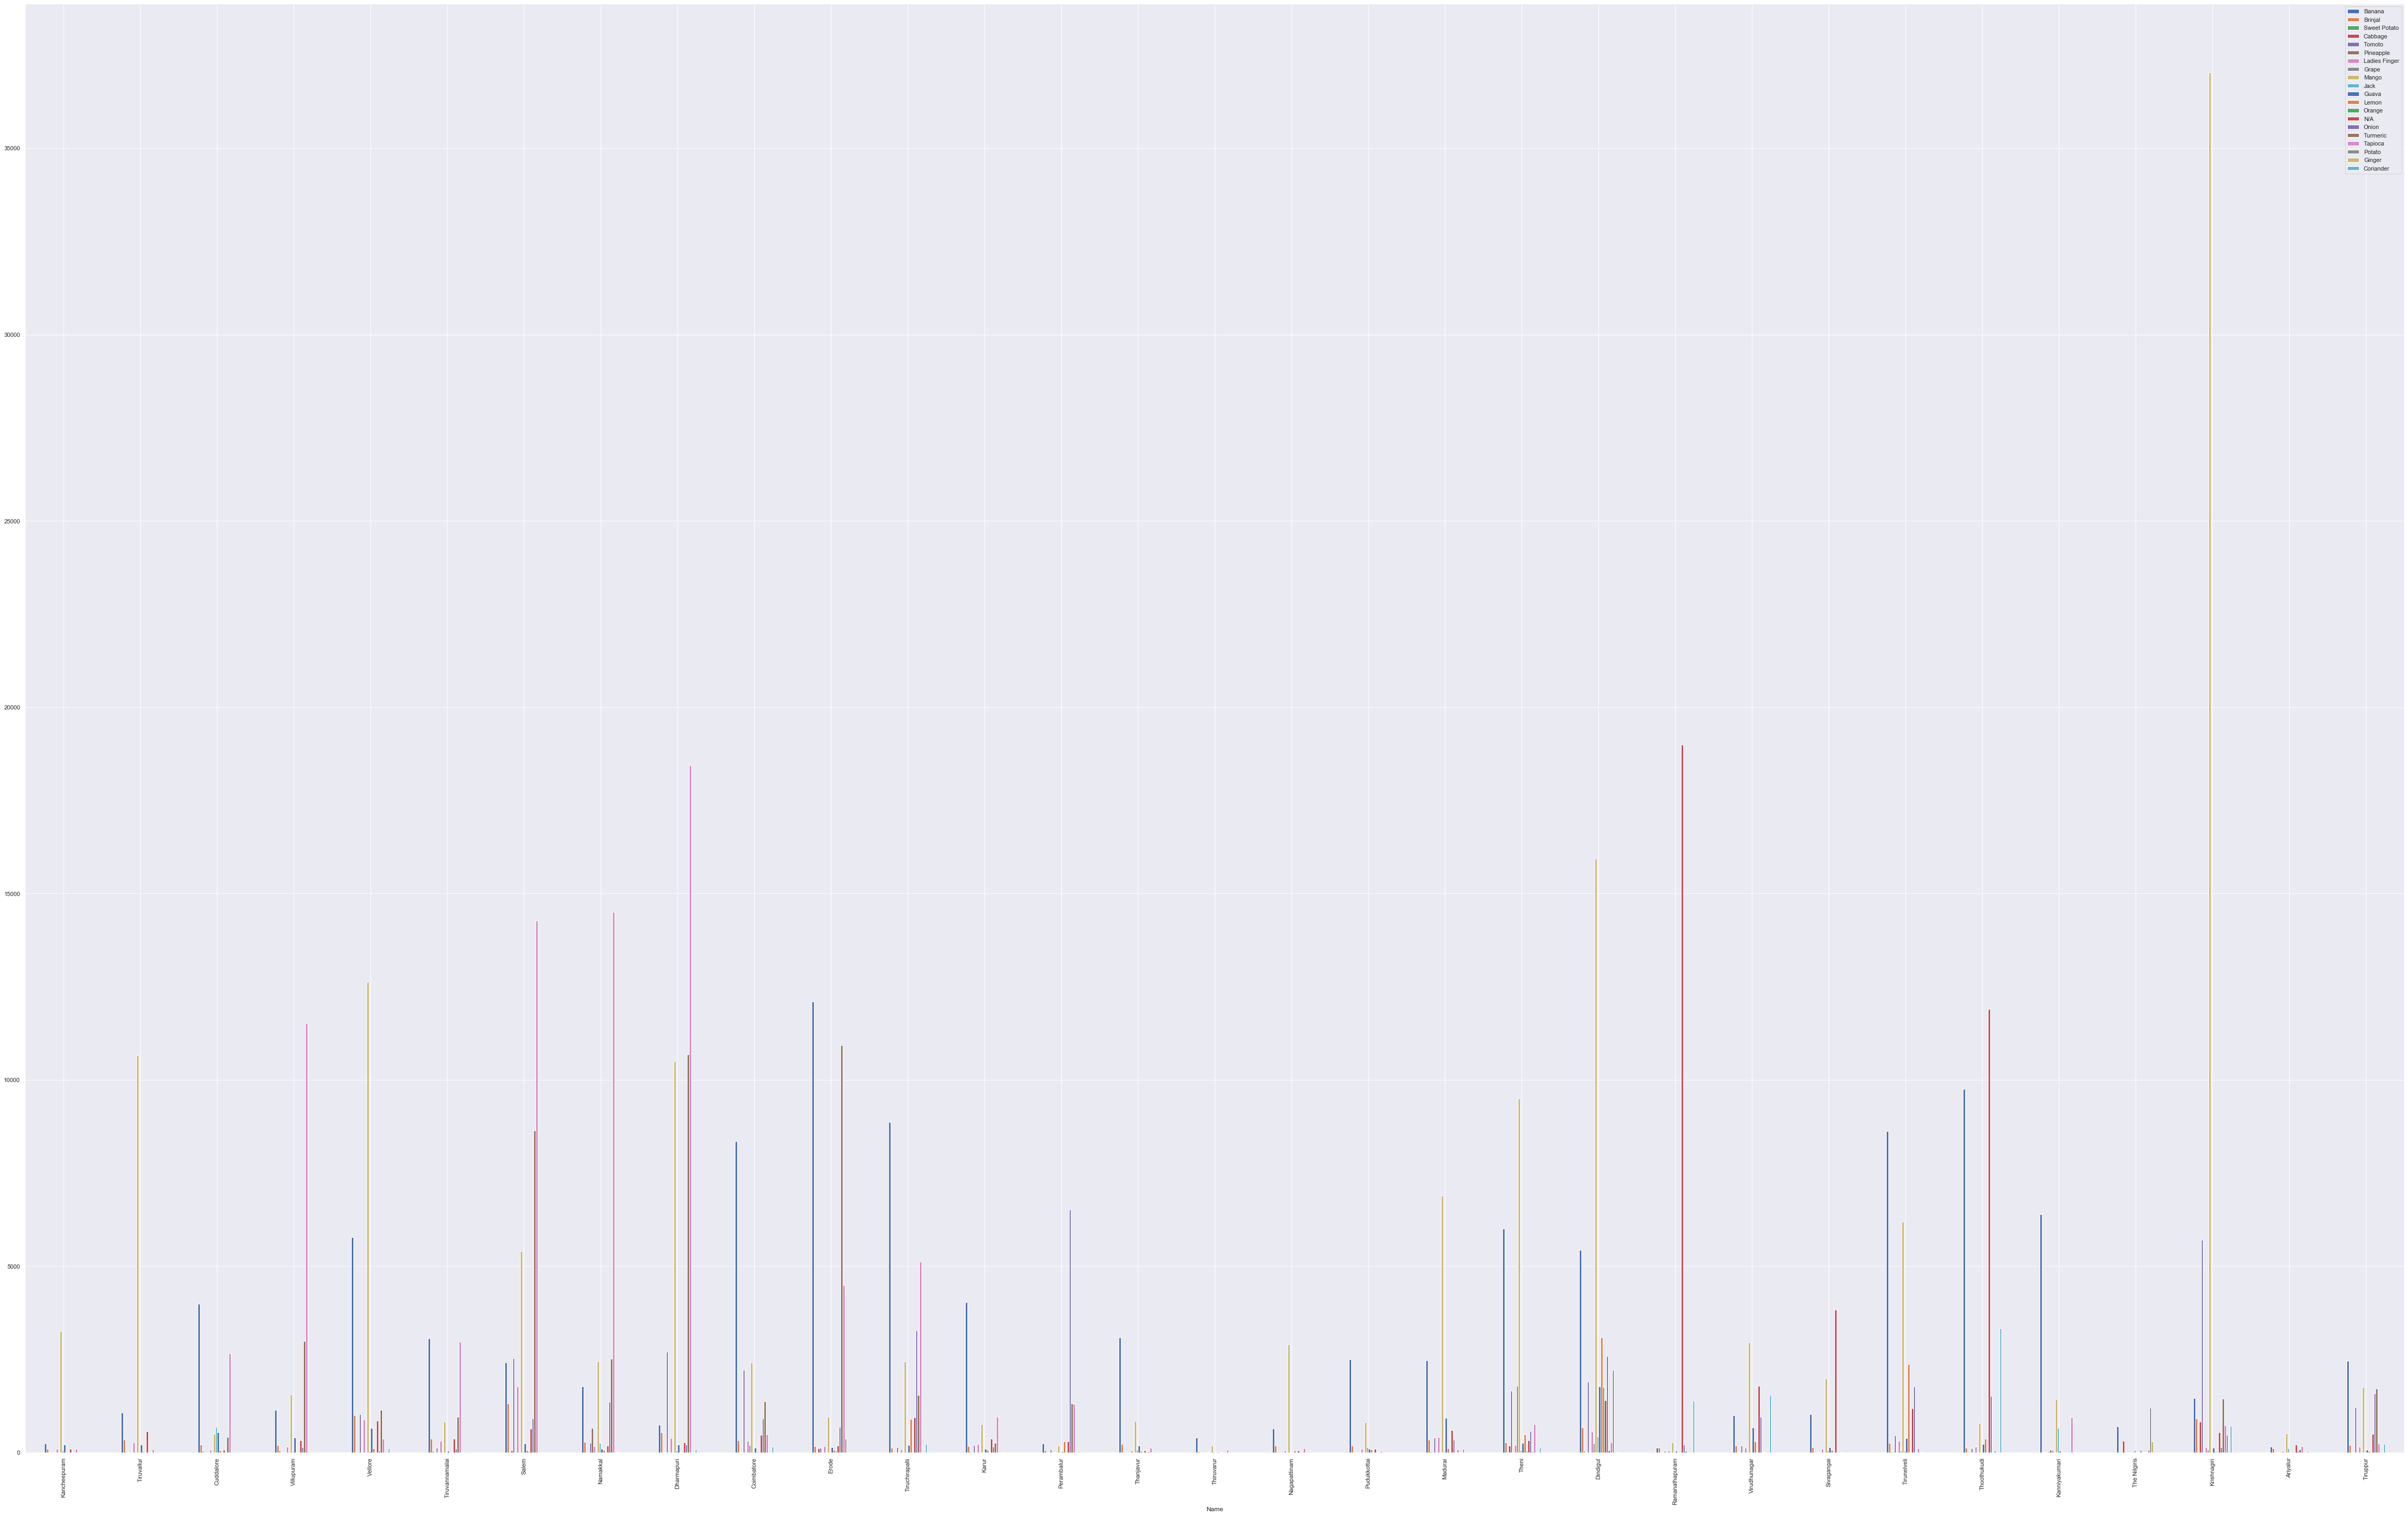

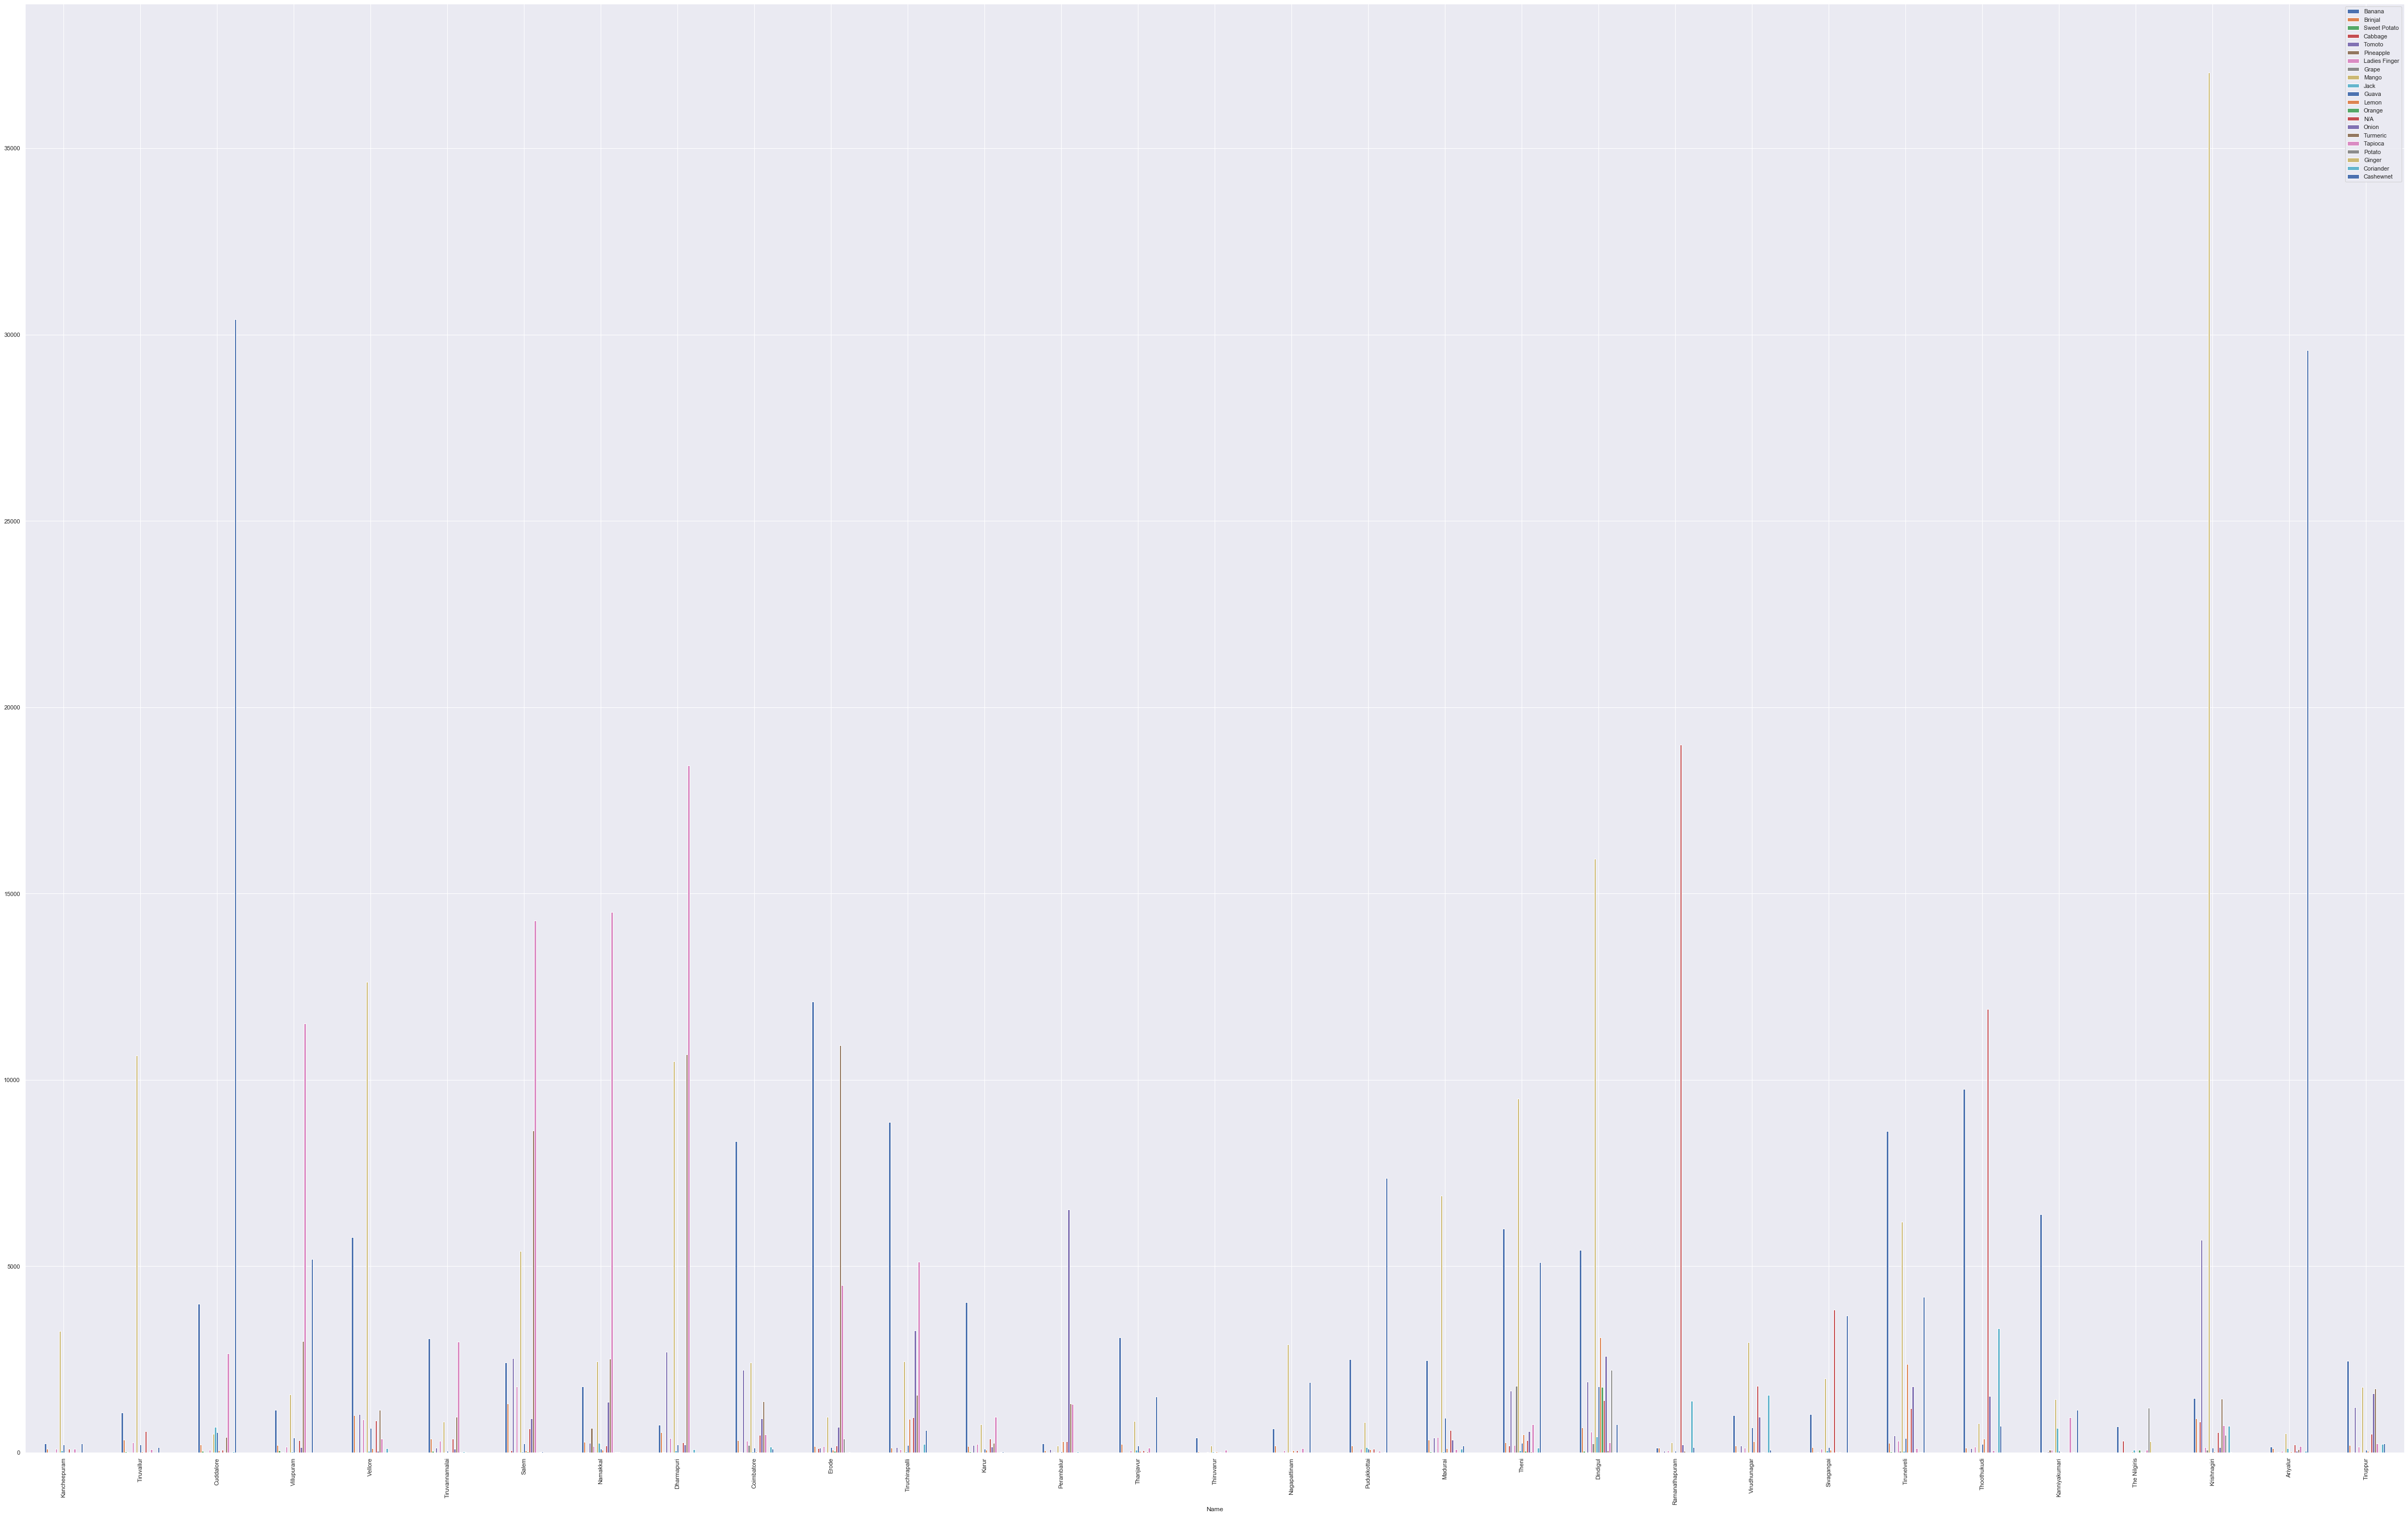

In [84]:
Veg =[]
u = 0
for i in data:
    Veg.append(i)
    u = u + 1 
    rw.plot(kind='bar',x='Name',y=Veg,figsize=(80,50))

### Graph for the State vs Hectors

Text(0, 0.5, 'Hectors')

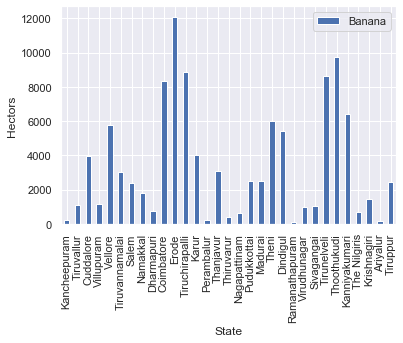

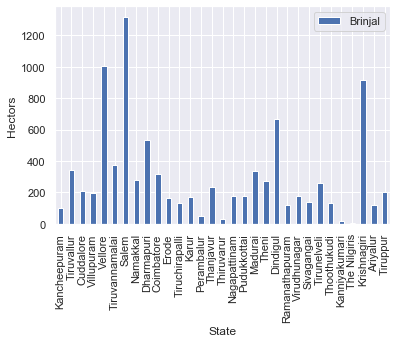

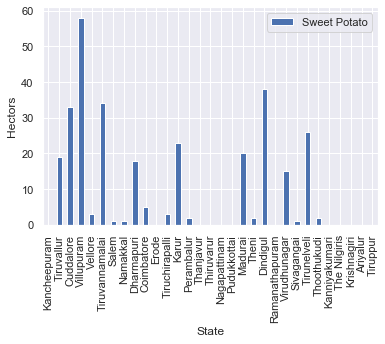

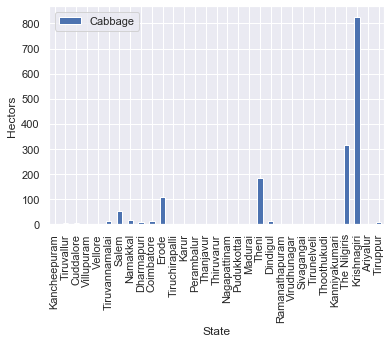

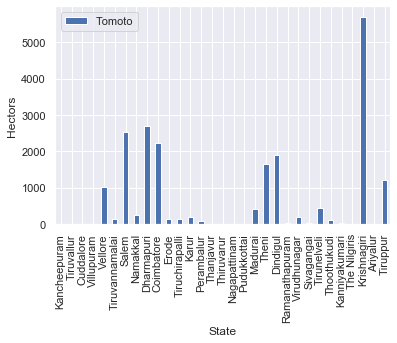

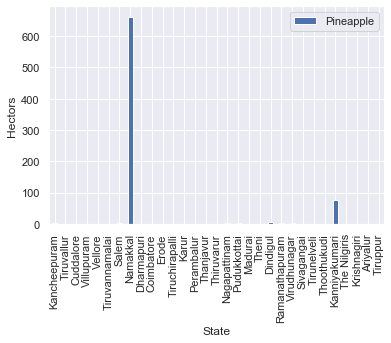

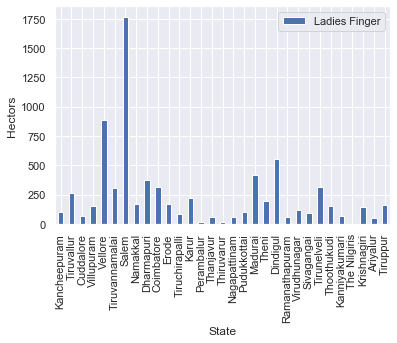

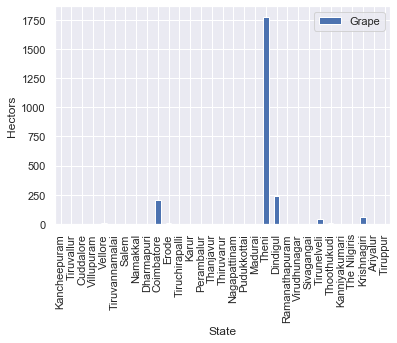

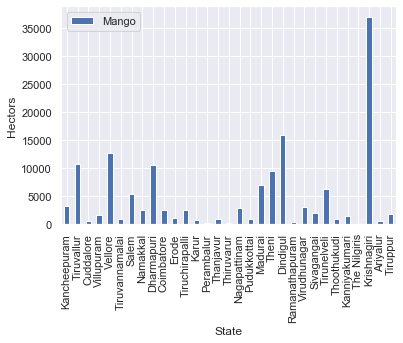

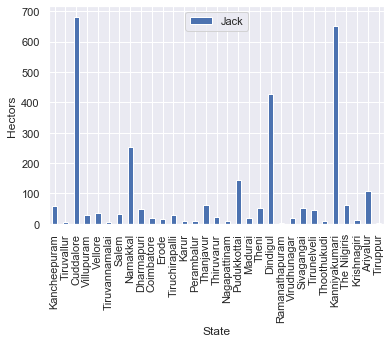

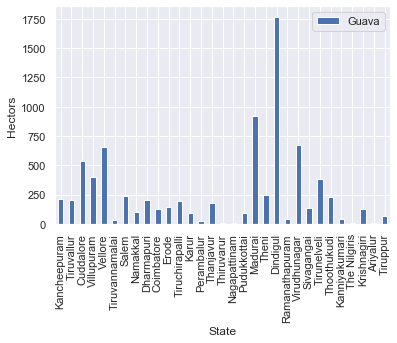

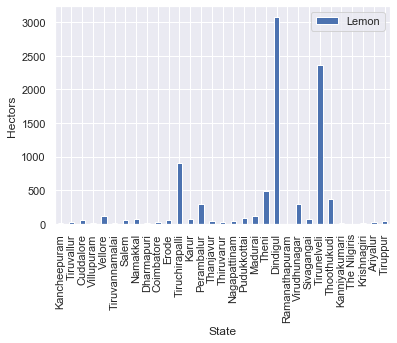

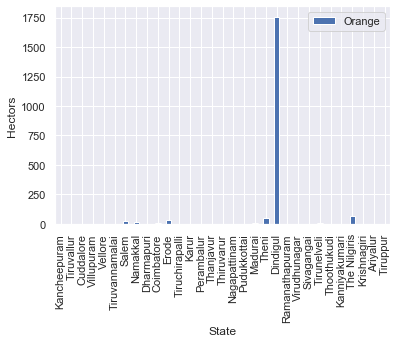

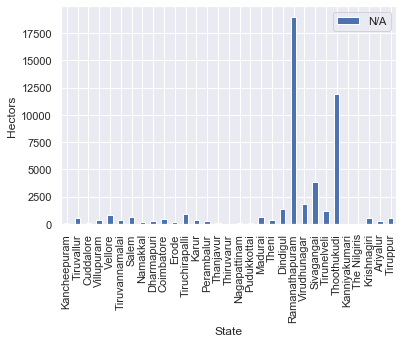

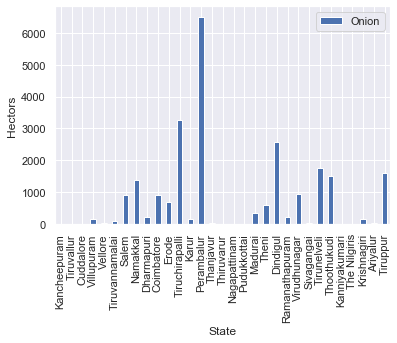

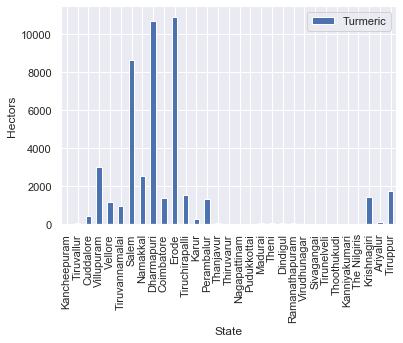

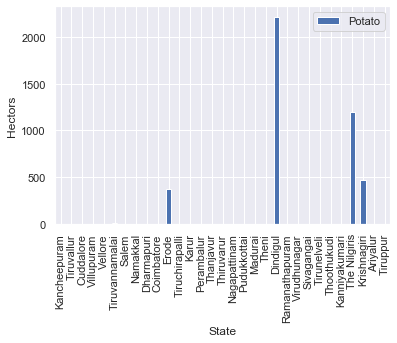

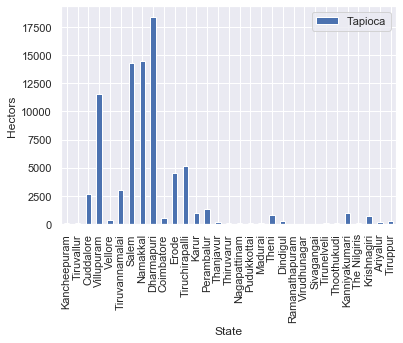

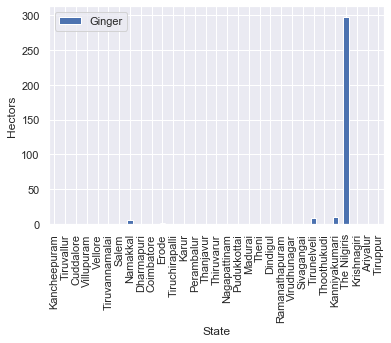

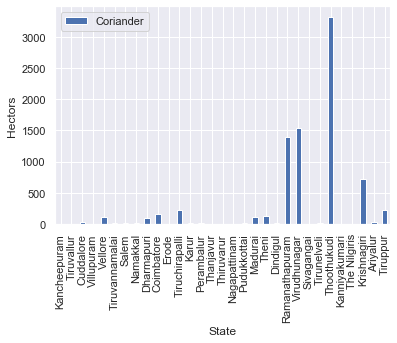

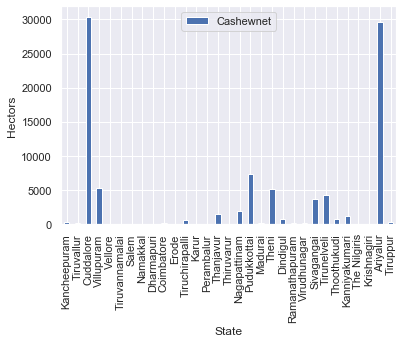

In [85]:
rw.plot(kind='bar',x='Name',y='Banana')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Brinjal')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Sweet Potato')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Cabbage')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Tomoto')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Pineapple')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Ladies Finger')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Grape')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Mango')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Jack')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Guava')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Lemon')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Orange')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='N/A')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Onion')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Turmeric')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Potato')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Tapioca')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Ginger')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Coriander')
plt.xlabel('State')
plt.ylabel('Hectors')
rw.plot(kind='bar',x='Name',y='Cashewnet')
plt.xlabel('State')
plt.ylabel('Hectors')